In [1]:
from agents.matchmanager import MatchManager,buildMatchManager
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.regressor import RegressorAgent
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import logging
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dfs=[]
for i in range(3):
    board, state = scenarioJunction()
    playerRed = RegressorAgent(RED, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'red'})
    playerBlue = RegressorAgent(BLUE, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'blue'})
    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=50+i)
    while not mm.end:
        mm.nextStep()
    df_blue=playerBlue.createDf(i)
    df_red=playerRed.createDf(i)
    win_blue = [mm.winner] * len(df_blue)
    win_red = [mm.winner] * len(df_red)
    df_blue['winner']=win_blue
    df_red['winner']=win_red
    dfs.append(df_blue)
    dfs.append(df_red)
df=pd.concat(dfs)
    

In [72]:
df_i=df.reset_index()

array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>],
      dtype=object)

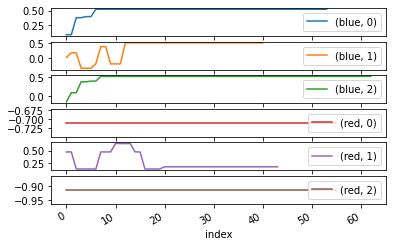

In [4]:
pd.pivot_table(df.reset_index(),
               index='index', columns=['Agente','Numero Partita'], values='Score'
              ).plot(subplots=True)

In [18]:
def plotgroupAgentePartita(df,value_y,kind):
    fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
    for (joinGroup, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
        win=group['winner'].unique()
        title=f'{joinGroup}-> winner:{win}'
        group.plot(x='Count', y=value_y, kind=kind,style='-o' ,ax=ax,title=title,ylim=[-1,1])

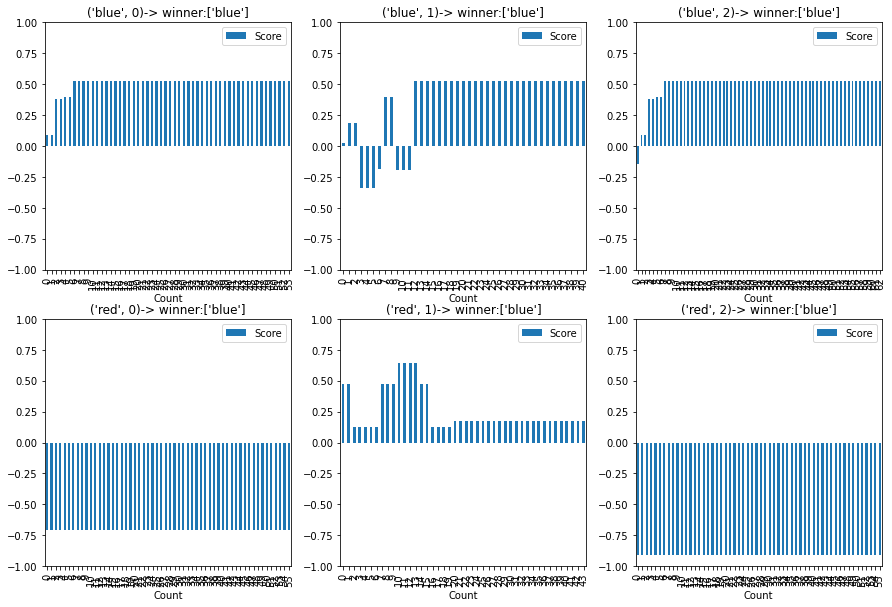

In [19]:
plotgroupAgentePartita(df,'Score','bar')

In [ ]:
plotgroupAgentePartita(df,'Entropia','bar')

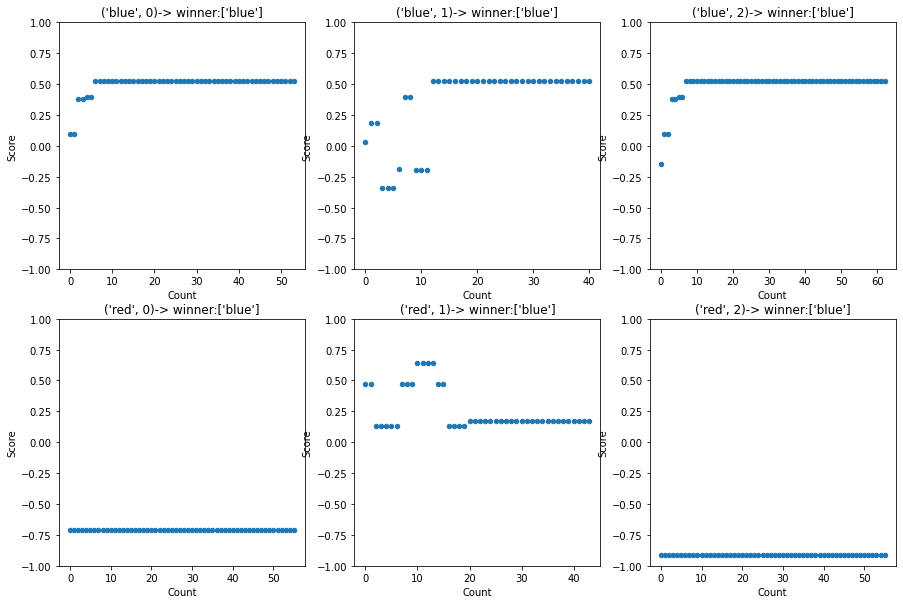

In [7]:
plotgroupAgentePartita(df,'Score','scatter')

In [ ]:
plotgroupAgentePartita(df,'Entropia','scatter')

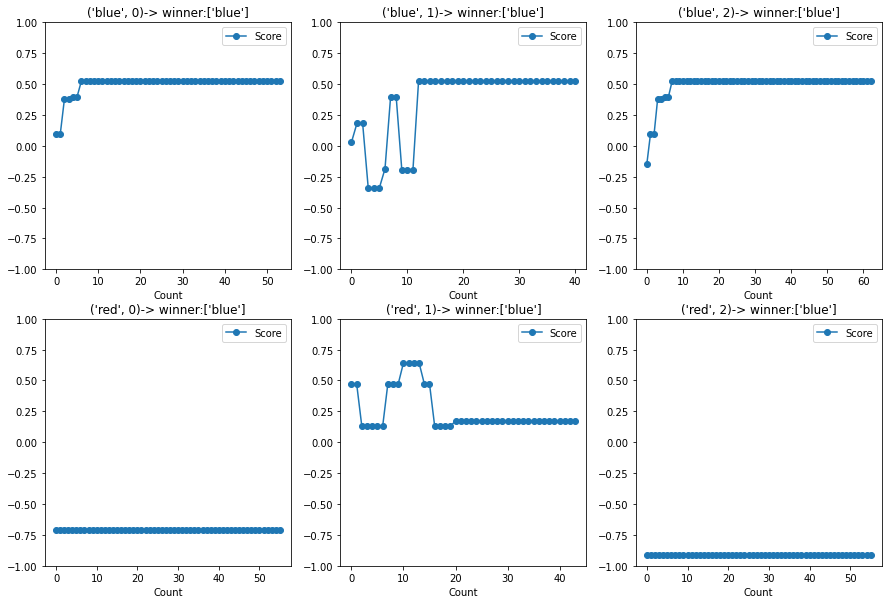

In [14]:
plotgroupAgentePartita(df,'Score','line')

In [ ]:
plotgroupAgentePartita(df,'Entropia','line')

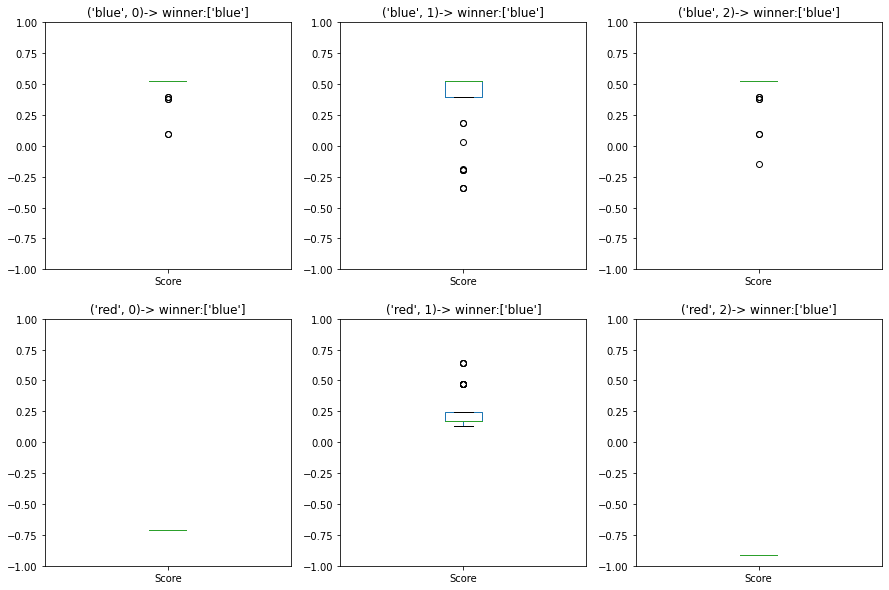

In [39]:
plotgroupAgentePartita(df,'Score','box')

In [ ]:
plotgroupAgentePartita(df,'Entropia','box')

In [31]:
def entropiaEscore(df,kind):
    fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
    for (joinGroup, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
        win=group['winner'].unique()
        title=f'{joinGroup}-> winner:{win}'
        group.plot(x='Count', y=['Score'], kind=kind,style='-o', ax=ax,title=title,ylim=[-1,1],color='r')
        group.plot(x='Count', y=['Entropia'], kind=kind,style='-o', ax=ax,title=title,ylim=[-1,1],color='b')

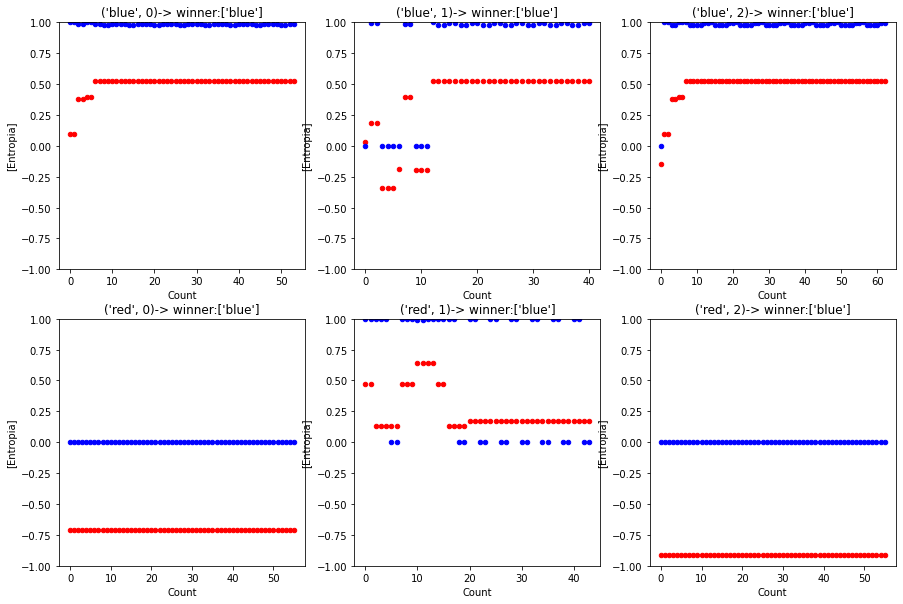

In [32]:
entropiaEscore(df,'scatter')

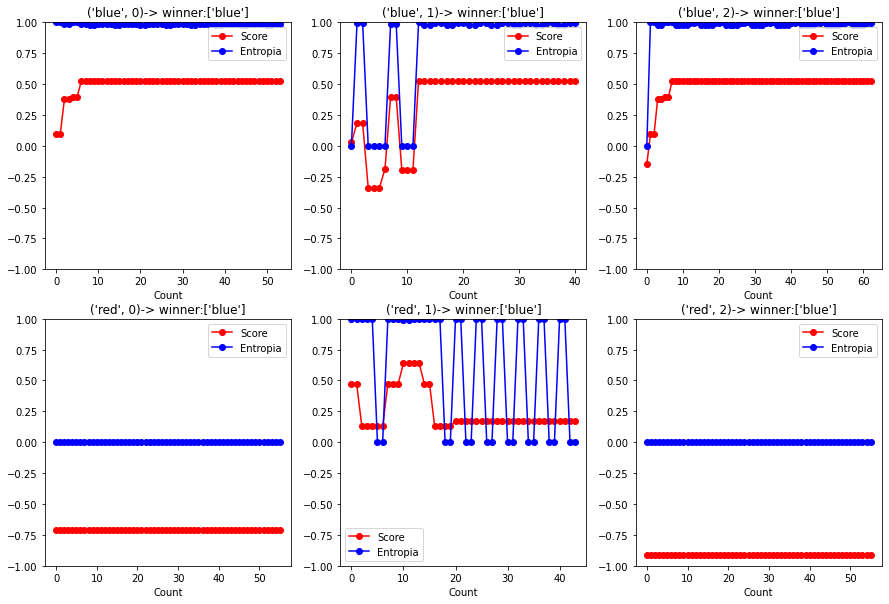

In [33]:
entropiaEscore(df,'line')

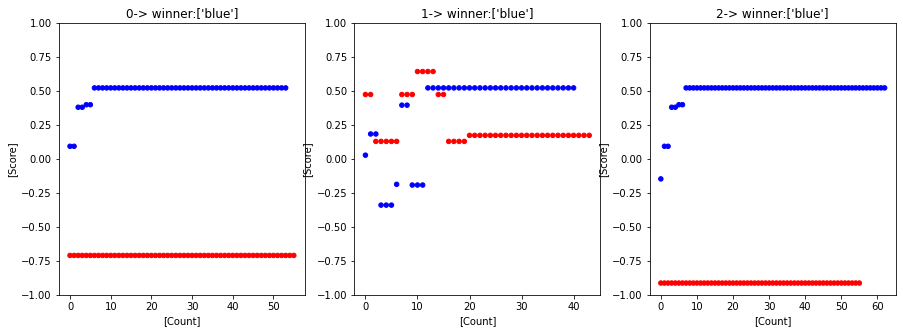

In [23]:
fig, axes = plt.subplots(1,len(df['Numero Partita'].unique()), figsize=(15,5))
for (joinGroup, group), ax in zip(df.groupby(['Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}-> winner:{win}'
    group.plot(x=['Count'], y=['Score'], kind='scatter', ax=ax,title=title,ylim=[-1,1],c='Agente')


In [ ]:
plot=df.groupby(['Agente','Numero Partita']).plot.bar(y='Entropia')

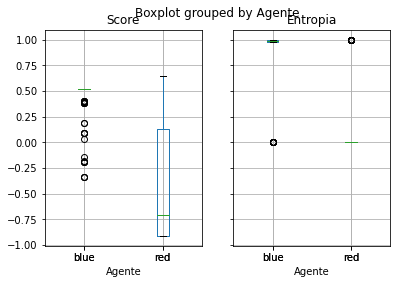

In [41]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Agente')


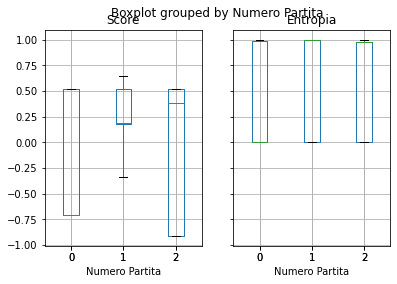

In [42]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Numero Partita')

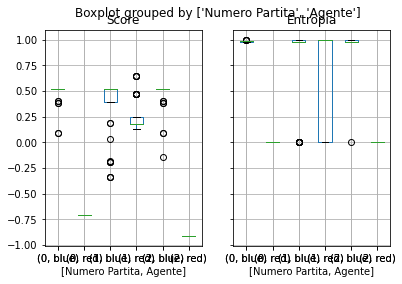

In [40]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by=['Numero Partita','Agente'])

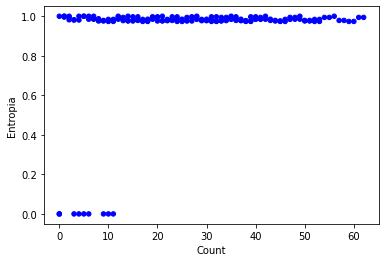

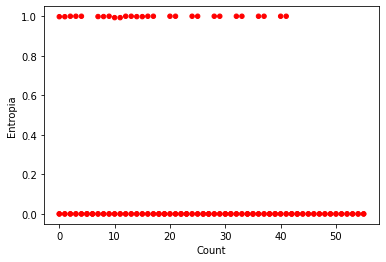

In [43]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Entropia',c='Agente')

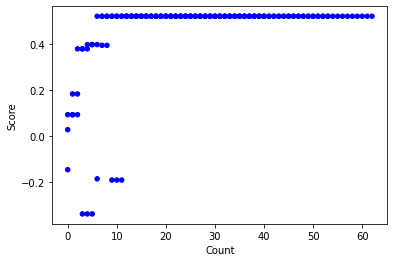

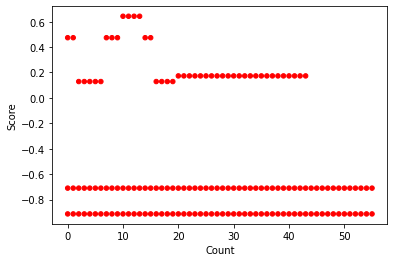

In [44]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Score',c='Agente')

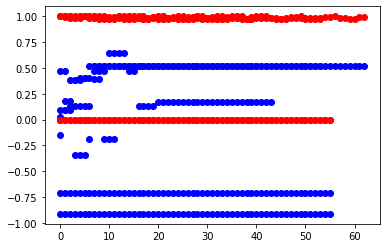

In [34]:
ax = plt.gca()

ax.scatter(y=df['Score'], x=df['Count'], color="b")
ax.scatter(y=df['Entropia'], x=df['Count'], color="r")


In [109]:

desired_columns = ['Scores']
df_long_data = []
i=0
for column in desired_columns:
    for ind, cell in df_i[column].iteritems():
        for val in cell:
            dict = {'indice':i,'agente':df_i['Agente'][ind],'NumeroMossa': ind, 'ScoresMossa': val,'partita':df_i['Numero Partita'][ind],'ScoreScelto':df_i['Score'][ind],'winner':df_i['winner'][ind]}
            df_long_data.append(dict)
            i=i+1
df_long = pd.DataFrame(df_long_data)
#sns.scatterplot(x='timestamp', y='value', hue='column_name', data=df_long)
#plt.show()

In [110]:
df_long

indice agente  NumeroMossa  ScoresMossa  partita  ScoreScelto winner
0           0   blue            0    -0.147139        0     0.092901   blue
1           1   blue            0     0.092901        0     0.092901   blue
2           2   blue            0     0.092901        0     0.092901   blue
3           3   blue            0     0.092901        0     0.092901   blue
4           4   blue            0     0.092901        0     0.092901   blue
...       ...    ...          ...          ...      ...          ...    ...
29310   29310    red          313    -0.955419        2    -0.913466   blue
29311   29311    red          313    -0.955419        2    -0.913466   blue
29312   29312    red          313    -0.955419        2    -0.913466   blue
29313   29313    red          313    -0.955419        2    -0.913466   blue
29314   29314    red          313    -0.955419        2    -0.913466   blue

[29315 rows x 7 columns]

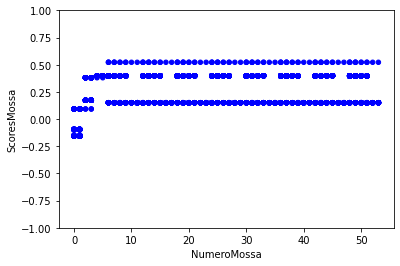

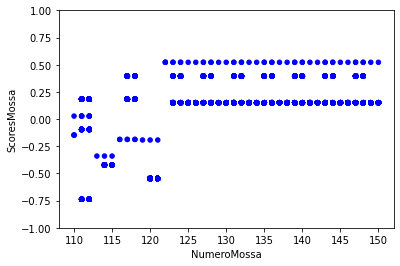

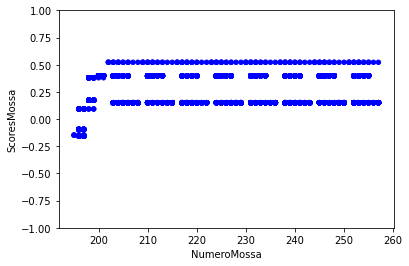

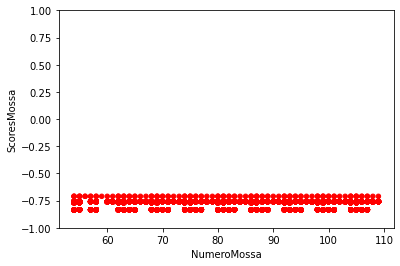

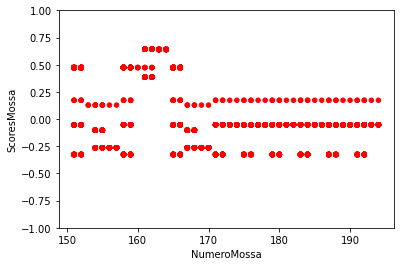

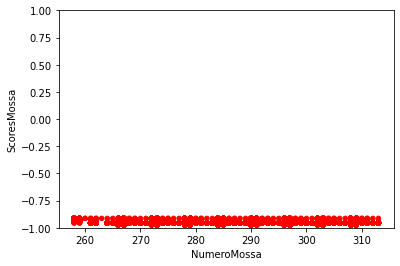

In [105]:
plot=df_long.groupby(['agente','partita']).plot.scatter(x='NumeroMossa',y='ScoresMossa',c='agente',ylim=[-1,1])

C:\Users\Nicol\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


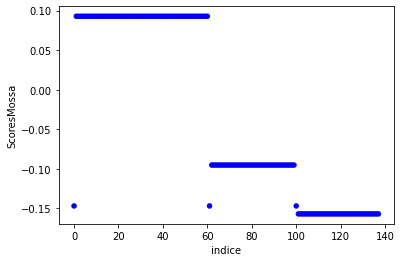

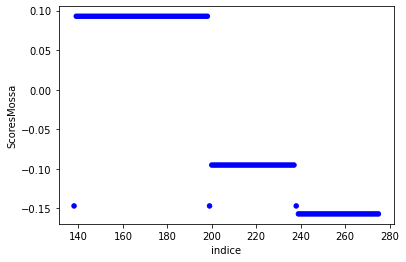

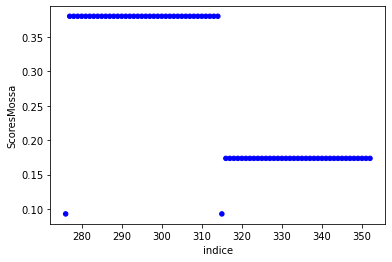

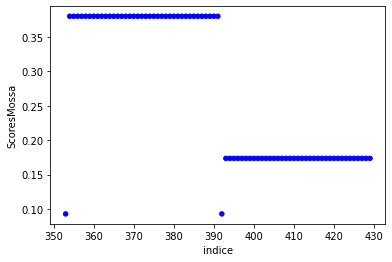

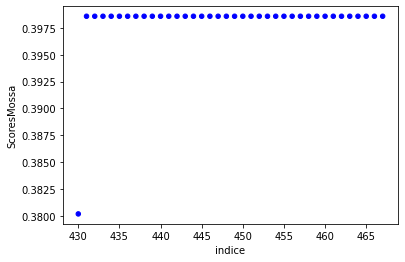

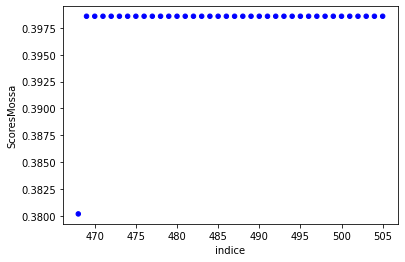

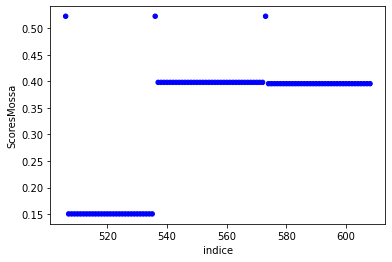

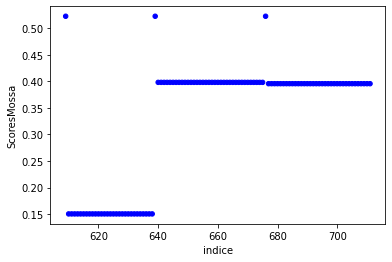

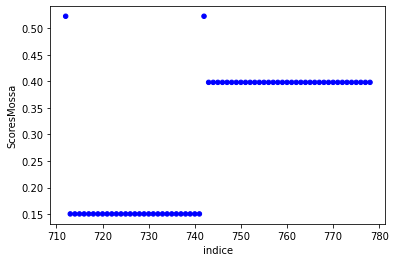

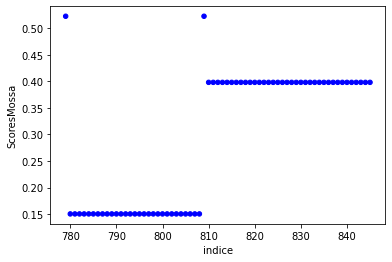

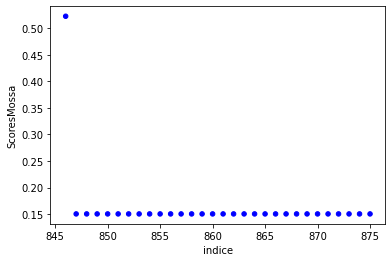

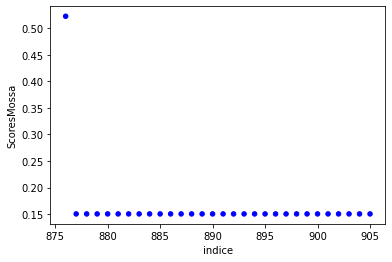

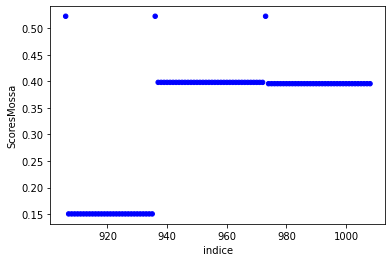

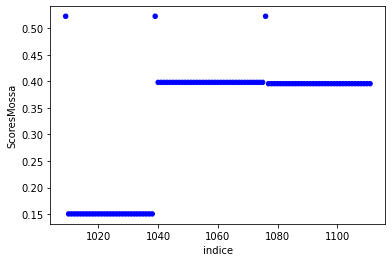

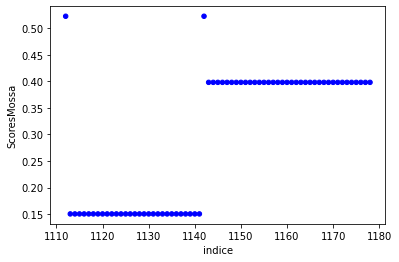

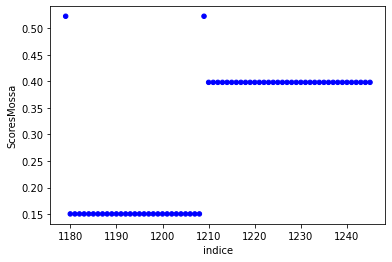

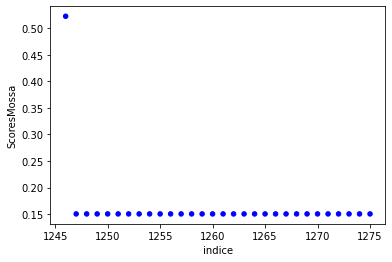

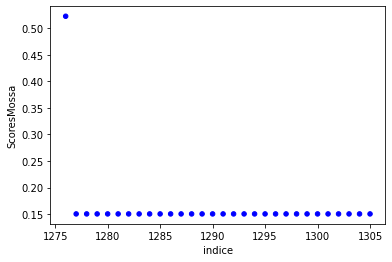

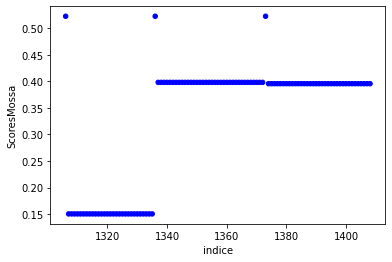

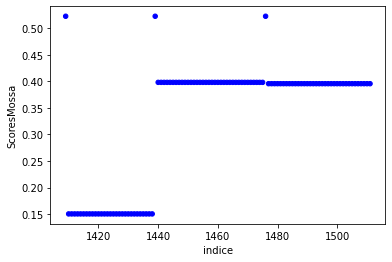

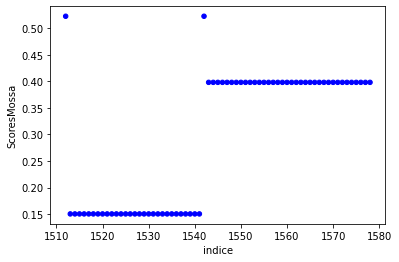

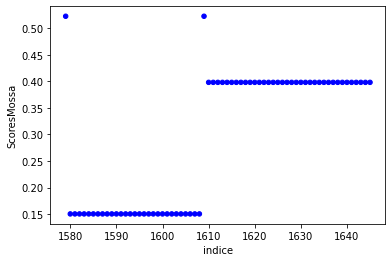

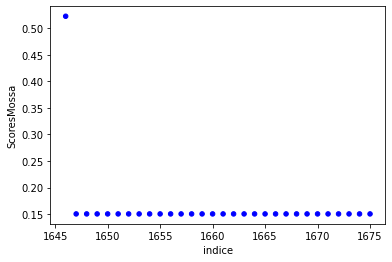

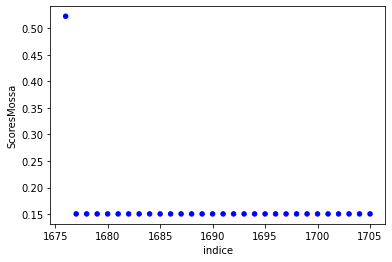

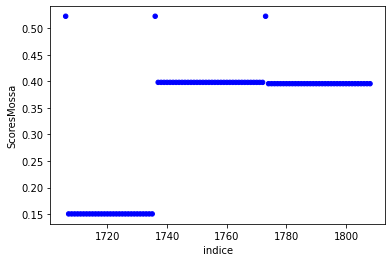

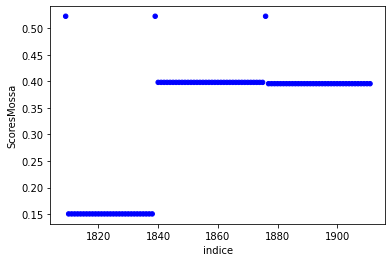

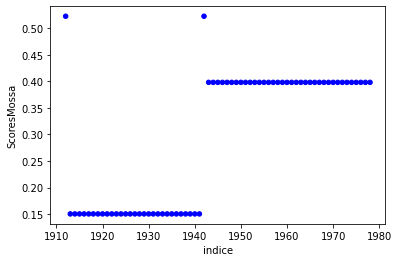

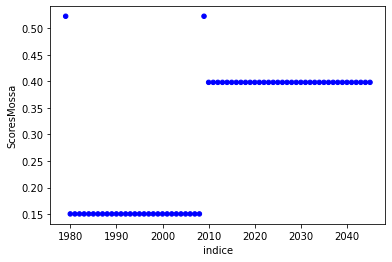

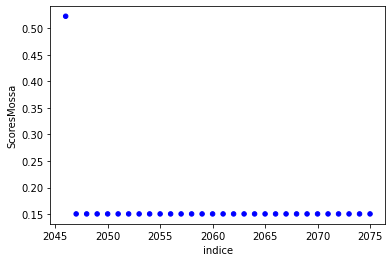

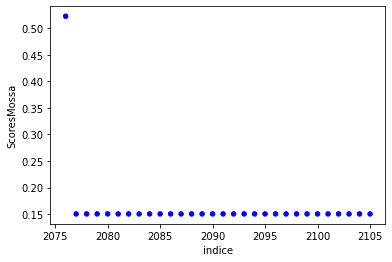

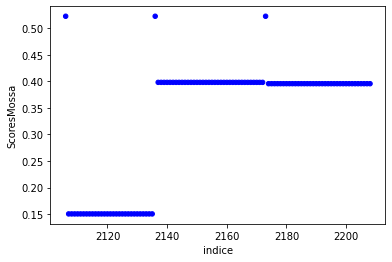

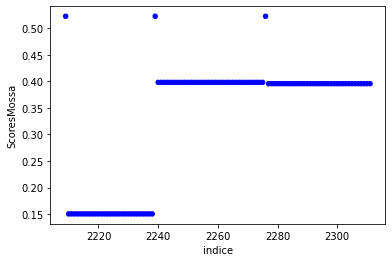

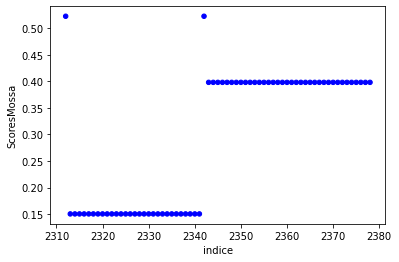

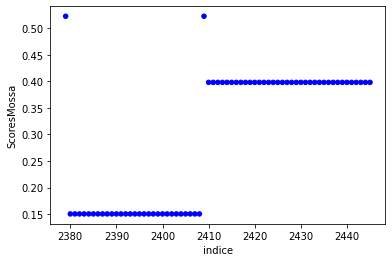

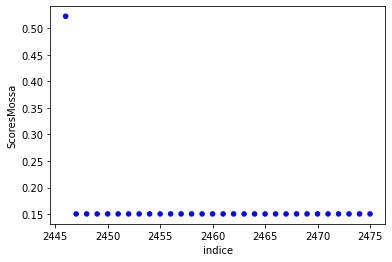

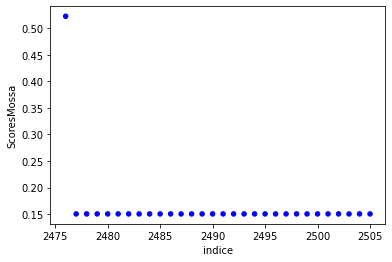

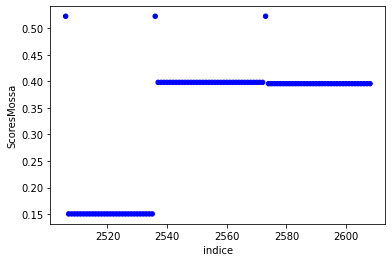

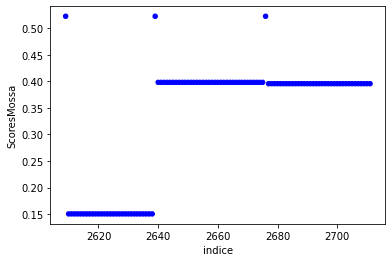

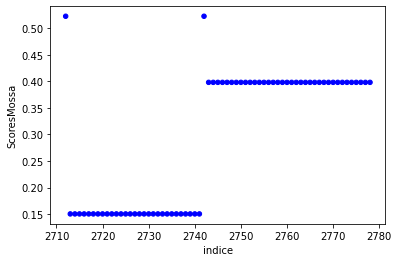

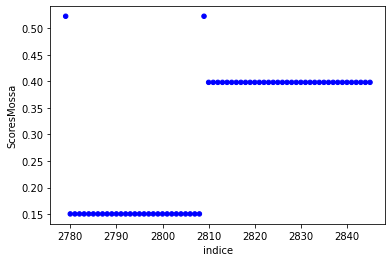

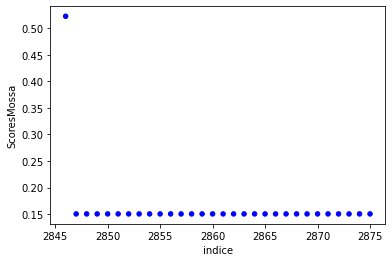

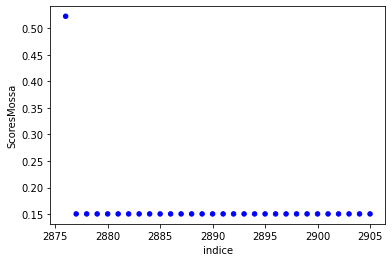

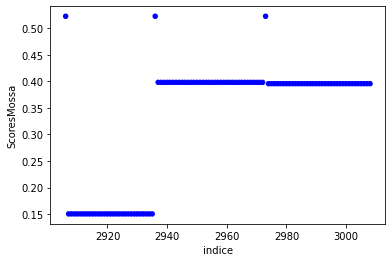

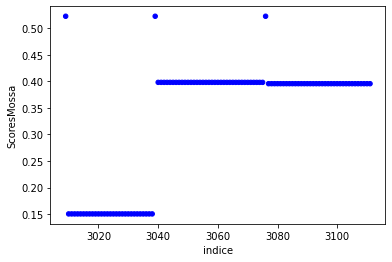

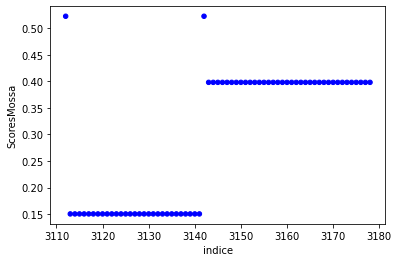

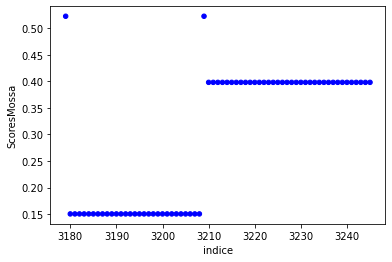

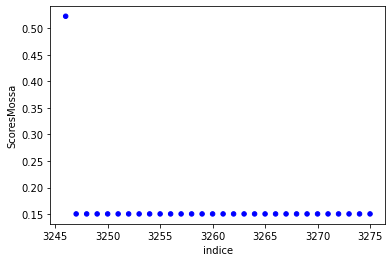

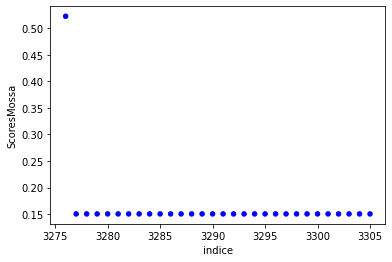

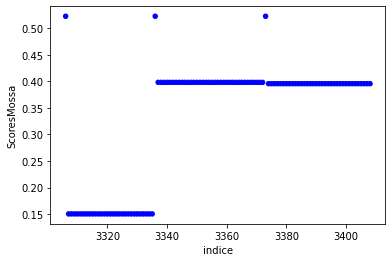

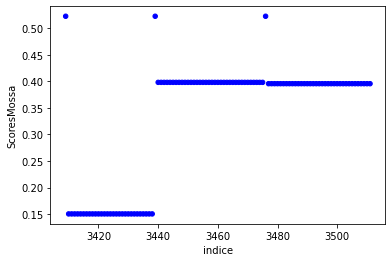

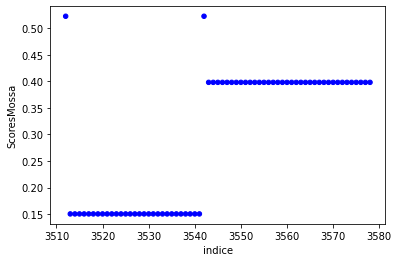

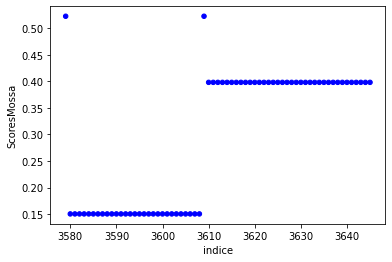

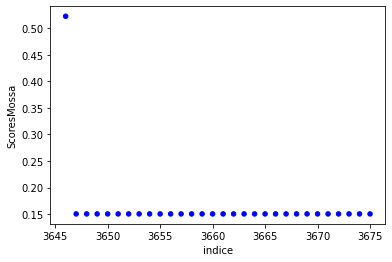

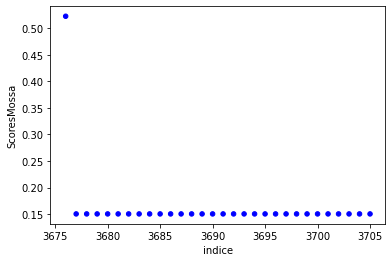

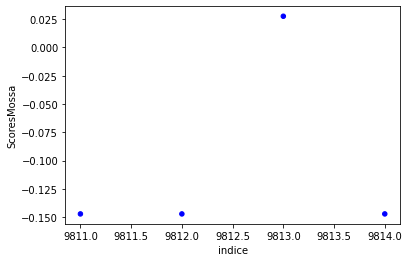

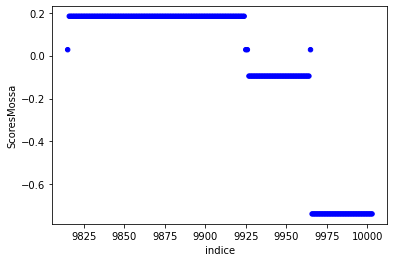

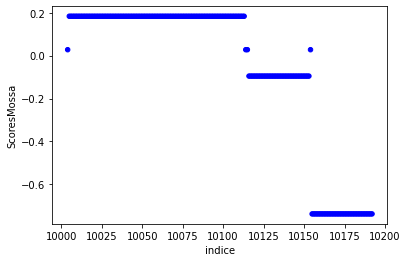

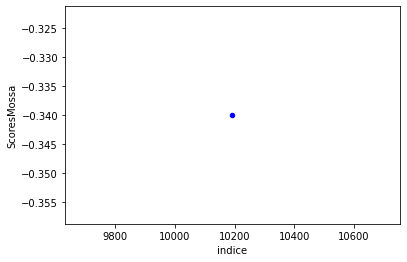

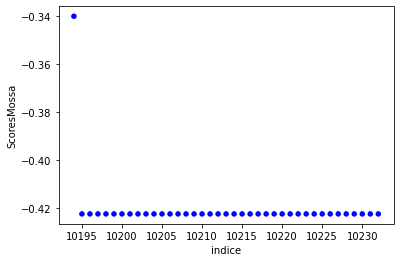

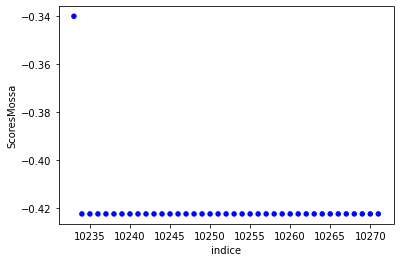

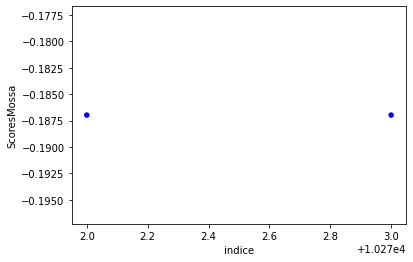

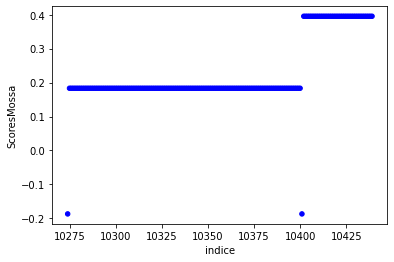

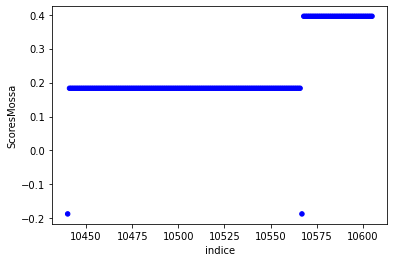

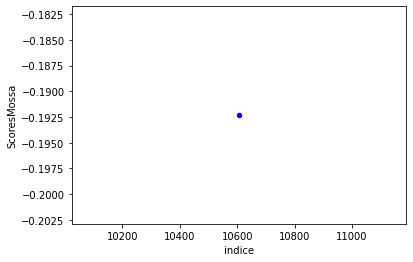

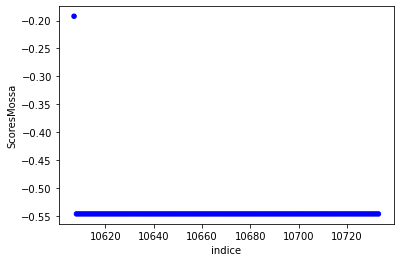

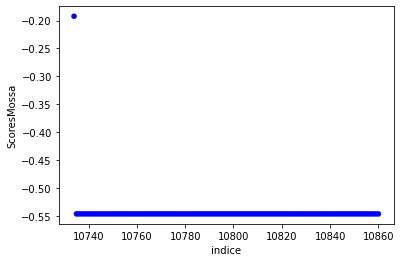

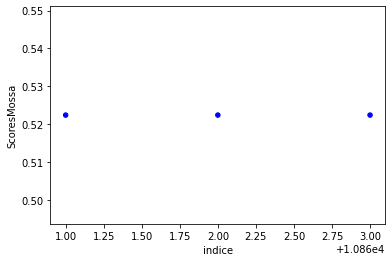

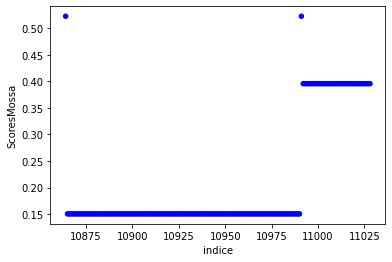

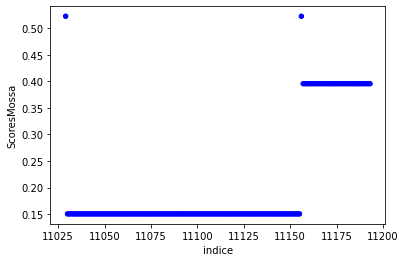

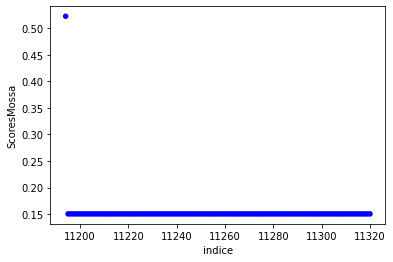

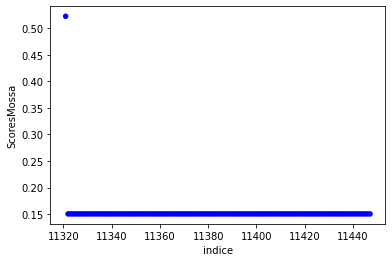

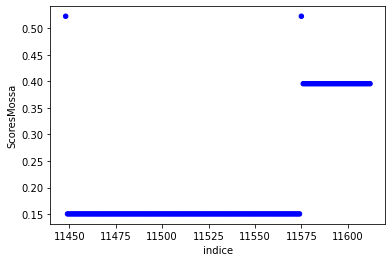

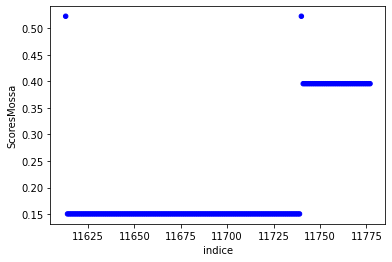

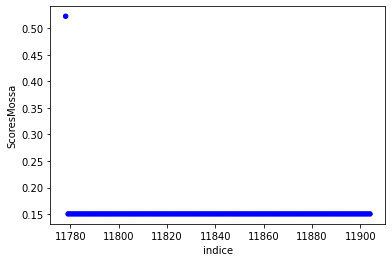

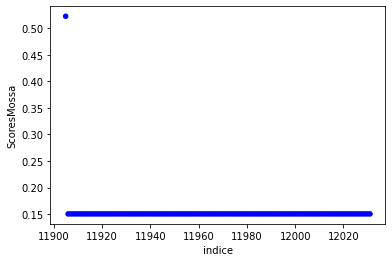

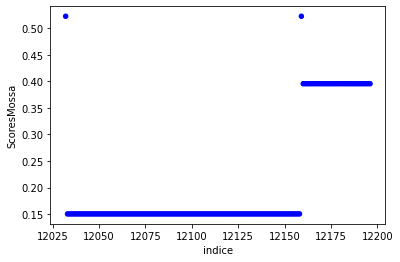

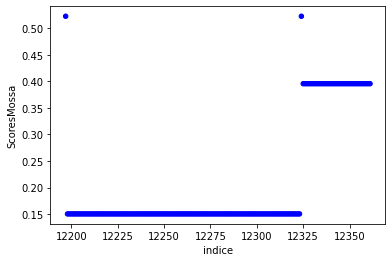

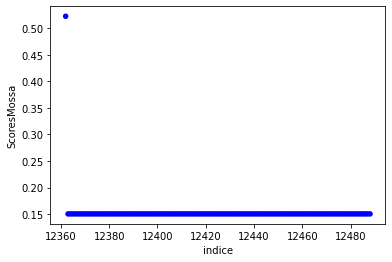

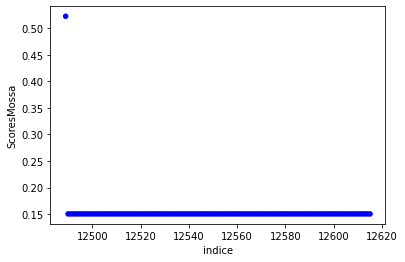

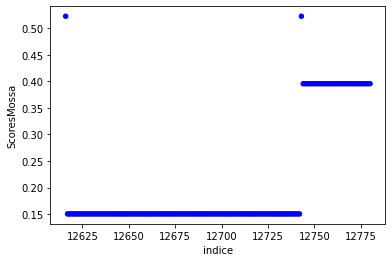

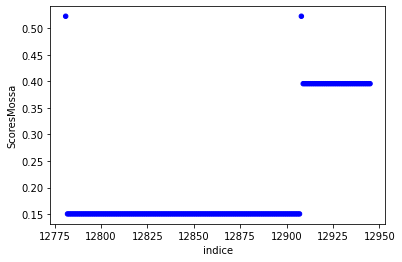

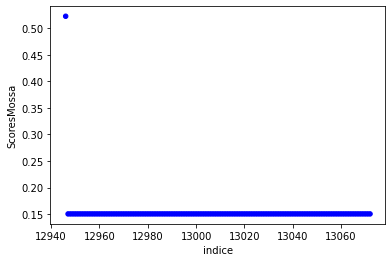

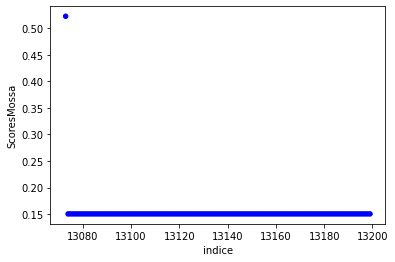

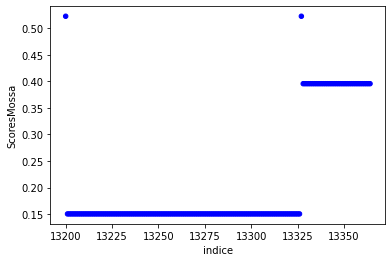

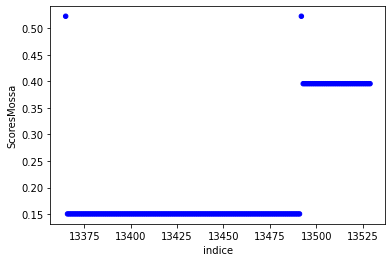

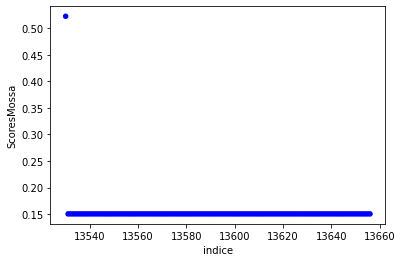

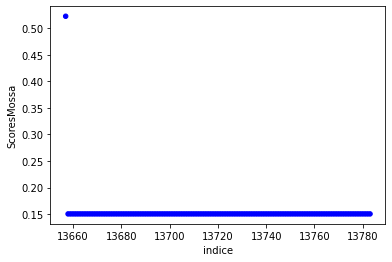

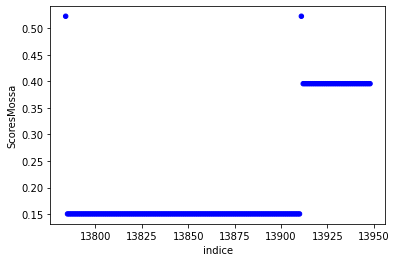

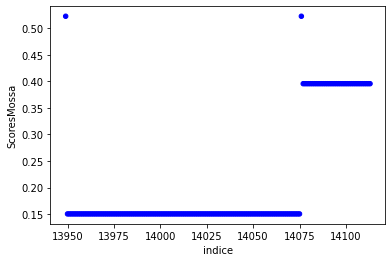

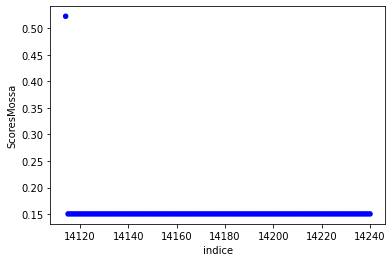

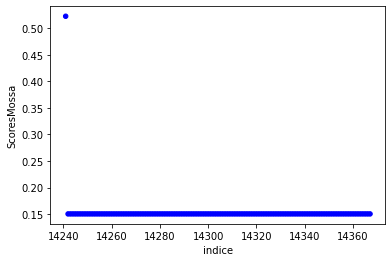

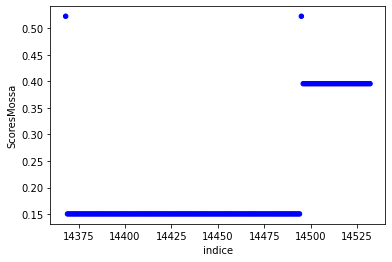

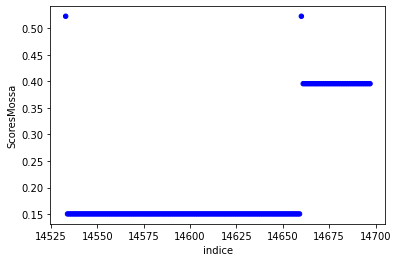

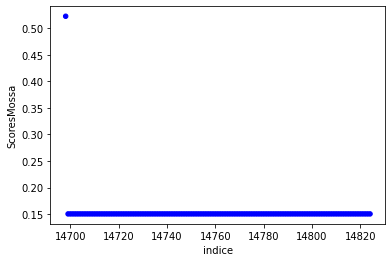

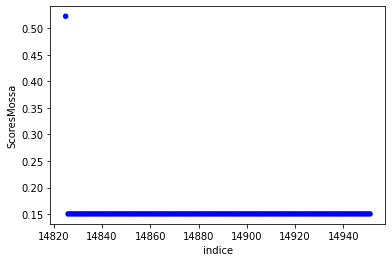

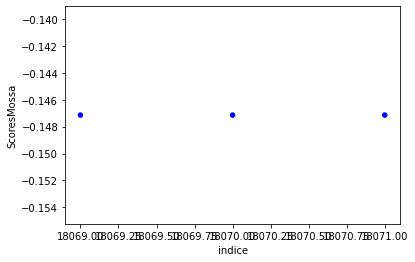

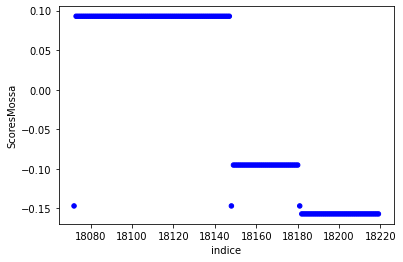

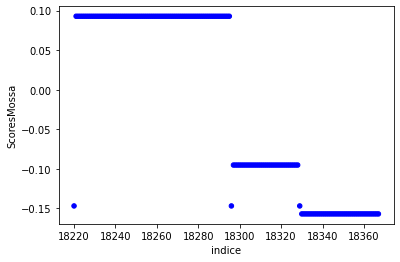

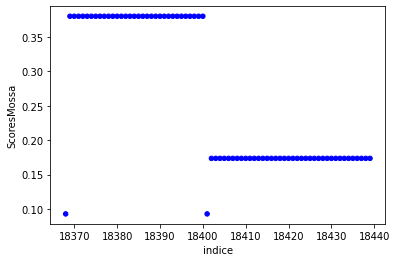

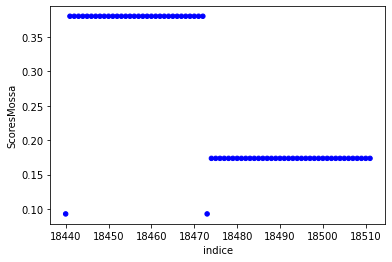

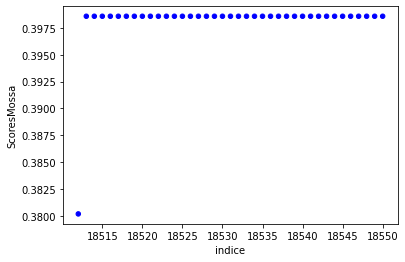

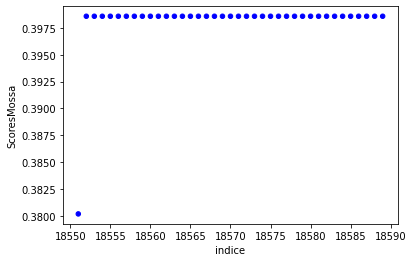

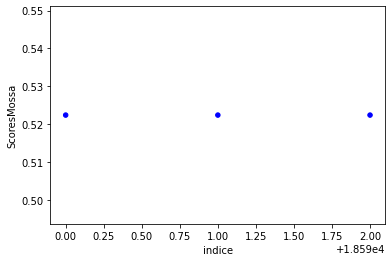

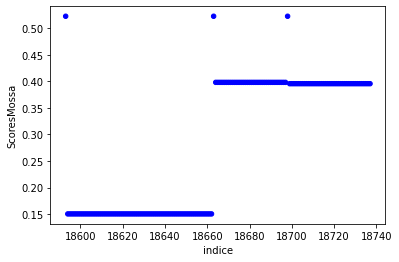

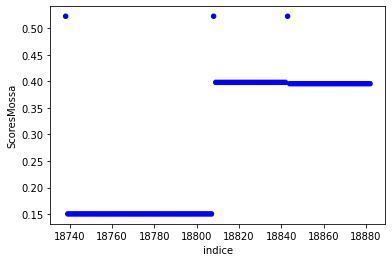

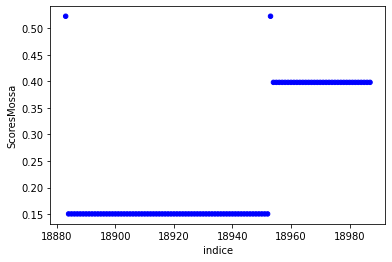

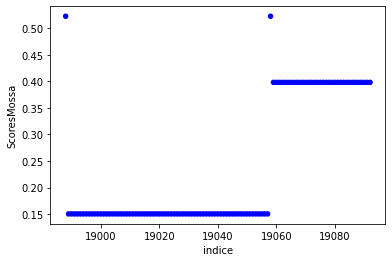

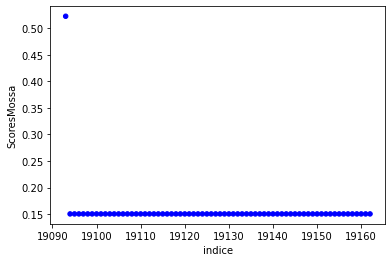

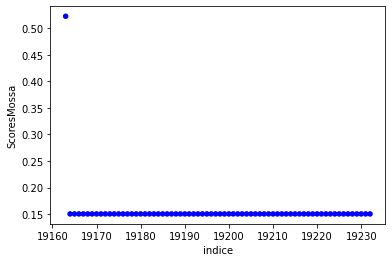

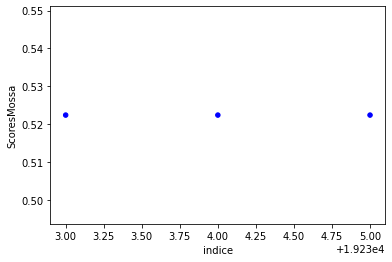

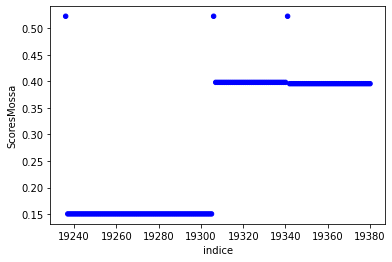

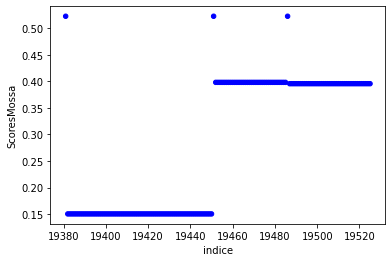

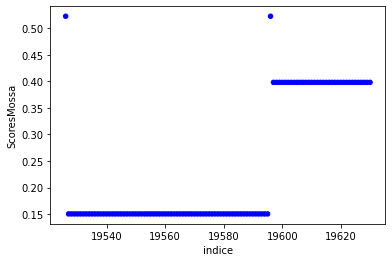

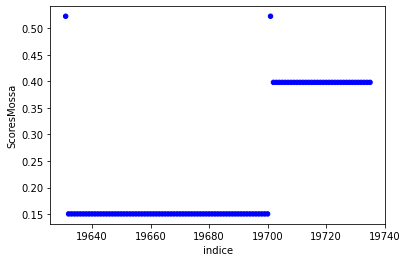

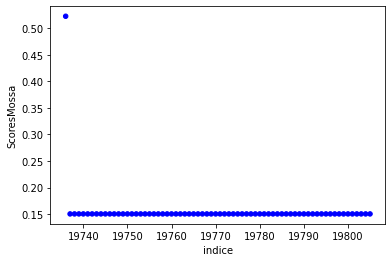

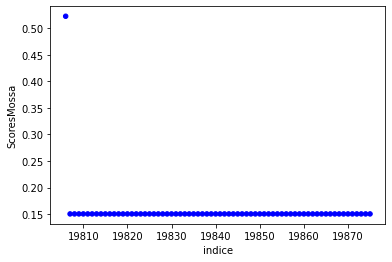

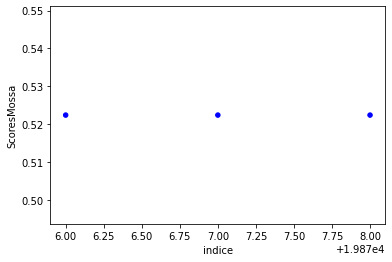

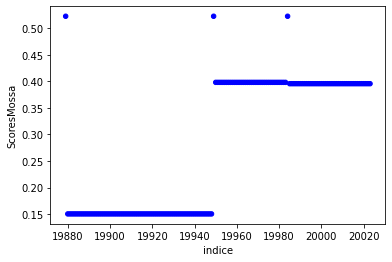

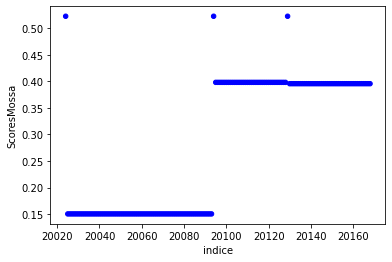

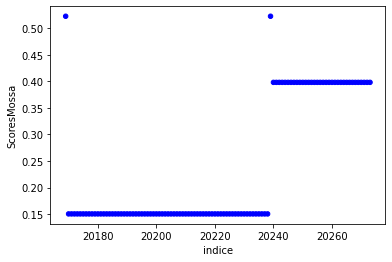

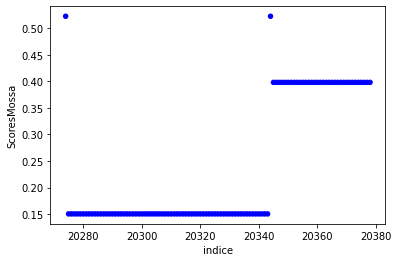

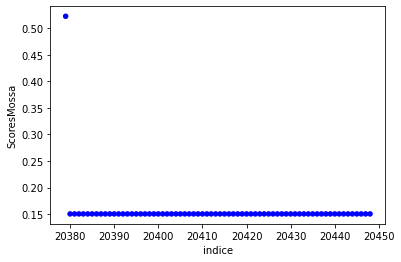

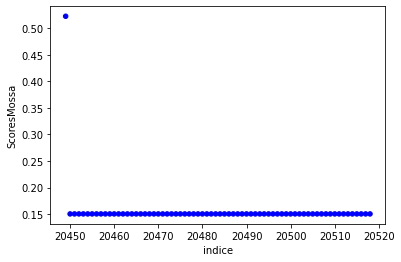

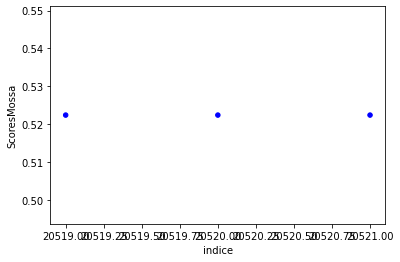

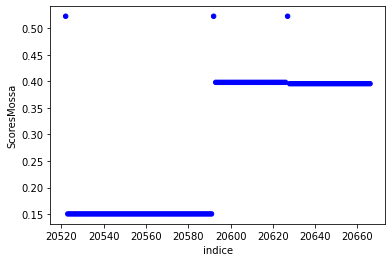

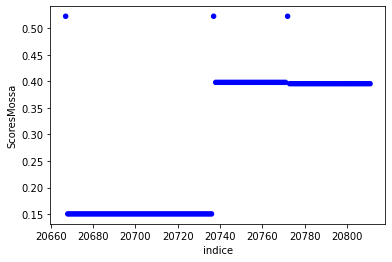

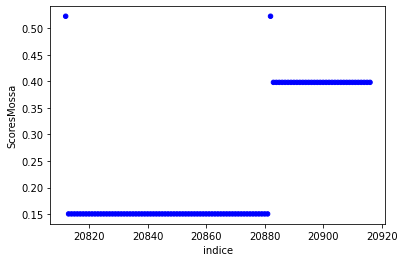

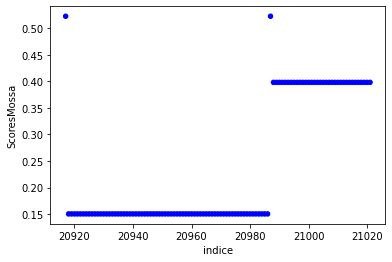

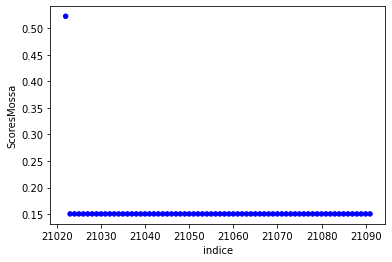

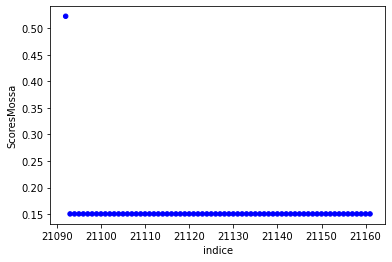

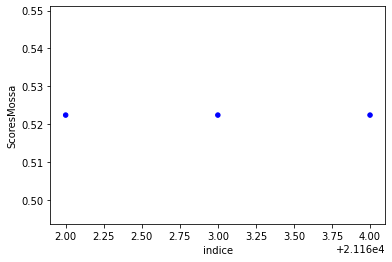

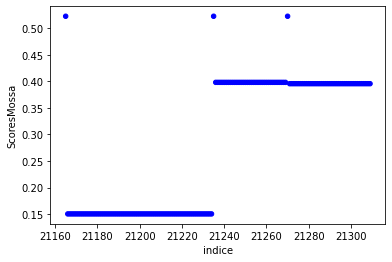

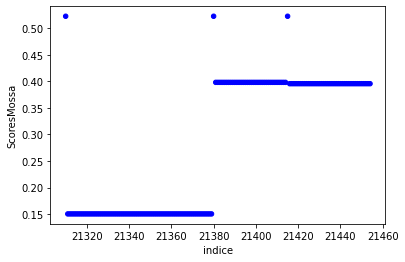

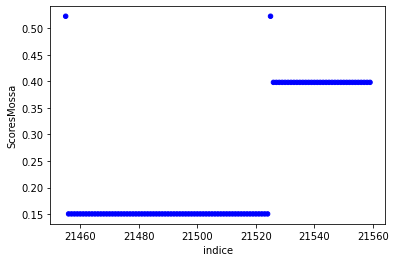

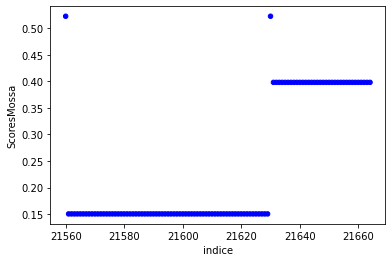

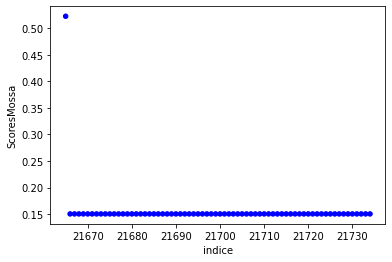

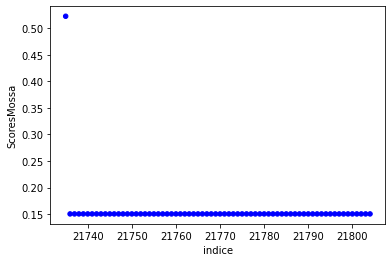

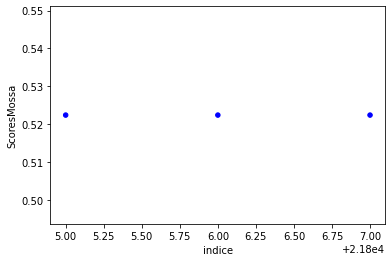

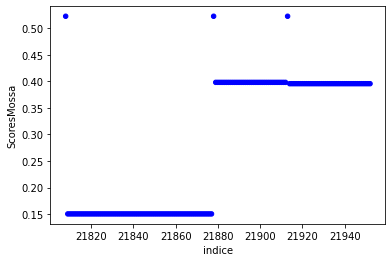

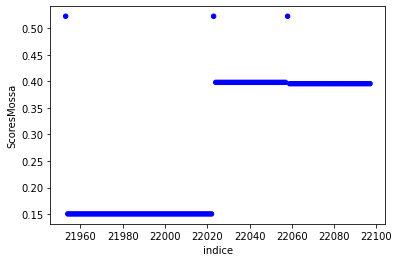

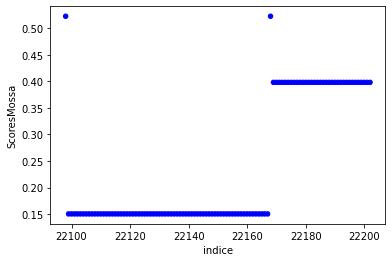

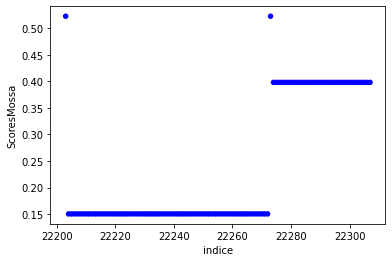

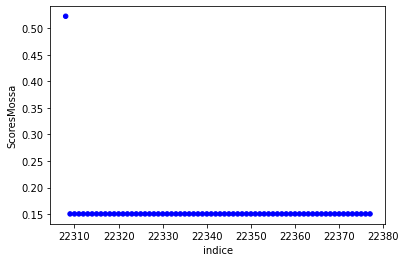

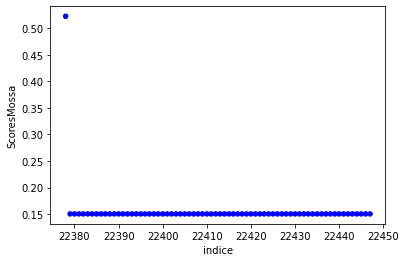

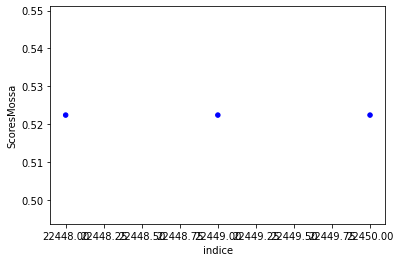

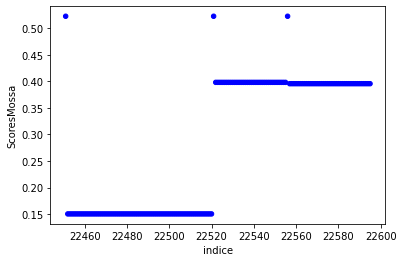

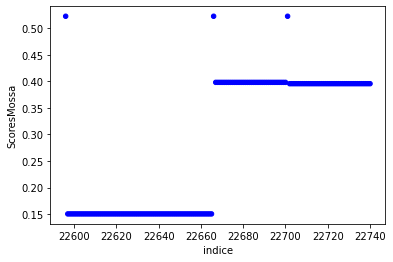

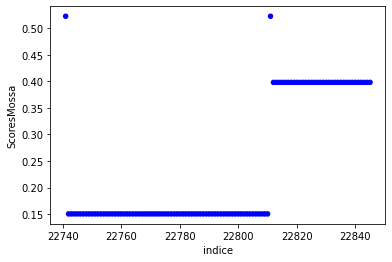

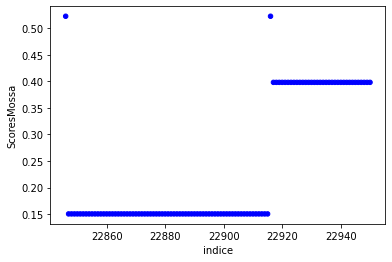

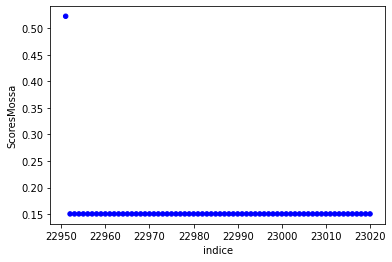

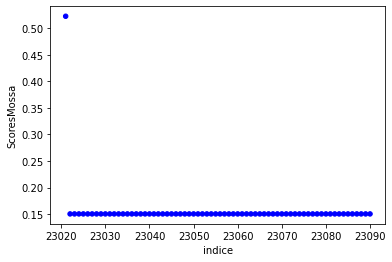

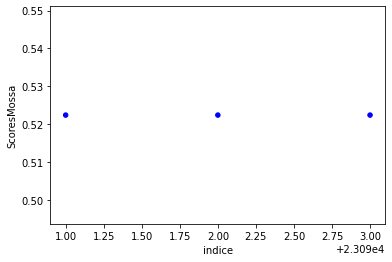

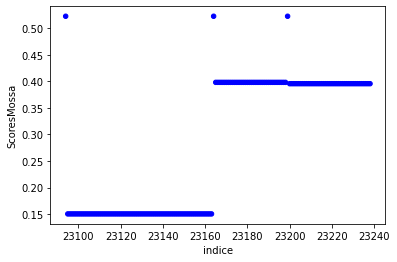

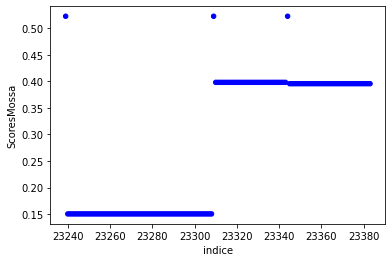

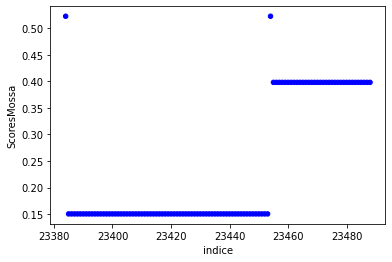

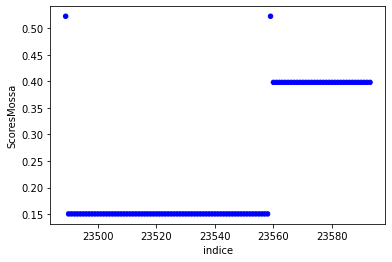

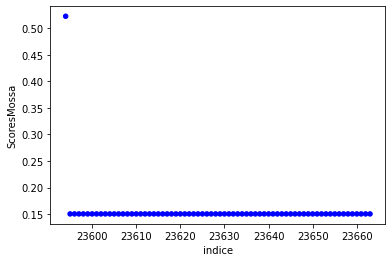

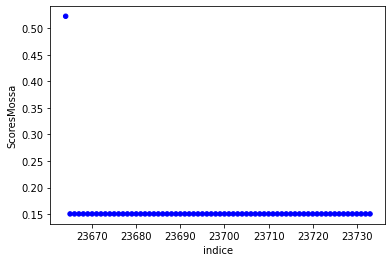

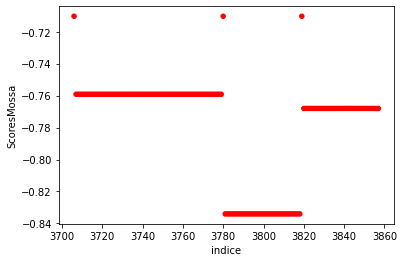

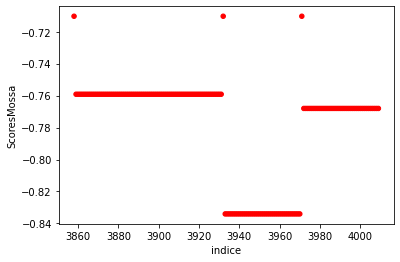

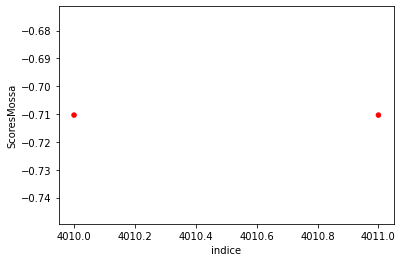

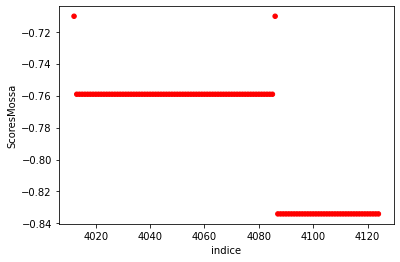

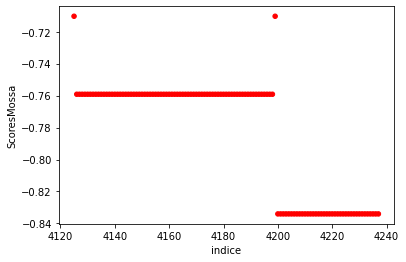

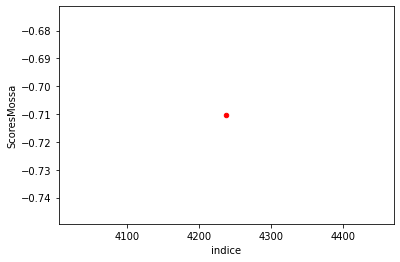

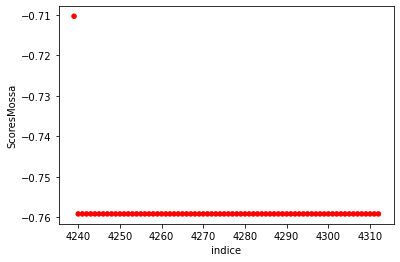

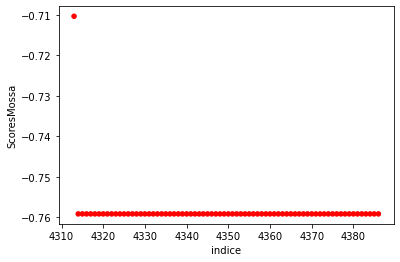

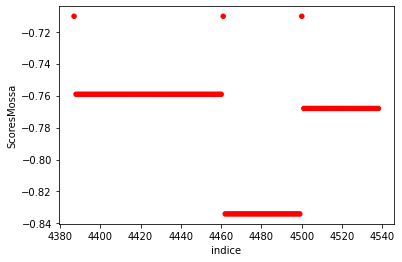

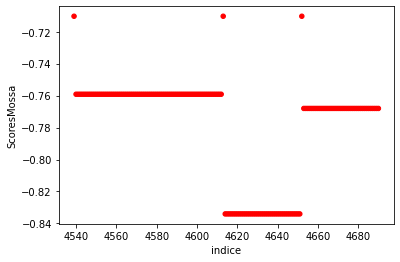

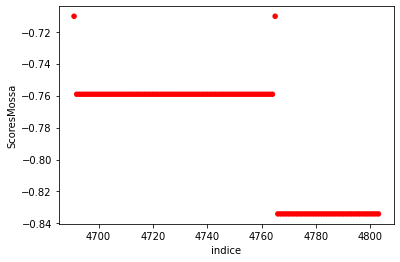

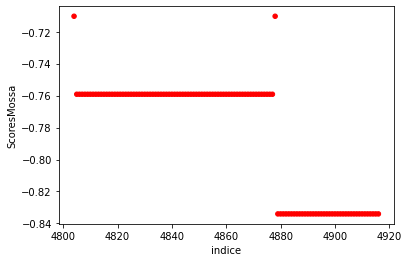

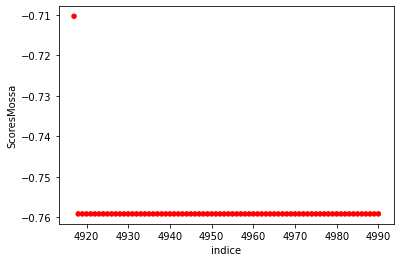

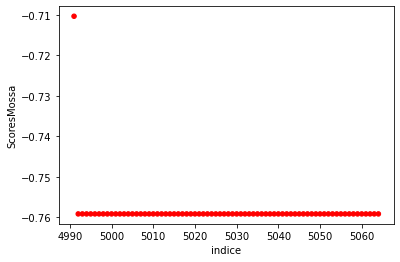

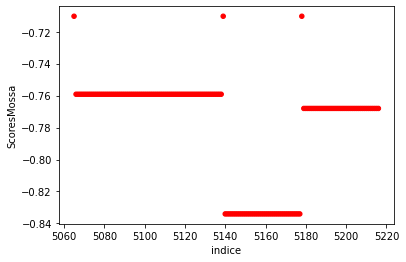

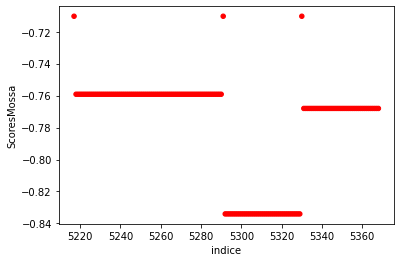

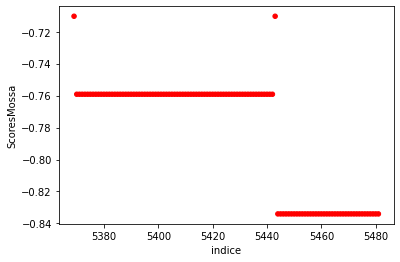

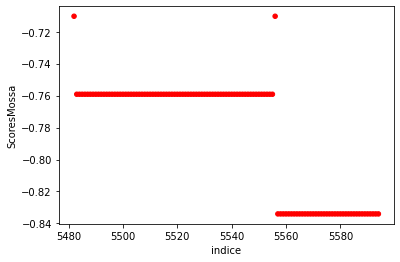

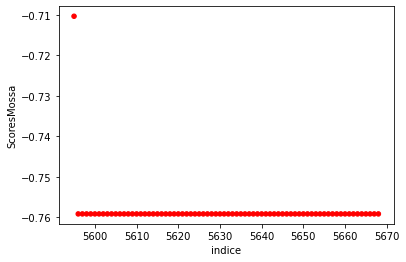

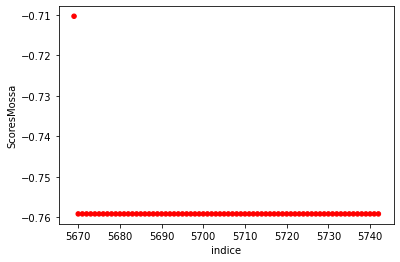

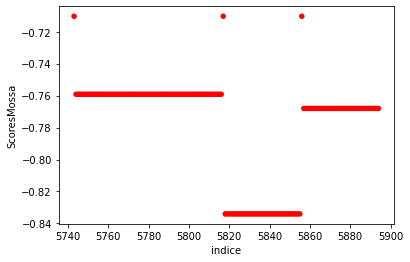

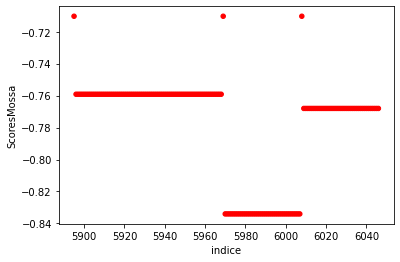

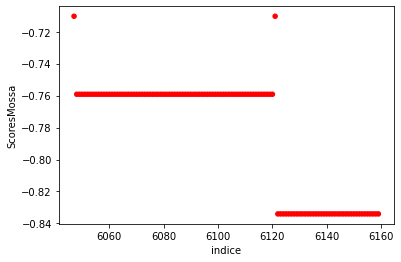

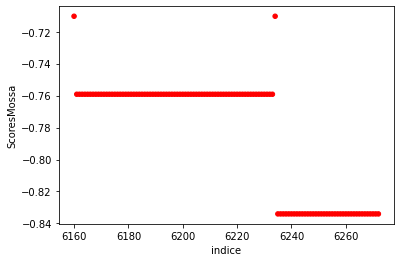

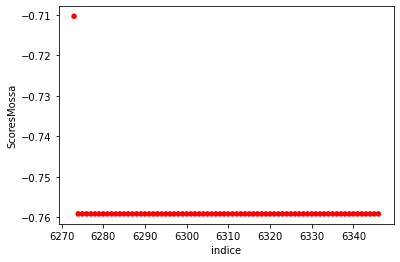

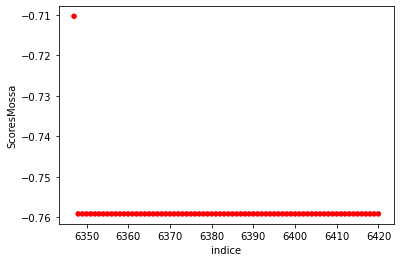

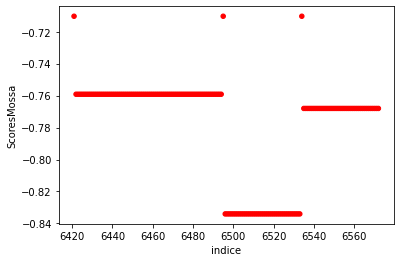

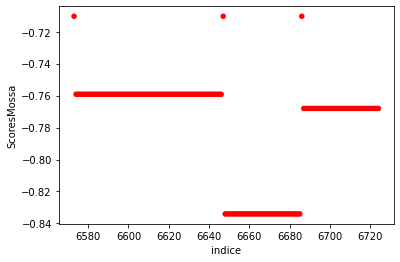

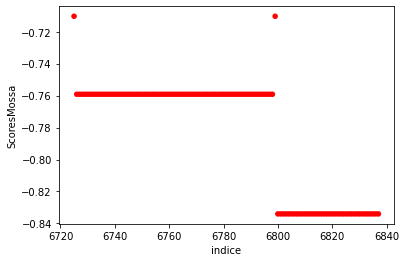

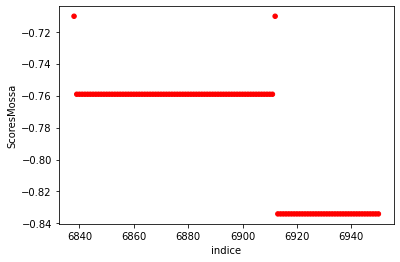

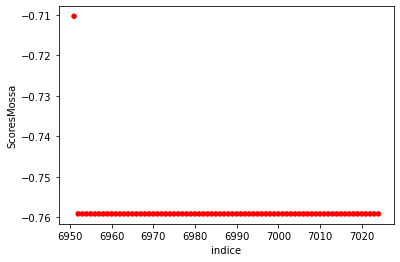

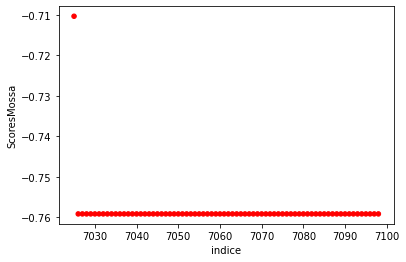

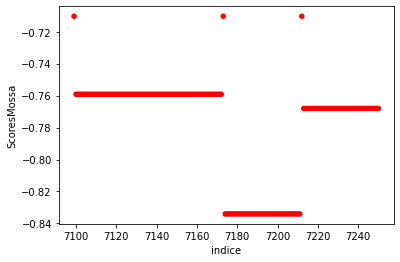

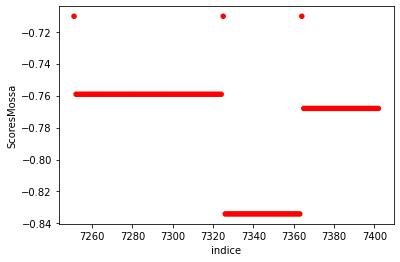

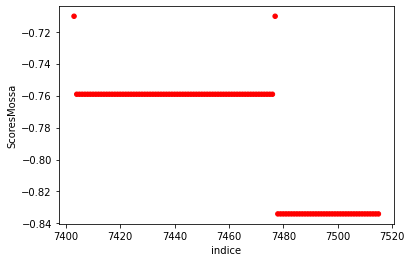

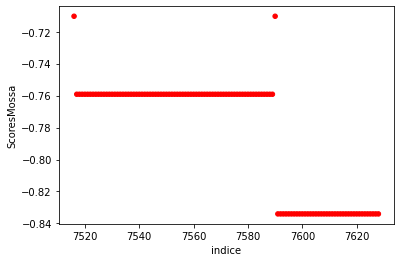

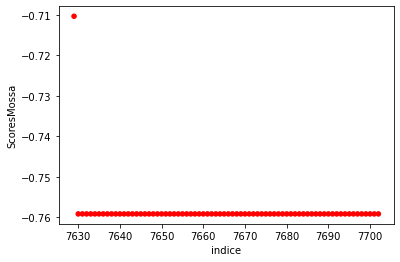

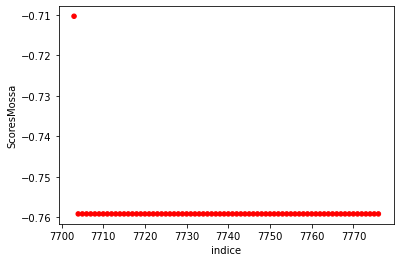

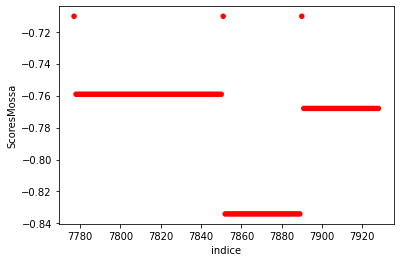

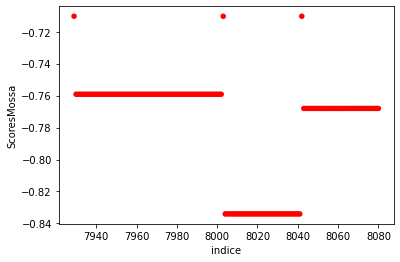

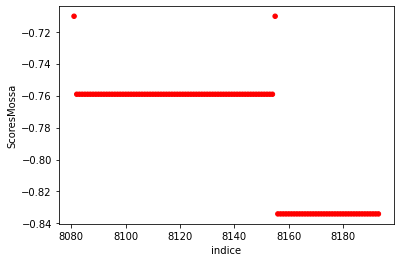

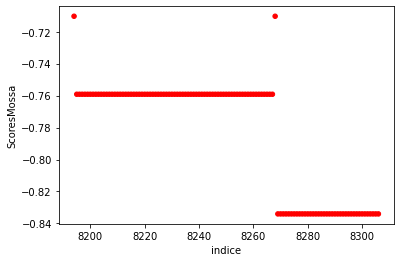

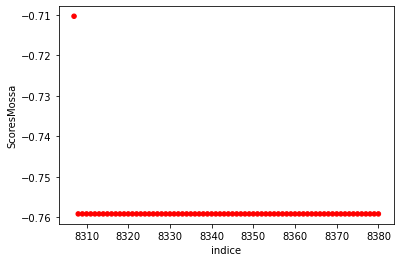

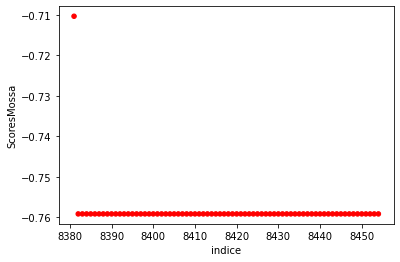

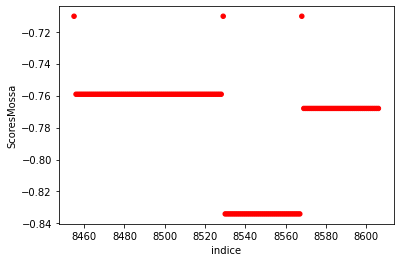

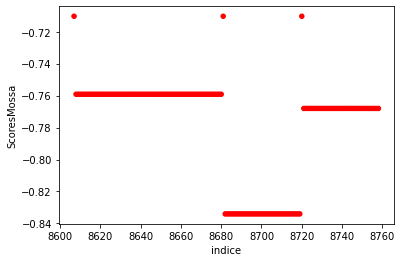

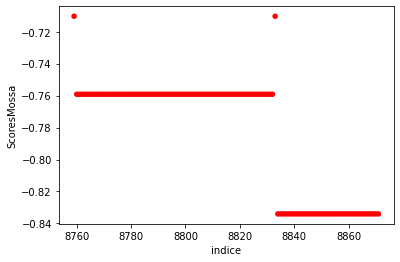

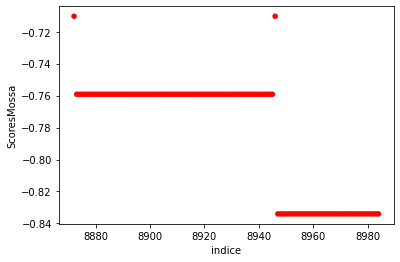

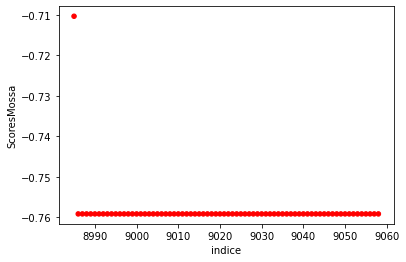

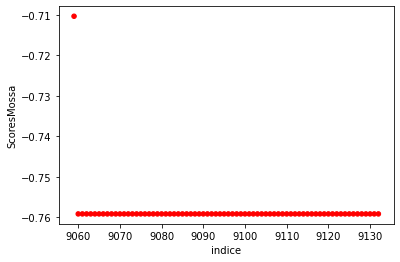

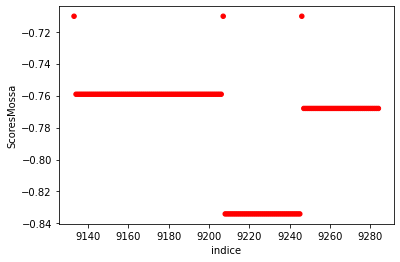

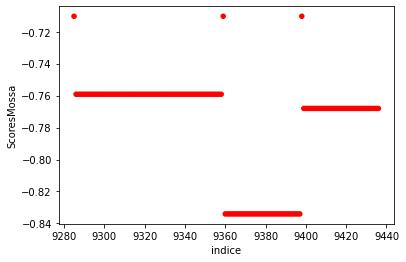

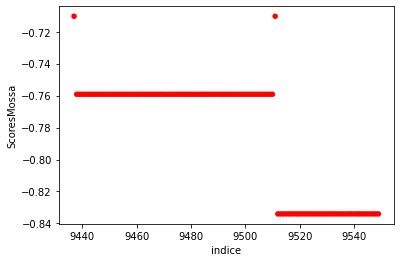

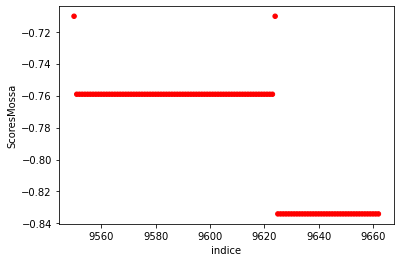

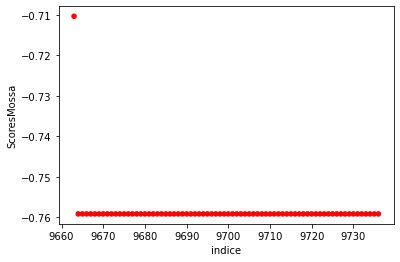

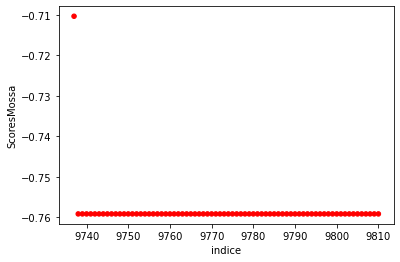

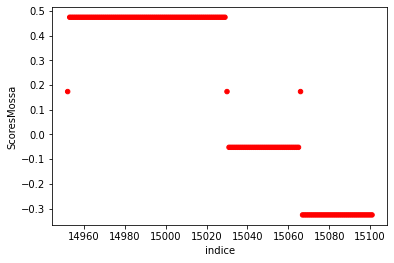

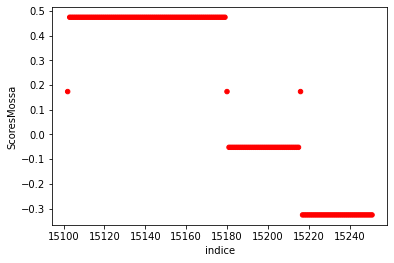

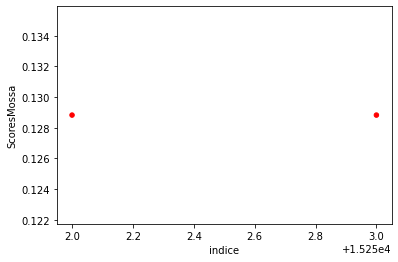

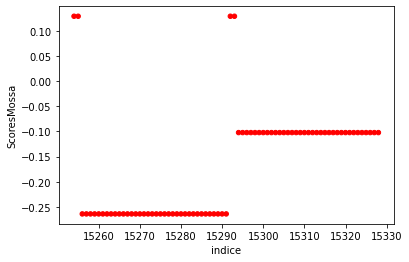

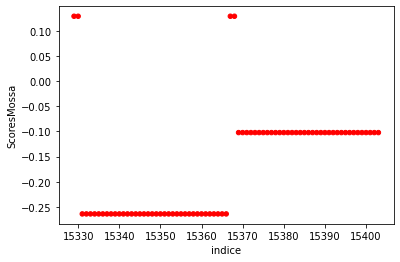

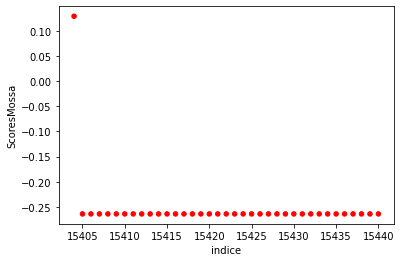

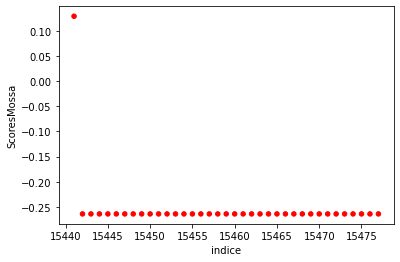

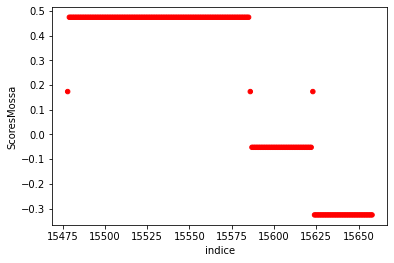

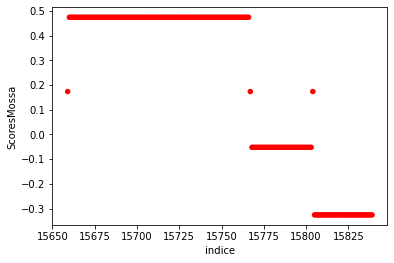

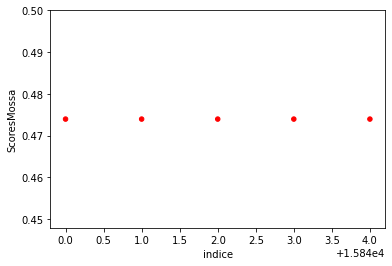

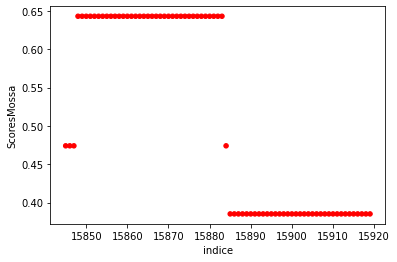

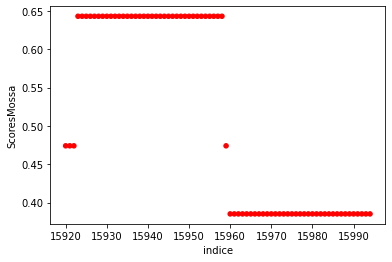

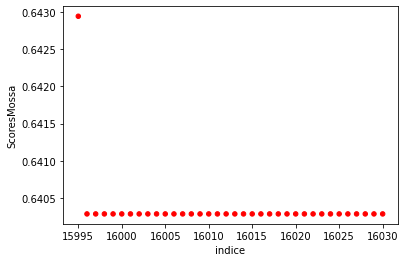

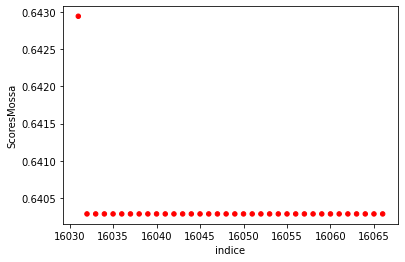

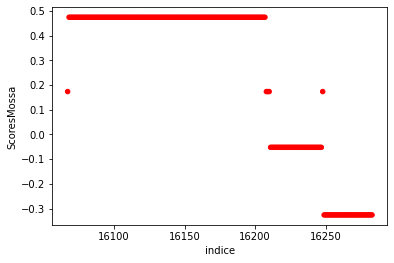

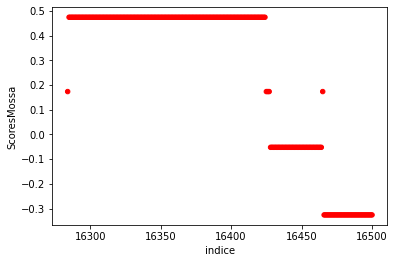

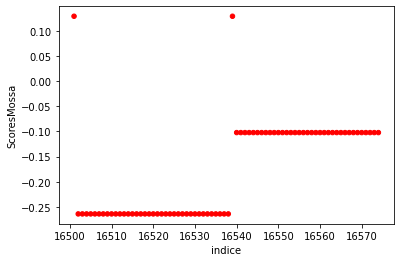

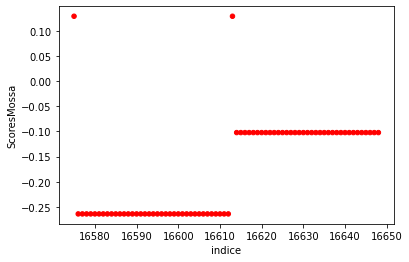

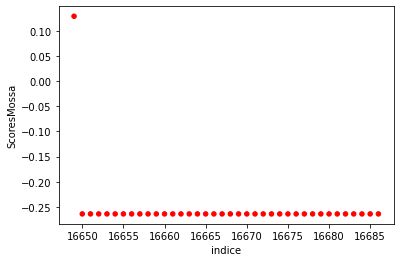

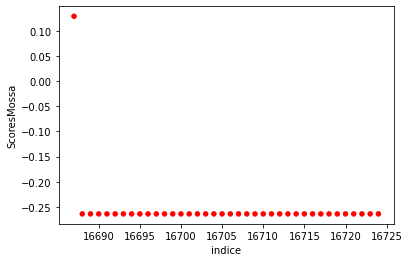

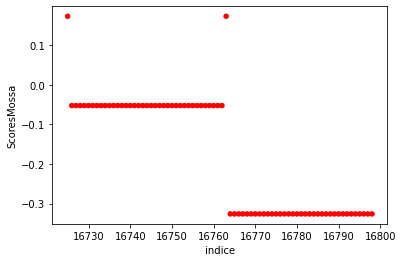

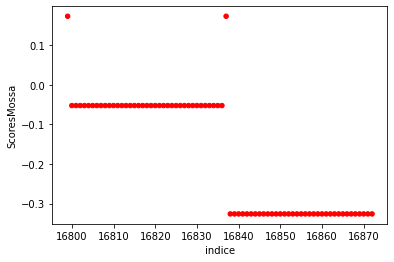

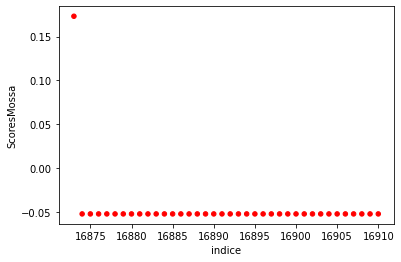

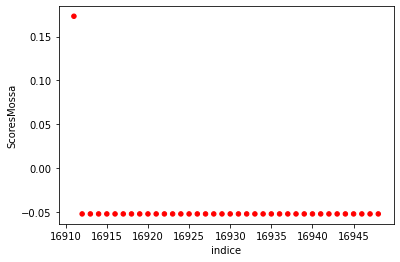

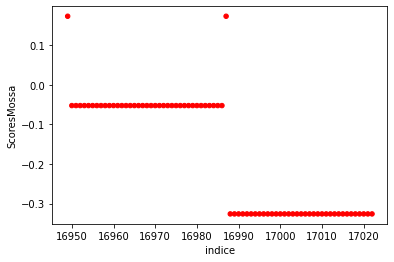

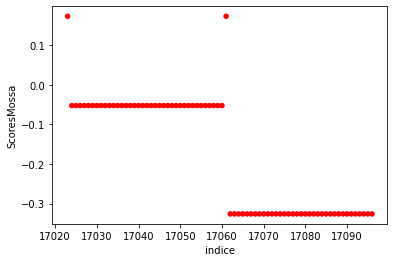

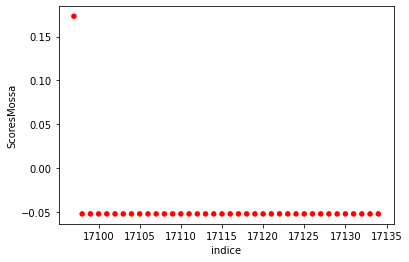

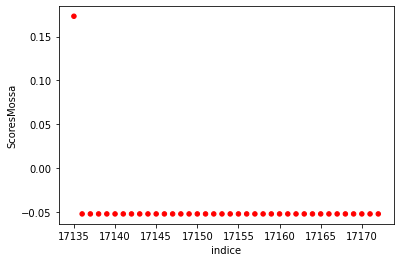

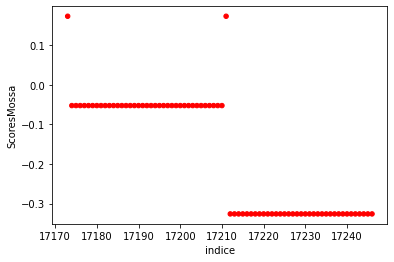

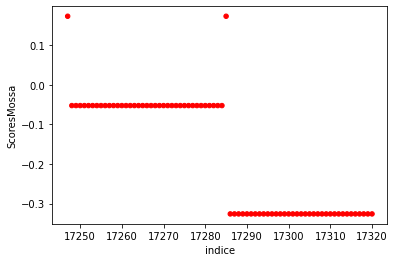

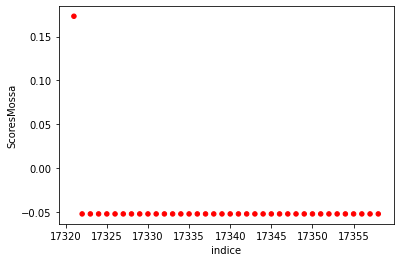

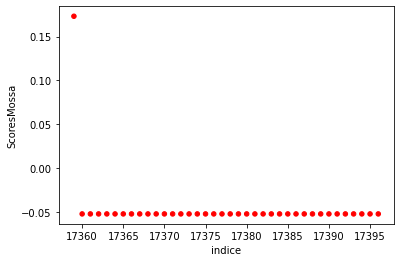

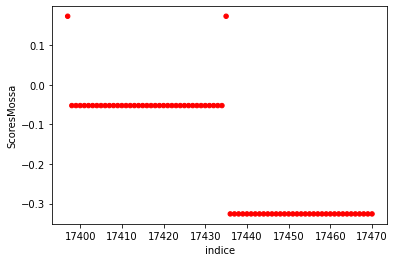

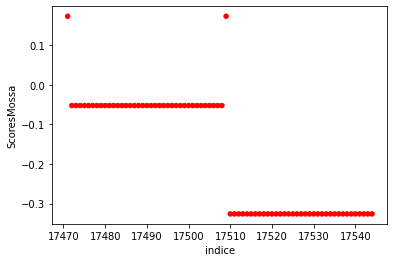

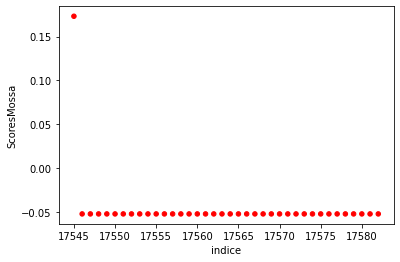

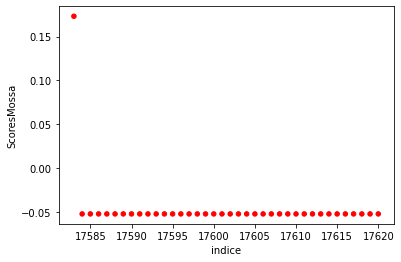

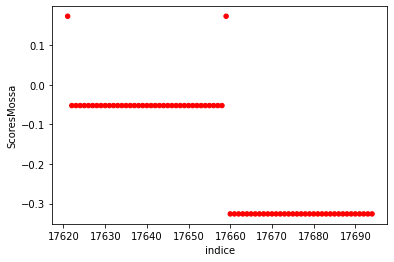

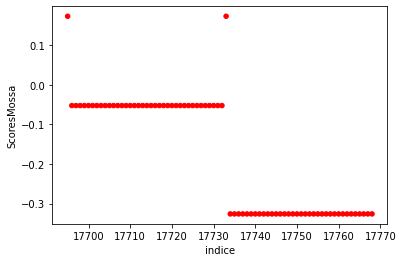

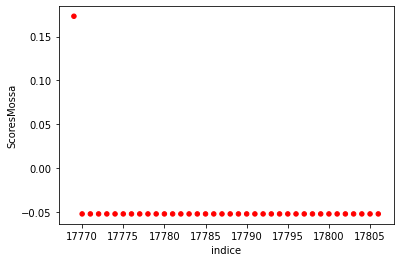

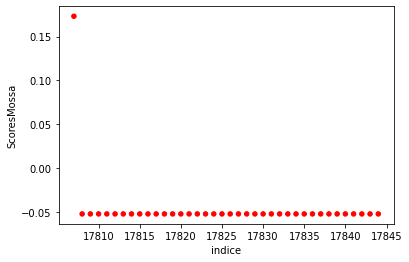

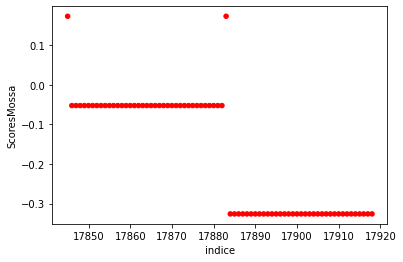

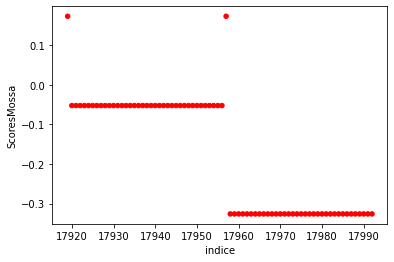

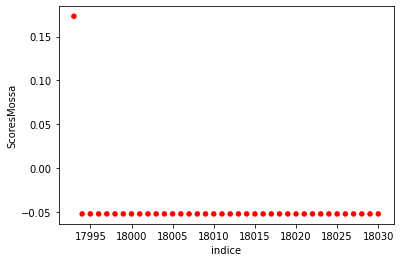

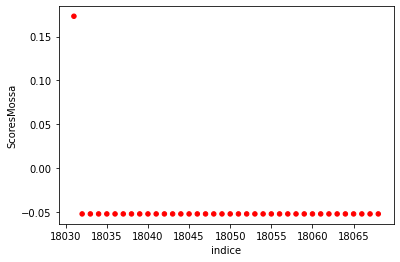

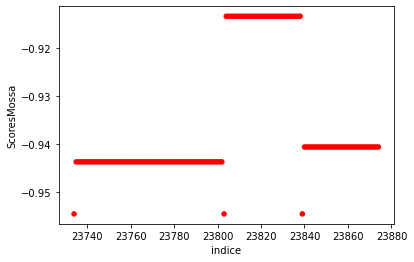

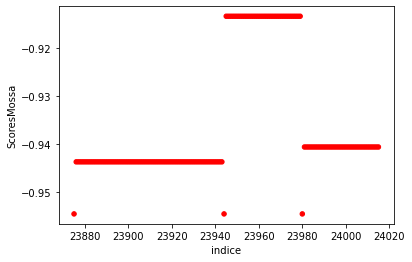

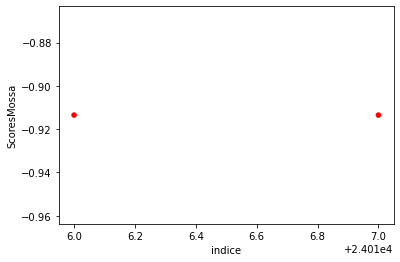

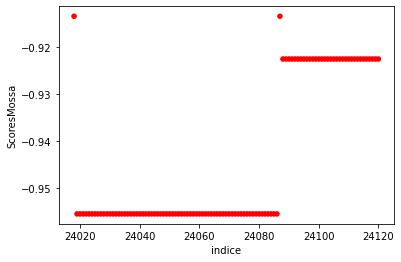

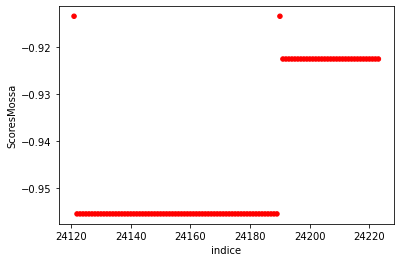

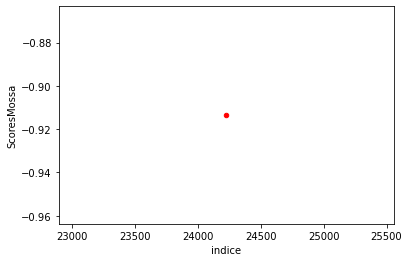

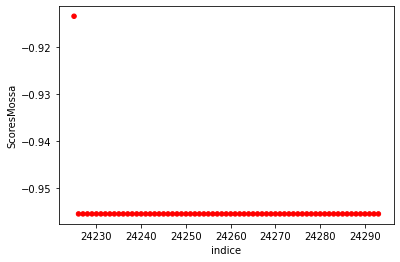

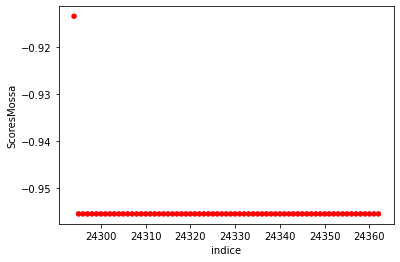

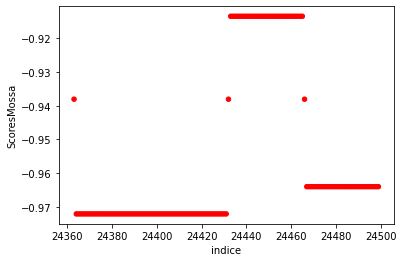

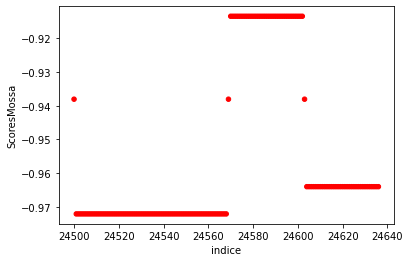

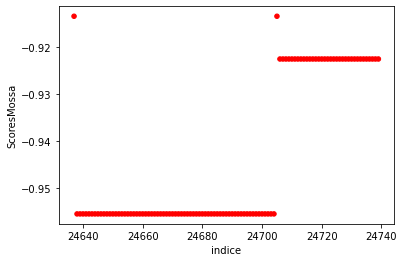

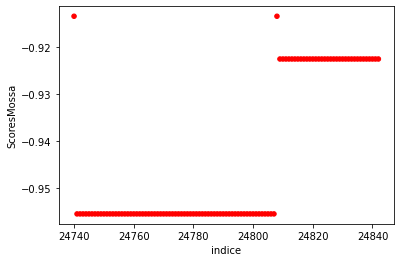

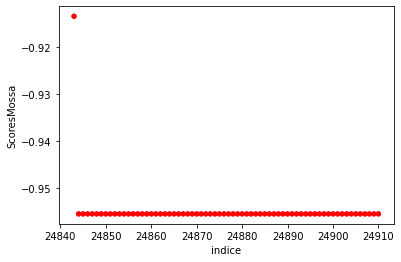

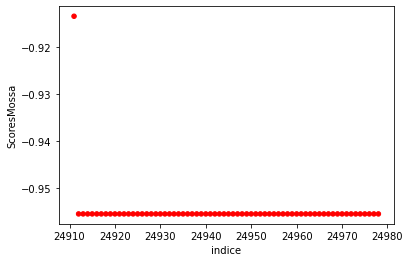

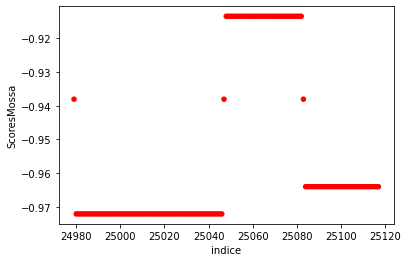

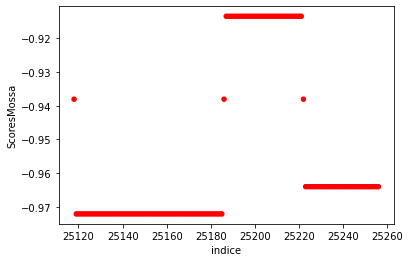

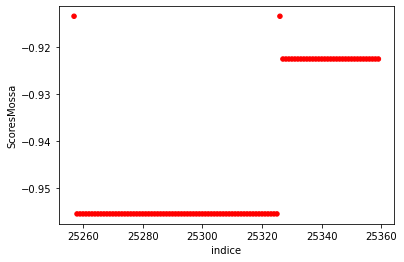

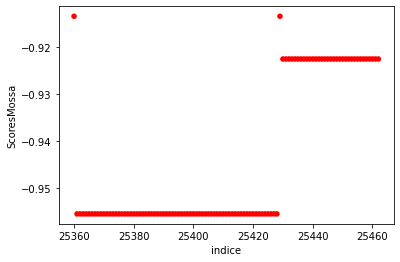

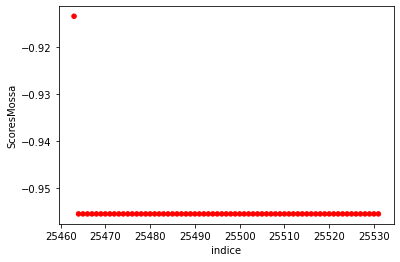

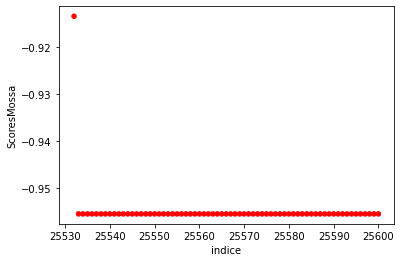

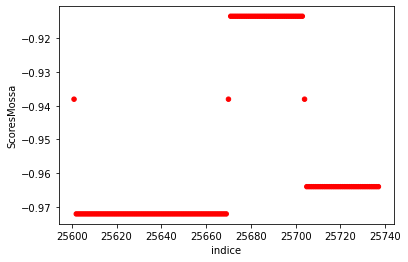

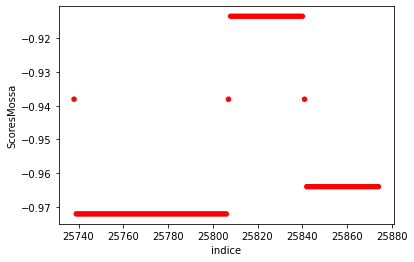

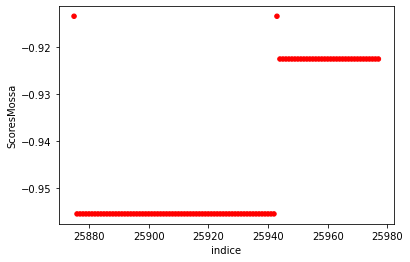

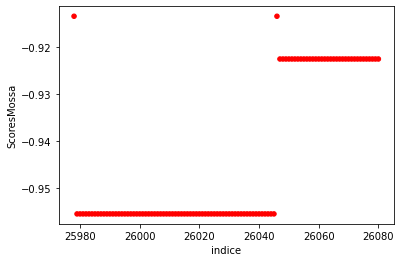

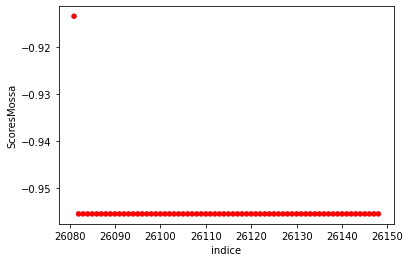

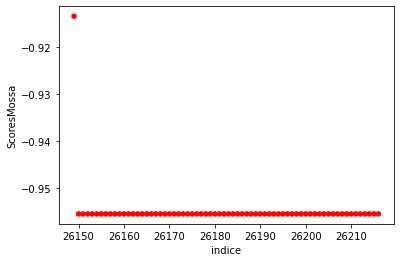

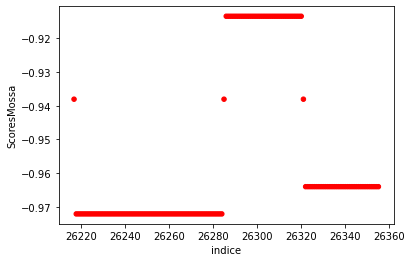

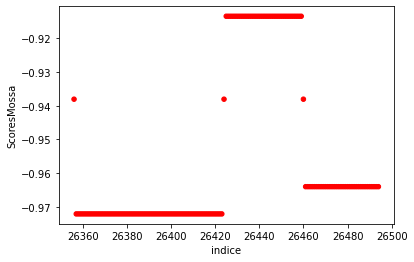

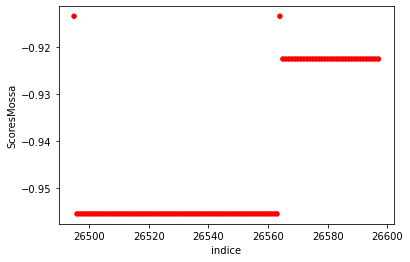

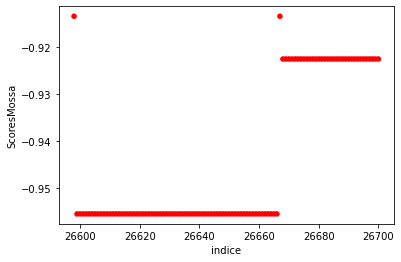

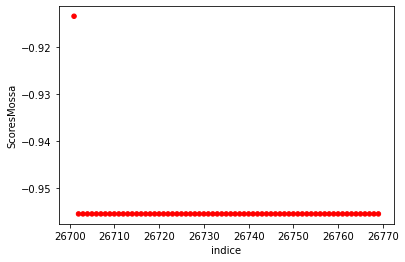

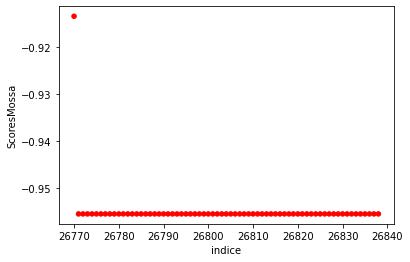

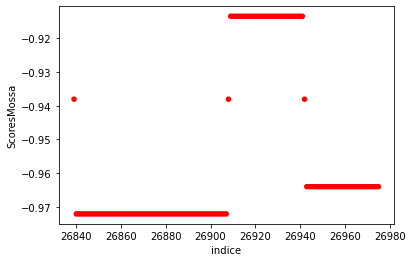

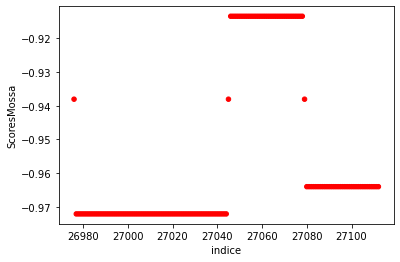

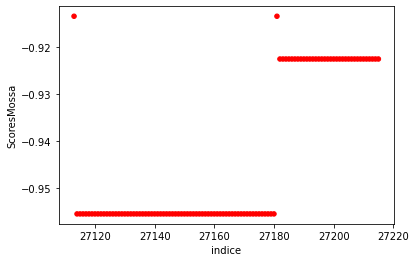

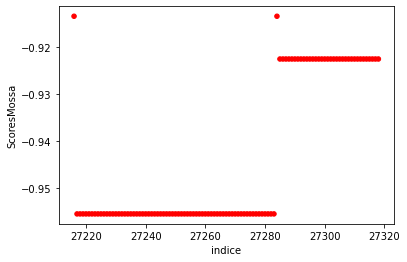

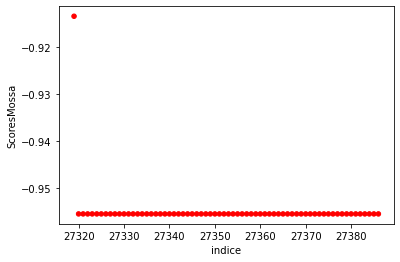

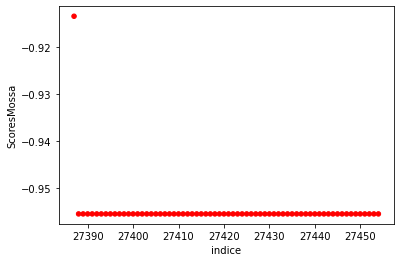

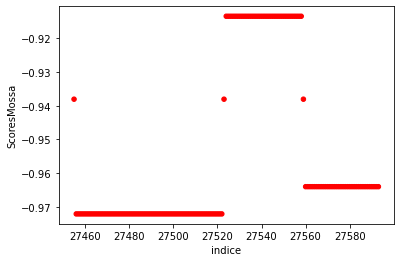

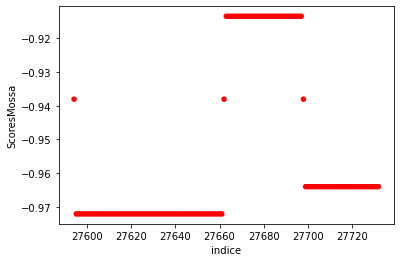

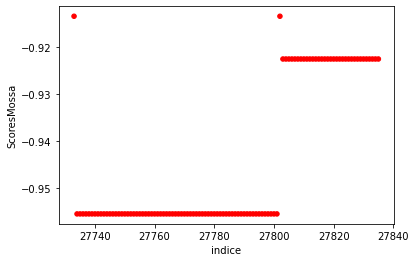

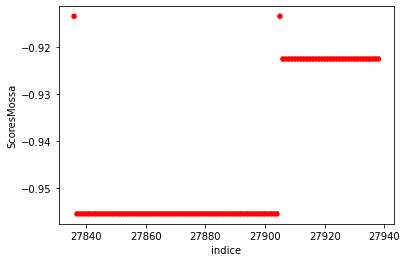

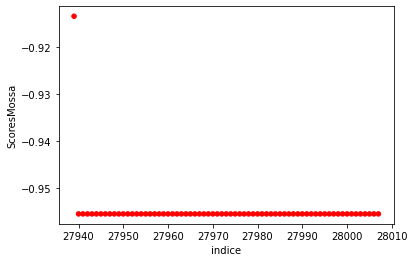

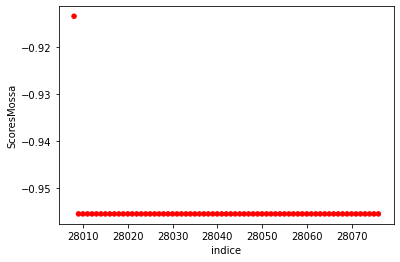

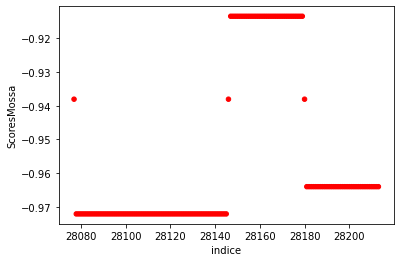

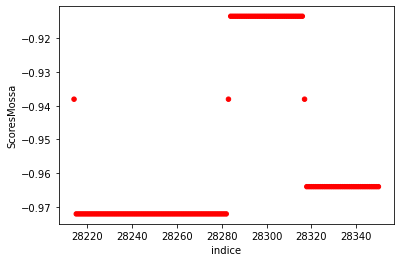

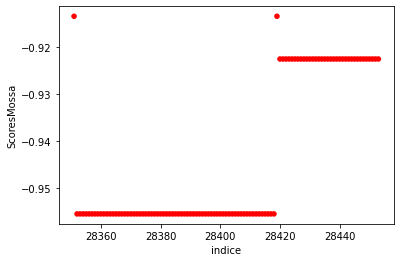

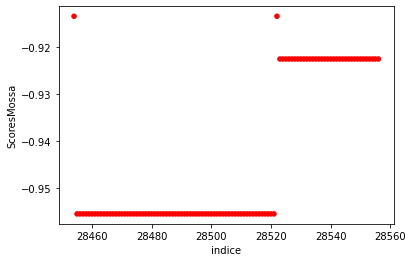

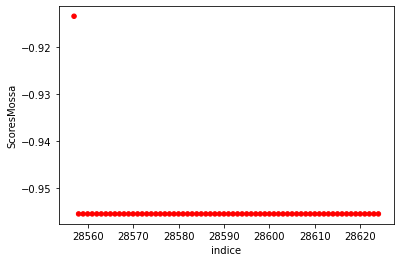

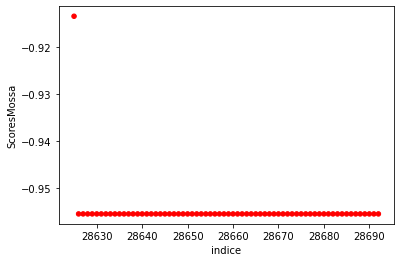

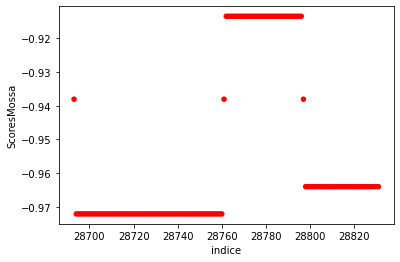

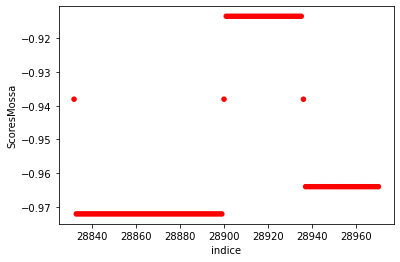

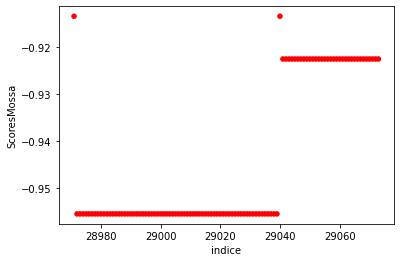

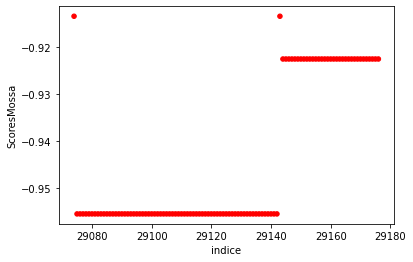

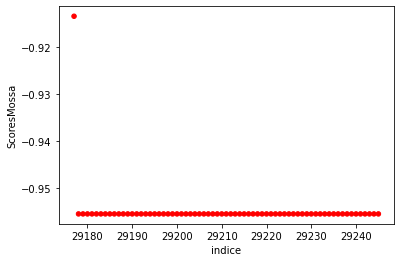

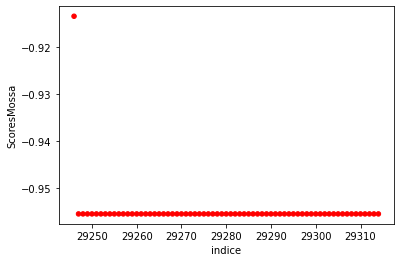

In [104]:
plot=df_long.groupby(['agente','partita','NumeroMossa']).plot.scatter(x='indice',y='ScoresMossa',c='agente',ylim=[-1,1])

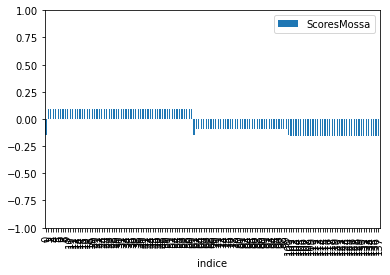

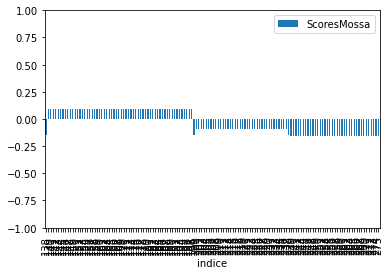

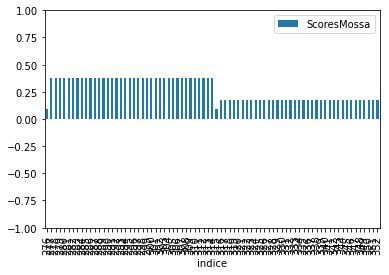

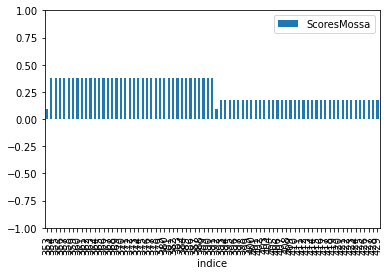

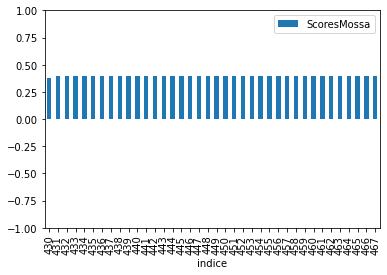

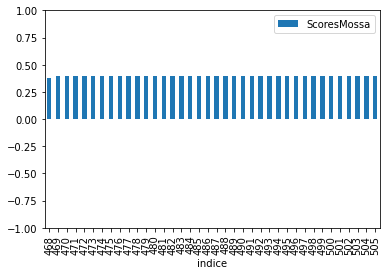

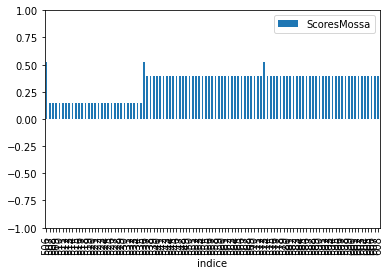

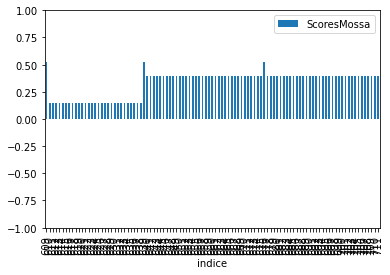

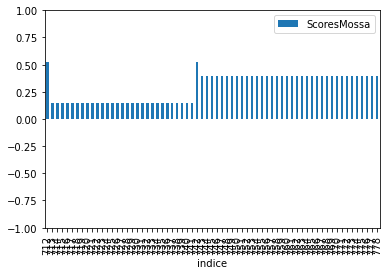

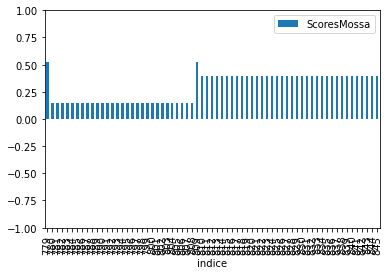

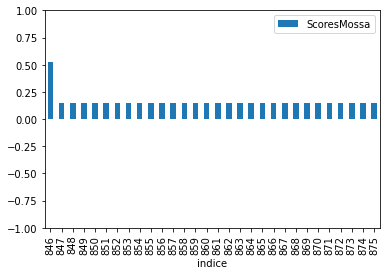

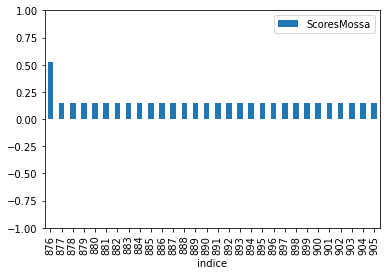

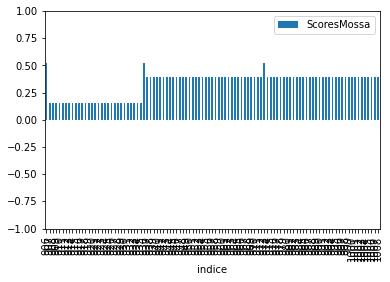

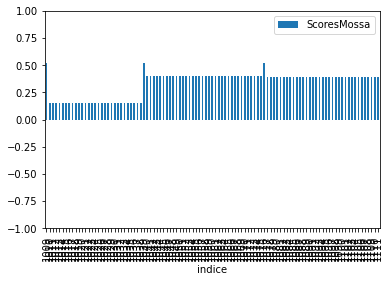

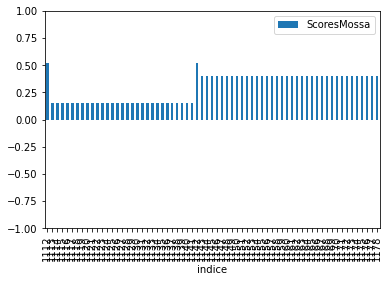

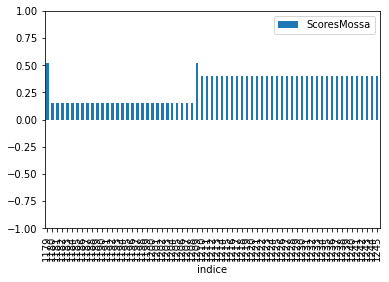

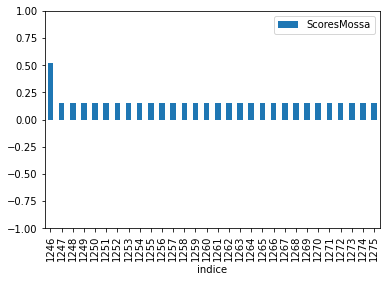

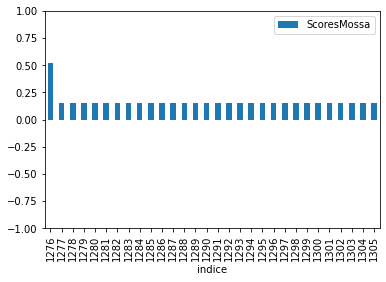

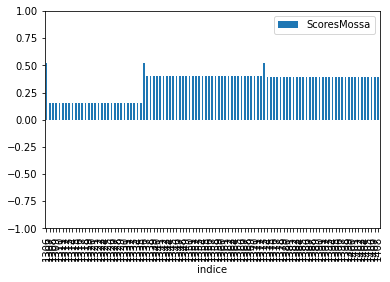

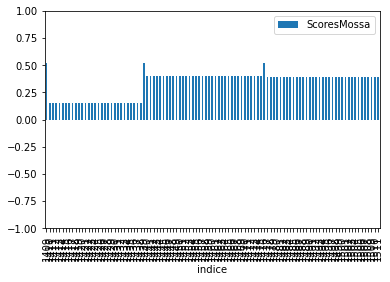

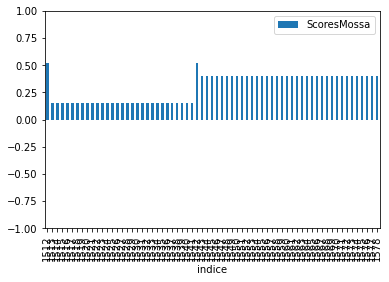

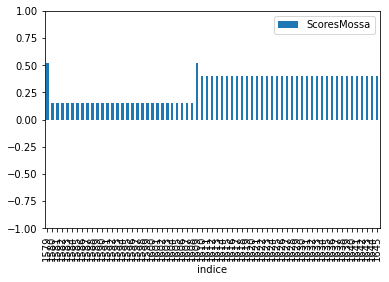

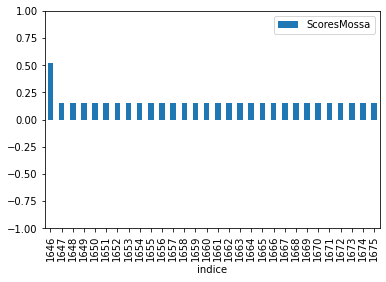

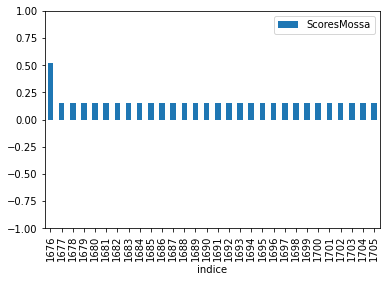

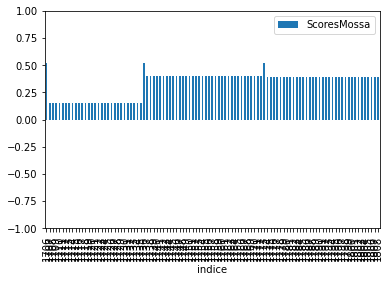

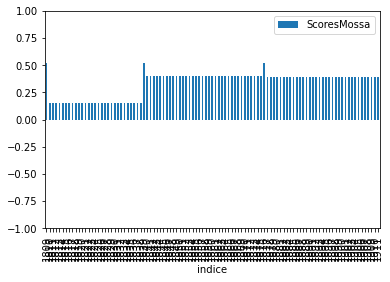

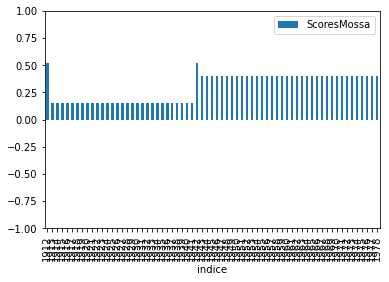

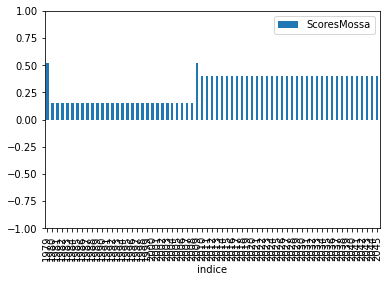

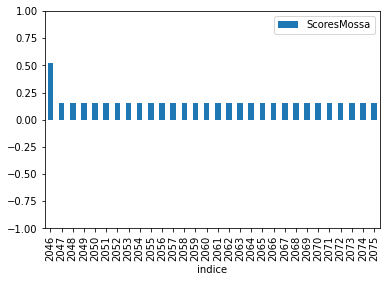

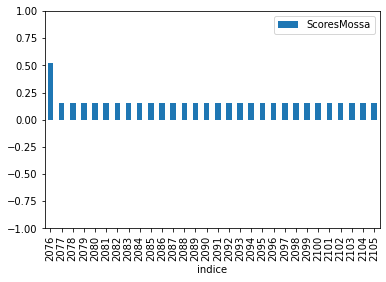

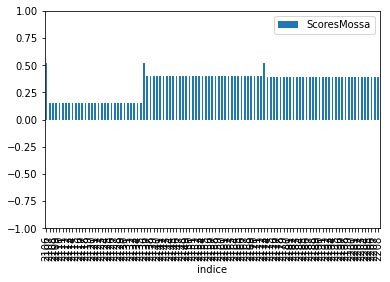

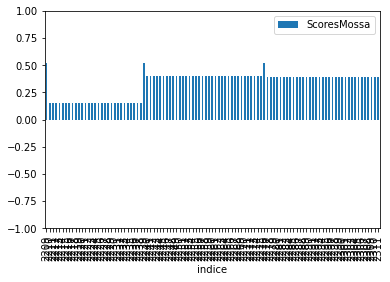

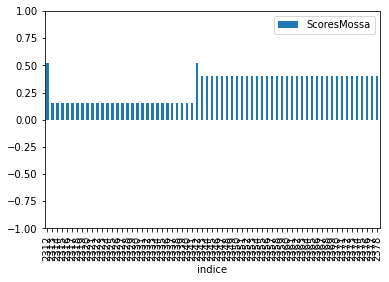

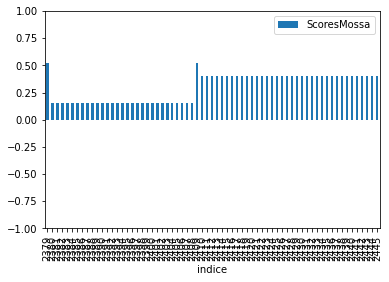

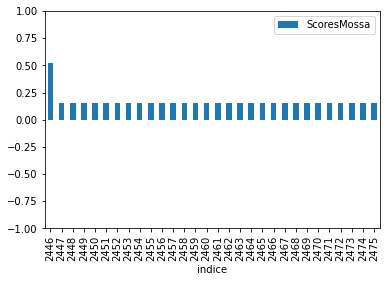

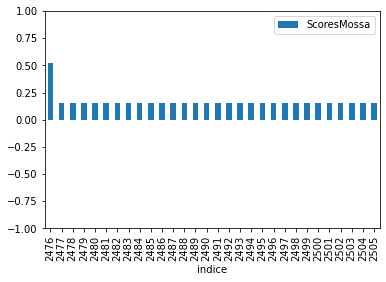

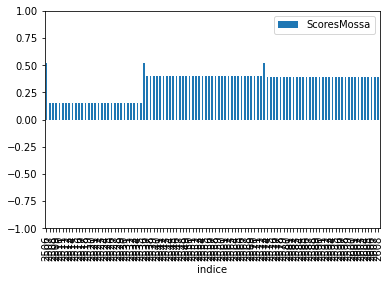

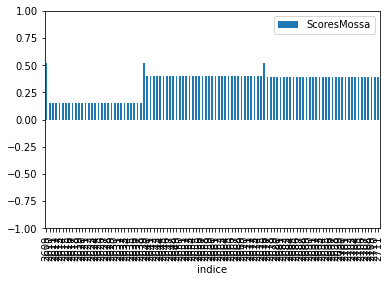

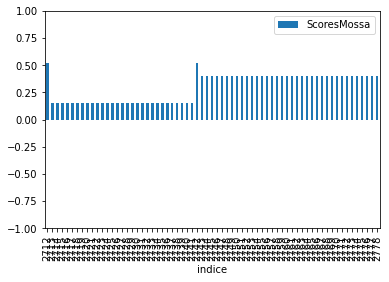

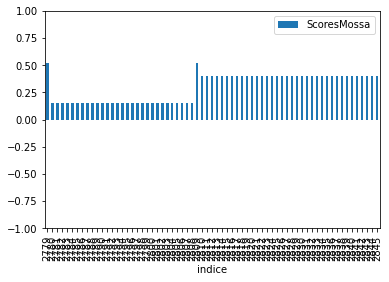

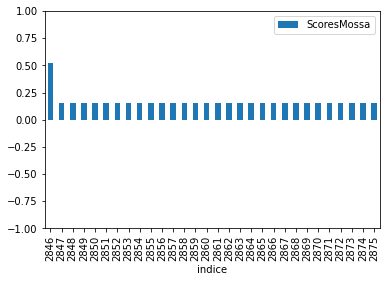

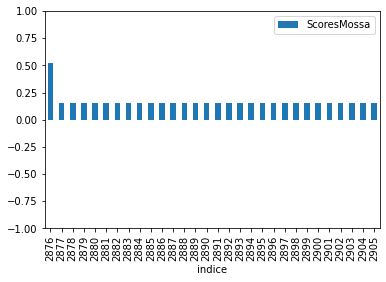

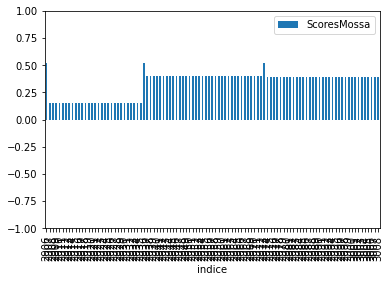

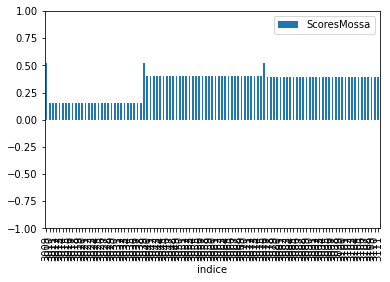

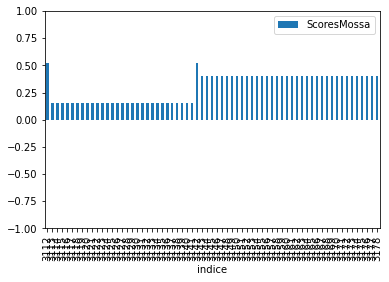

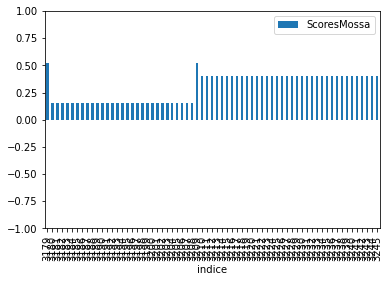

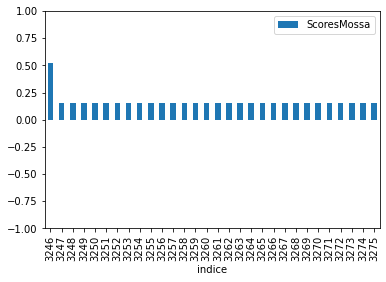

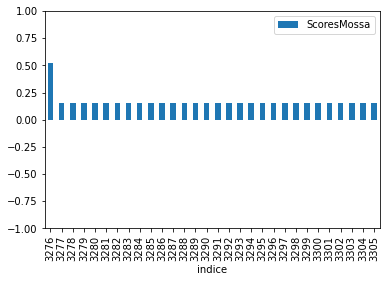

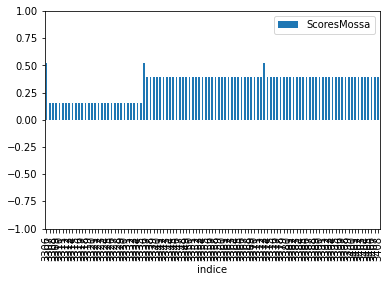

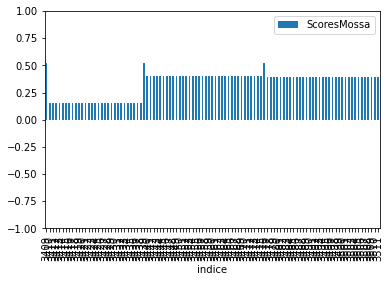

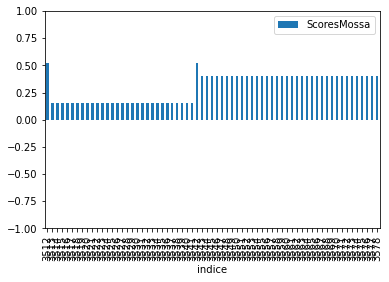

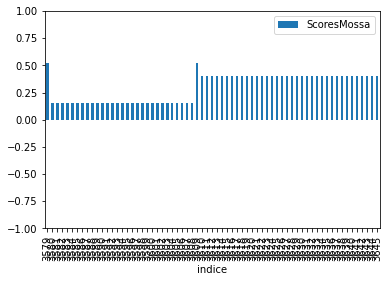

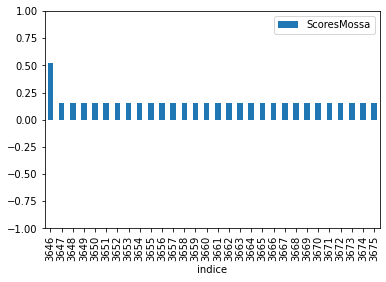

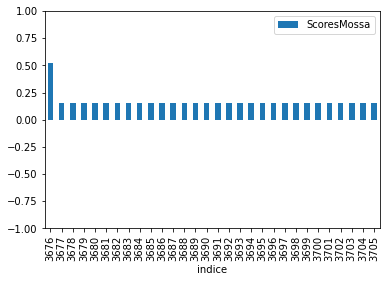

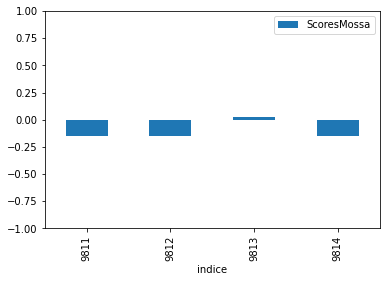

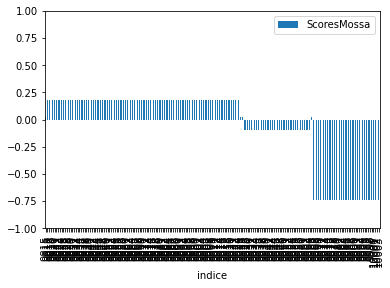

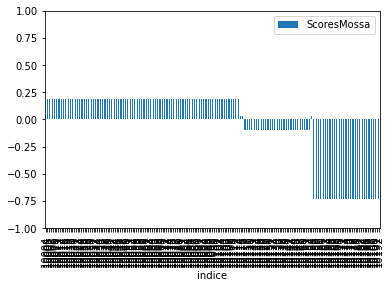

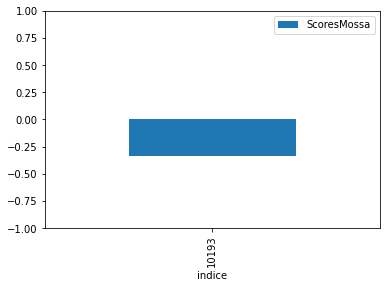

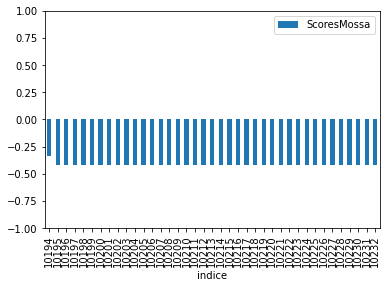

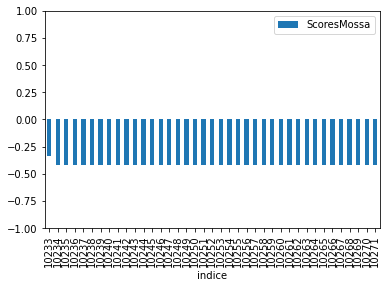

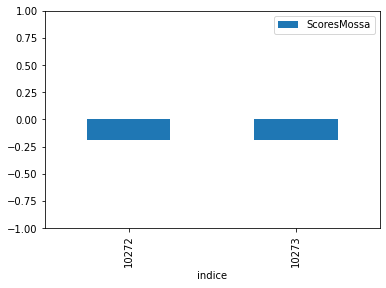

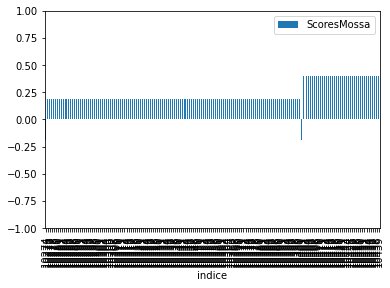

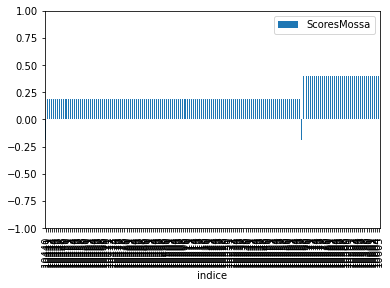

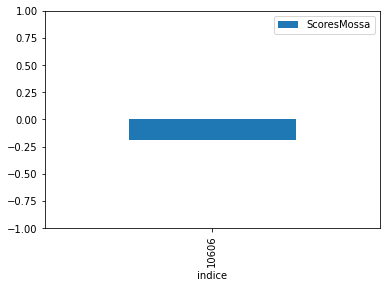

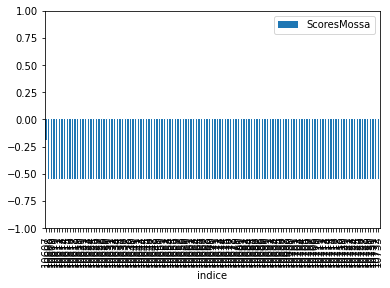

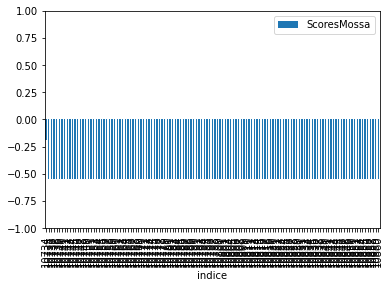

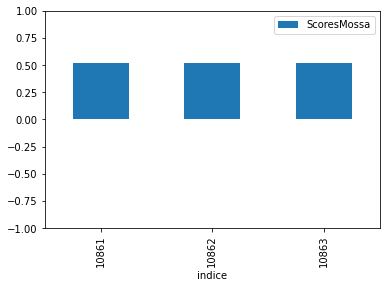

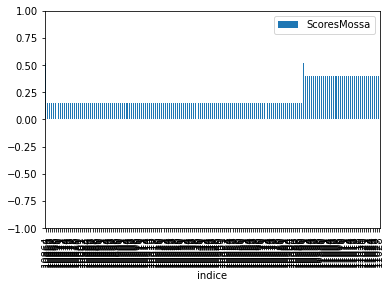

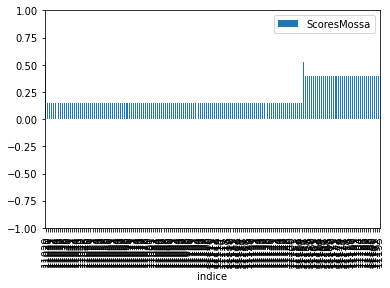

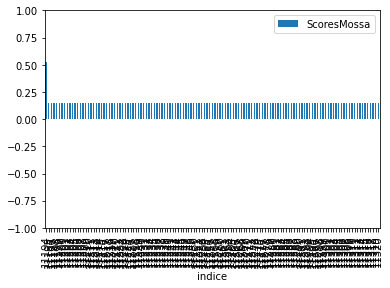

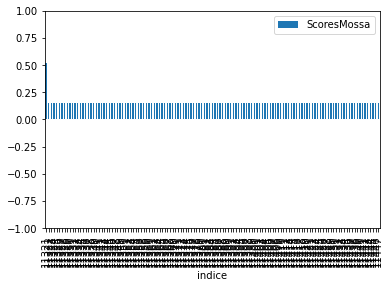

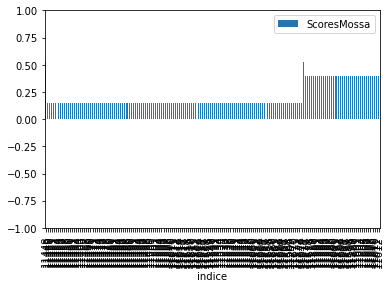

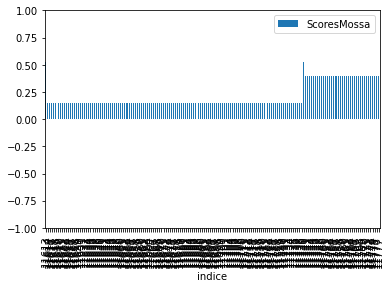

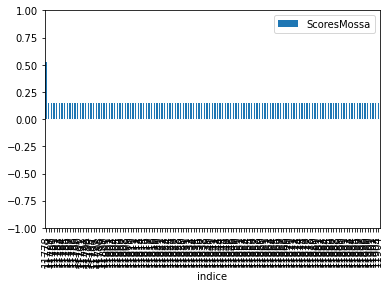

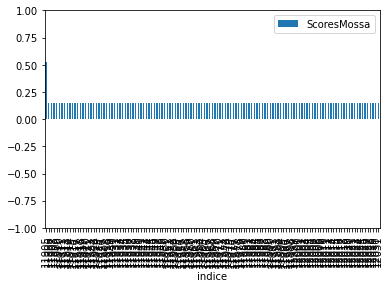

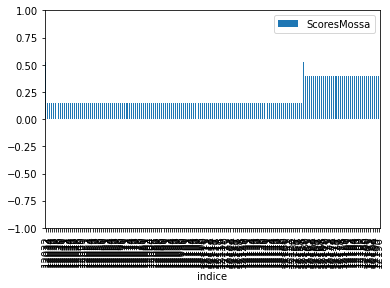

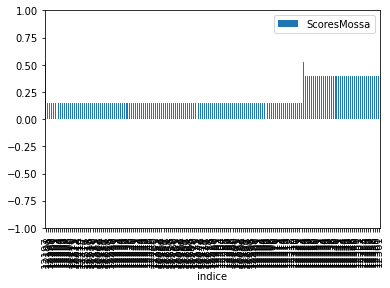

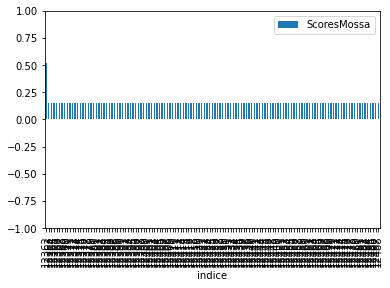

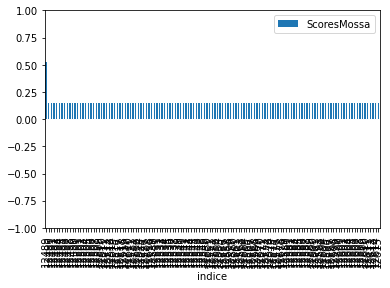

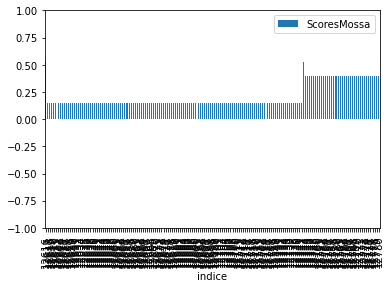

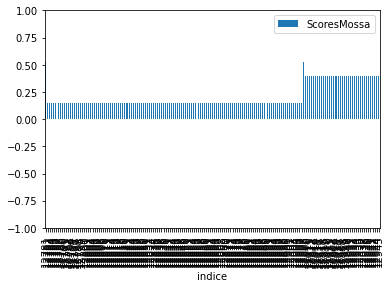

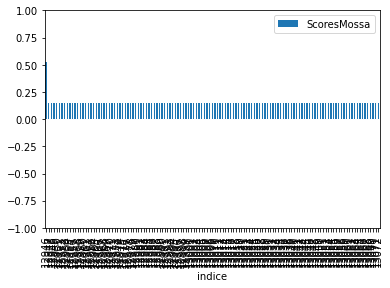

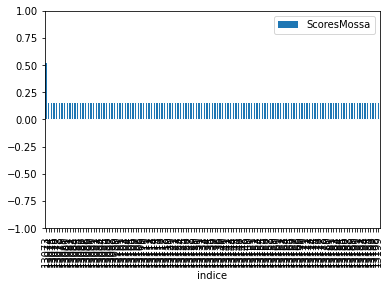

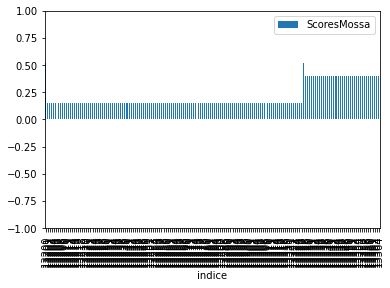

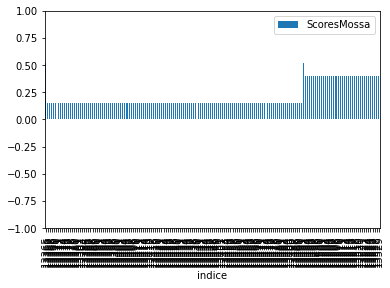

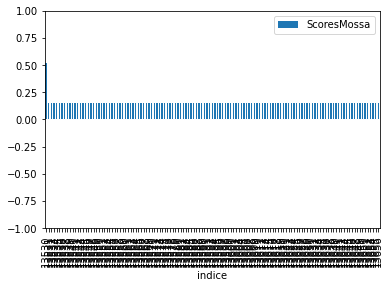

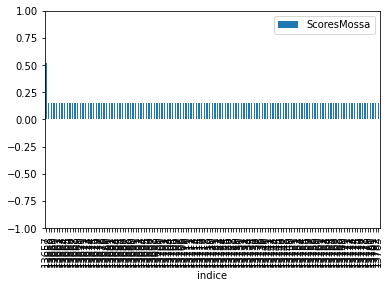

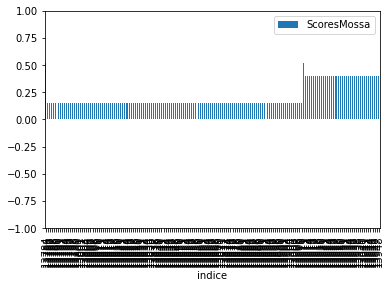

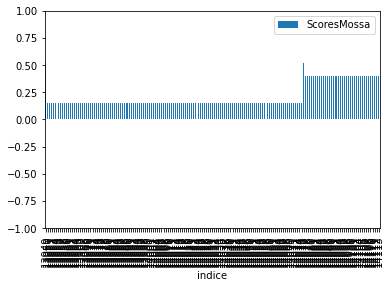

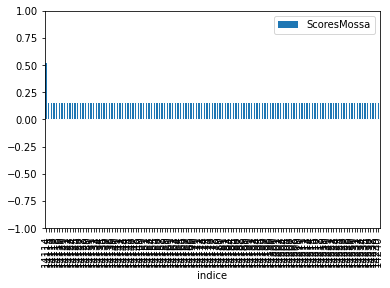

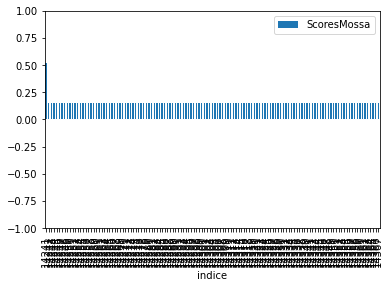

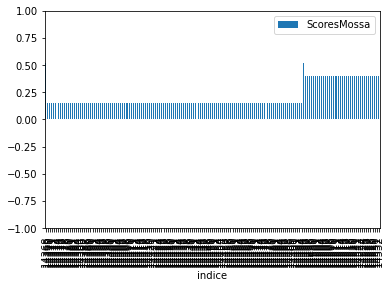

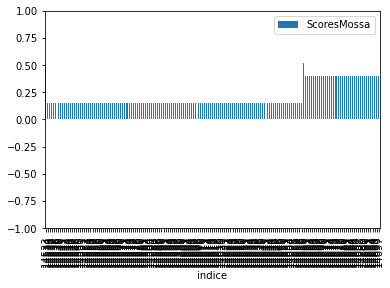

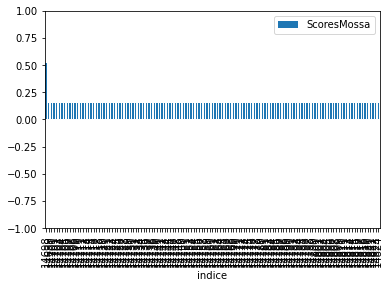

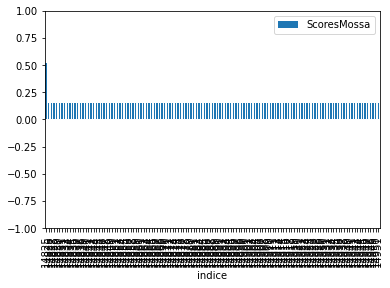

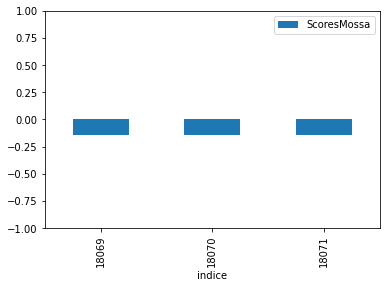

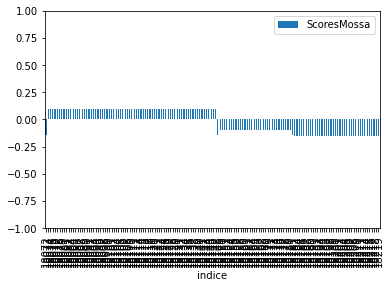

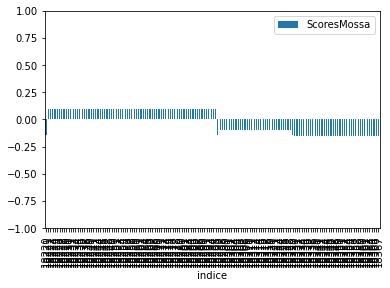

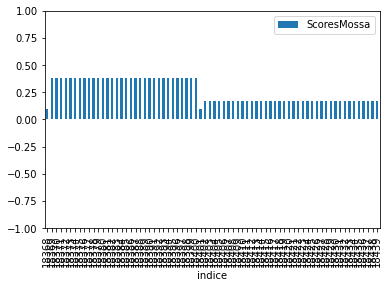

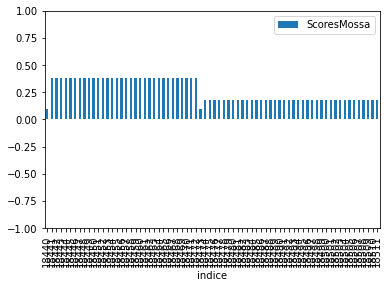

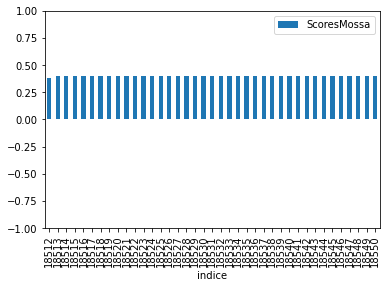

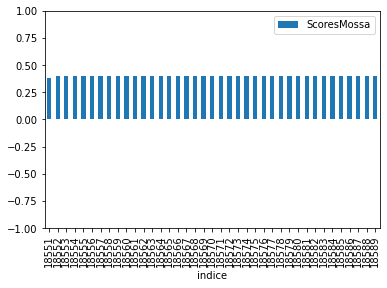

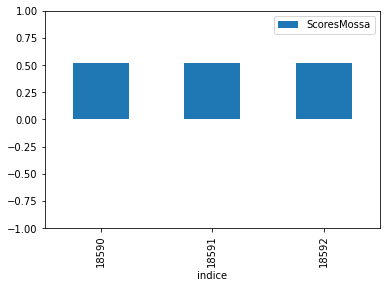

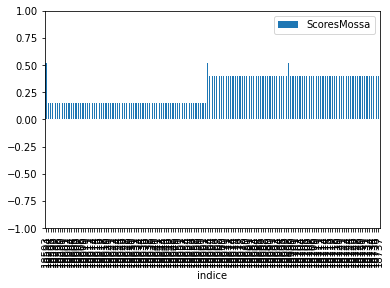

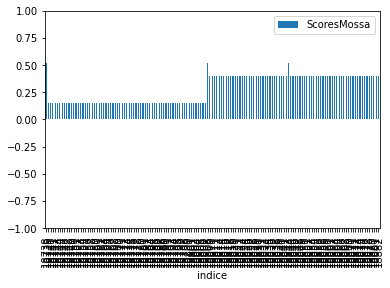

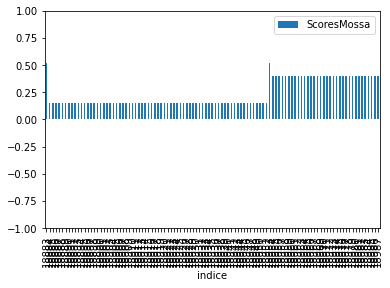

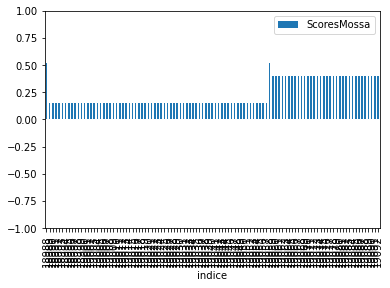

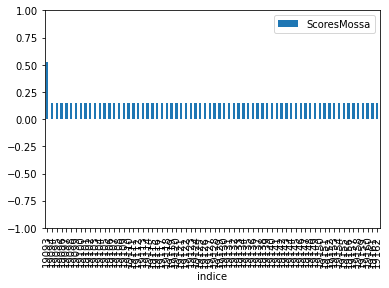

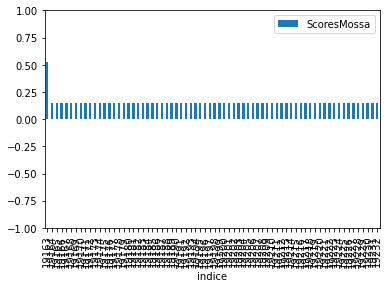

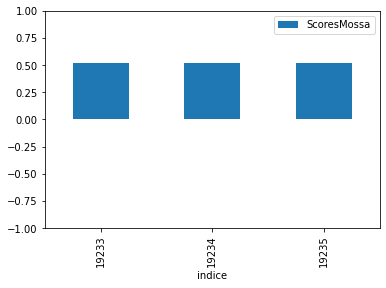

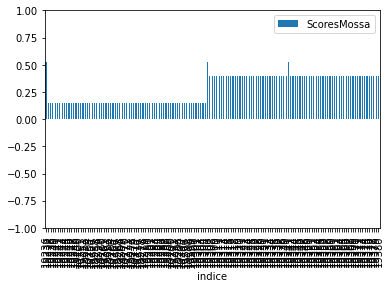

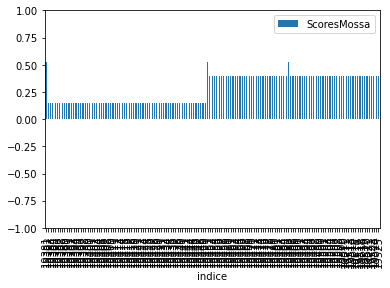

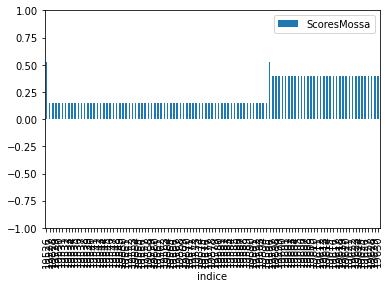

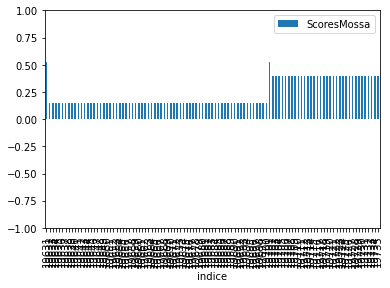

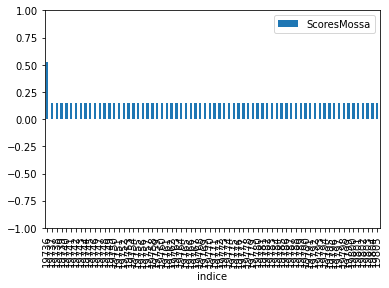

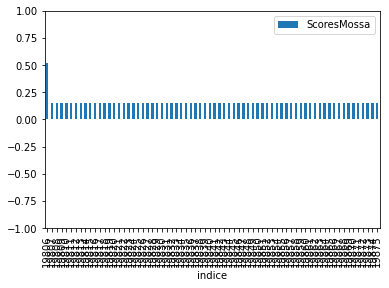

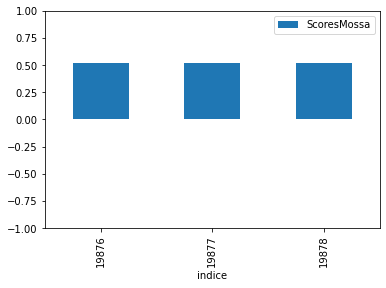

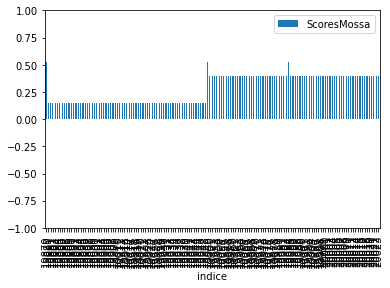

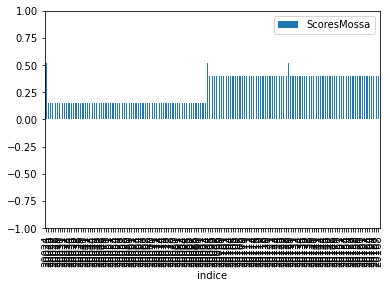

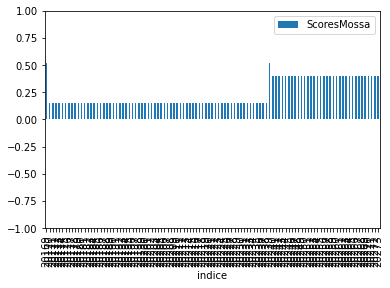

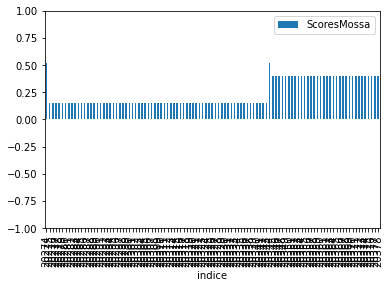

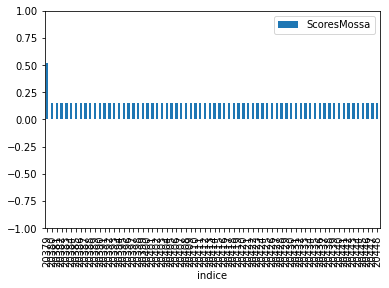

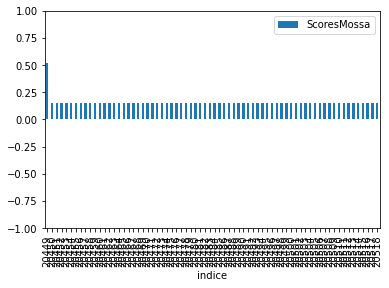

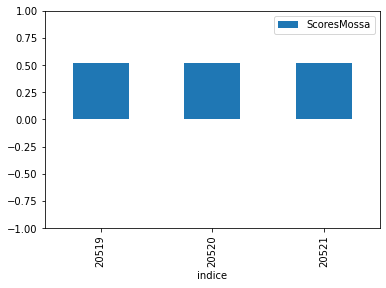

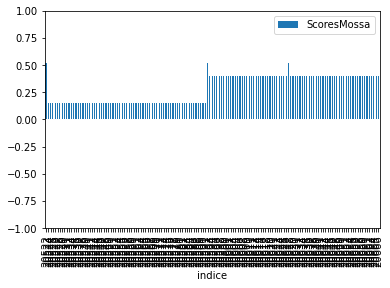

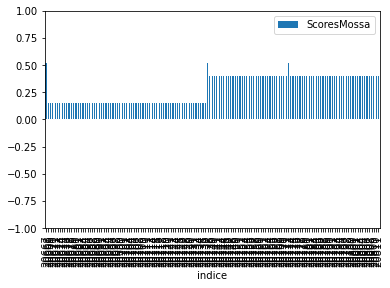

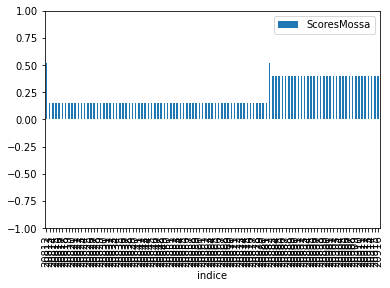

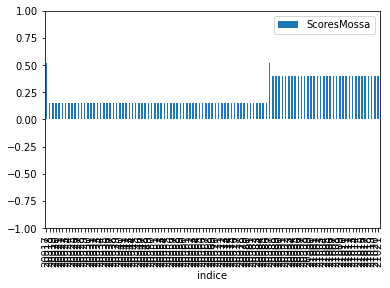

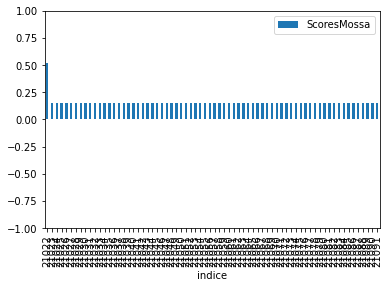

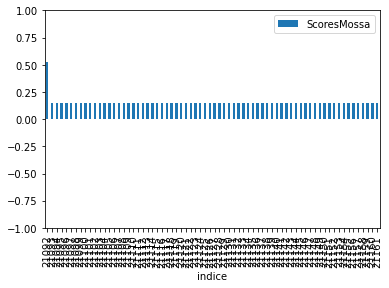

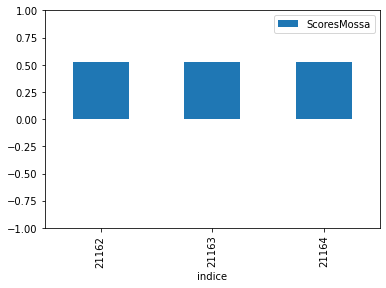

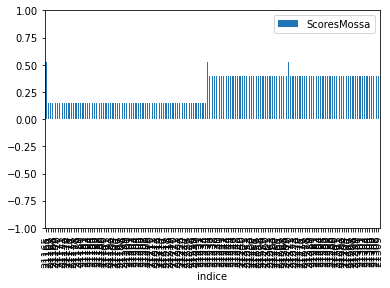

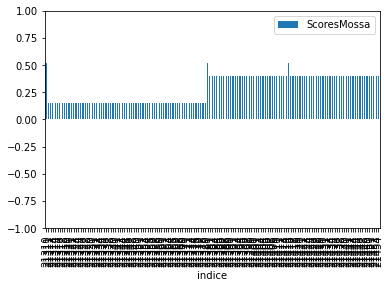

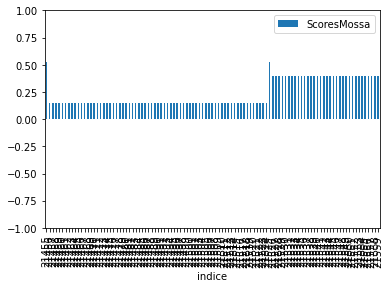

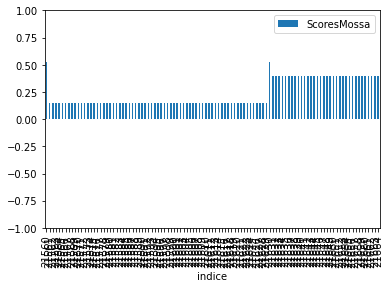

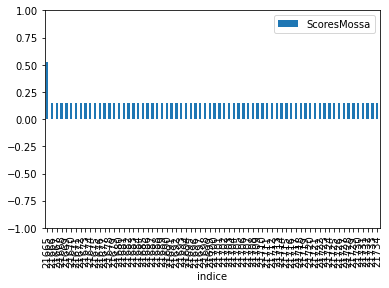

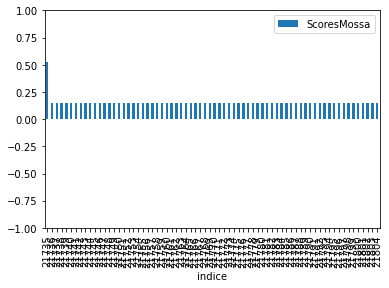

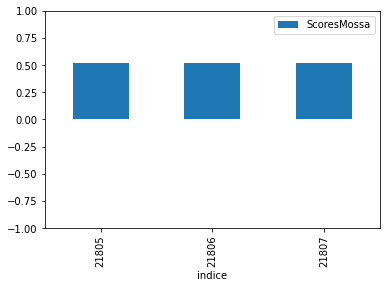

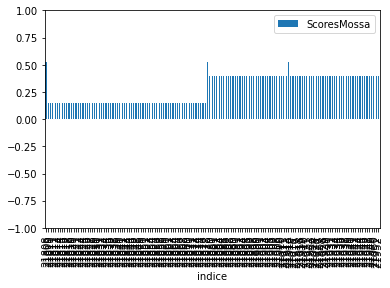

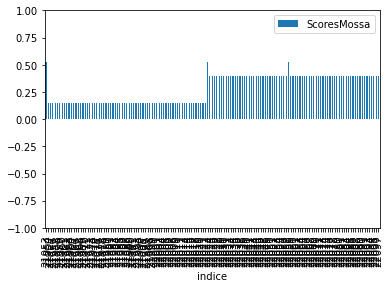

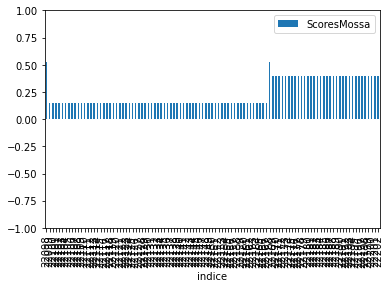

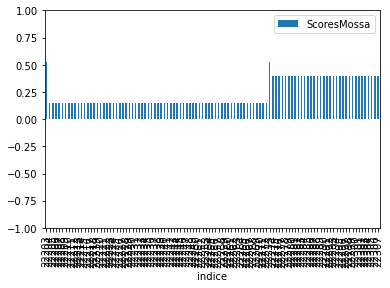

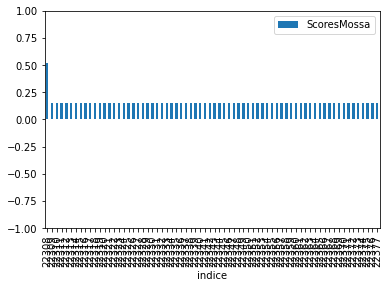

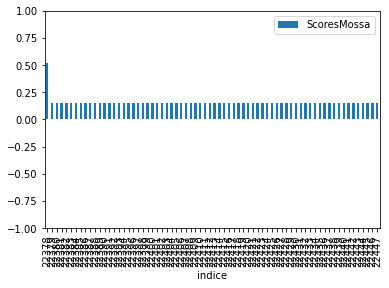

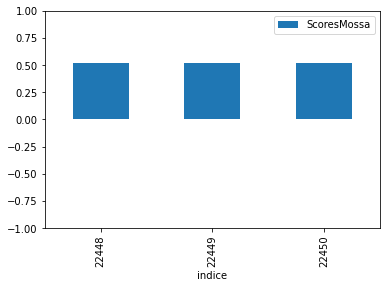

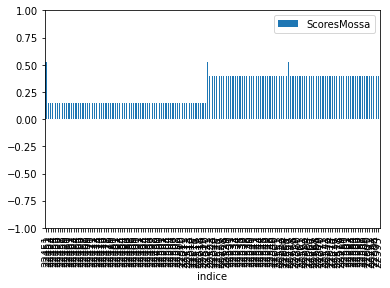

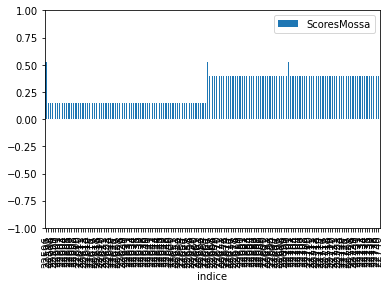

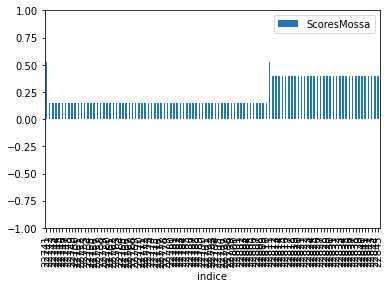

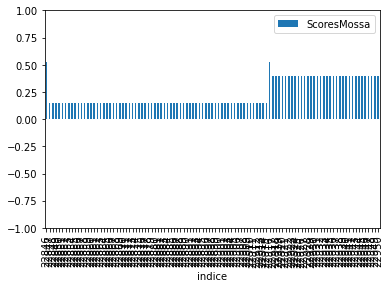

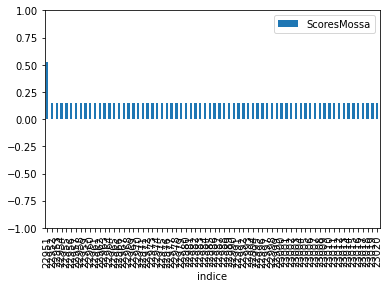

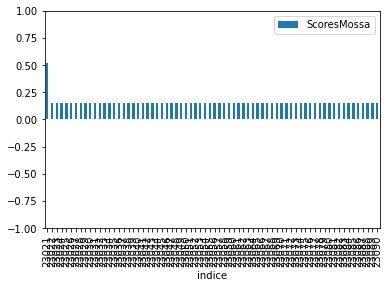

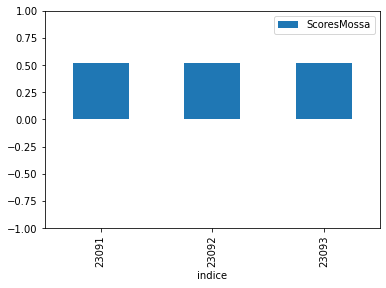

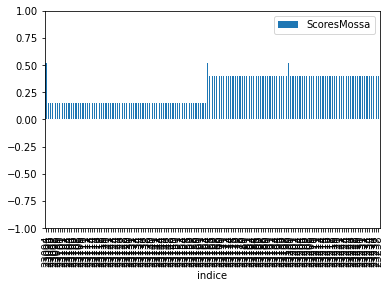

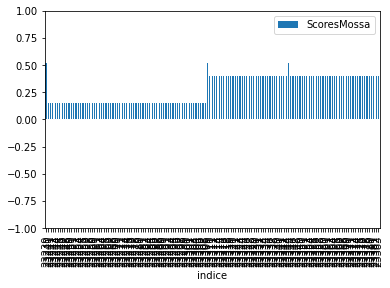

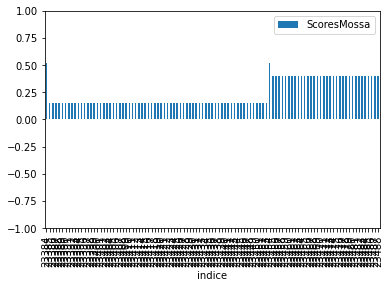

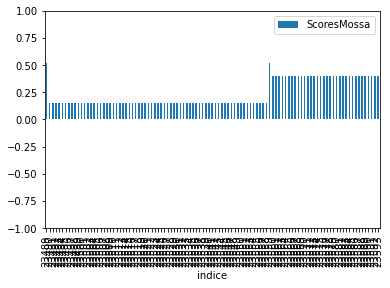

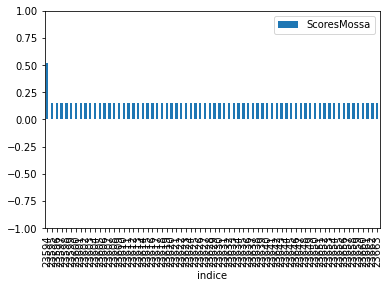

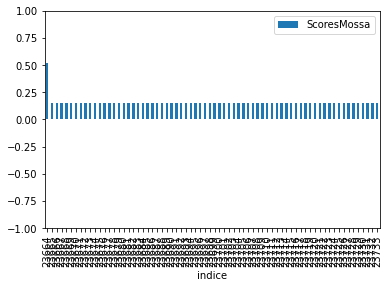

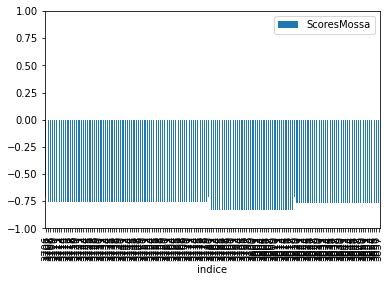

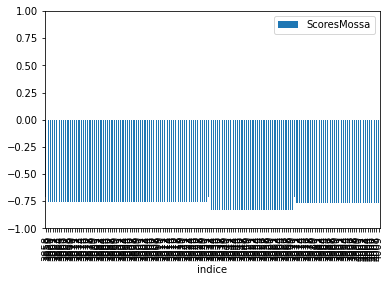

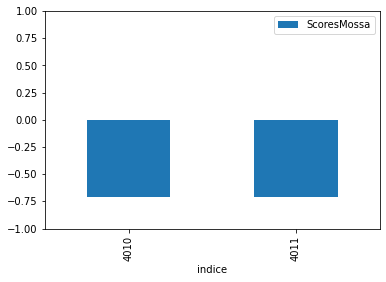

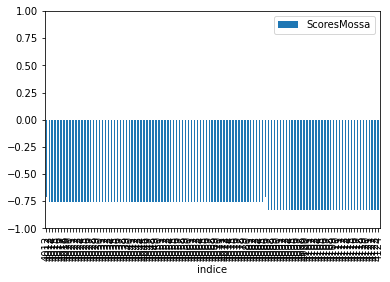

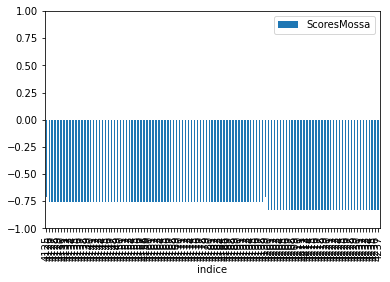

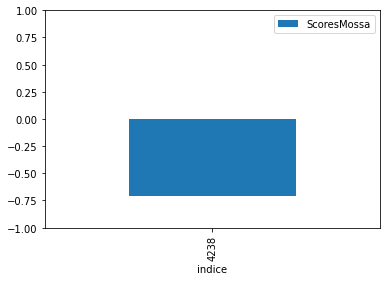

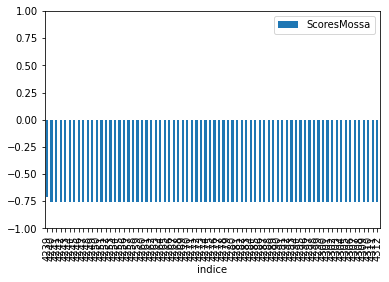

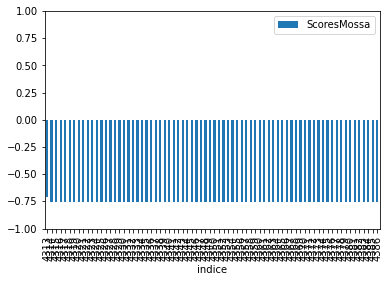

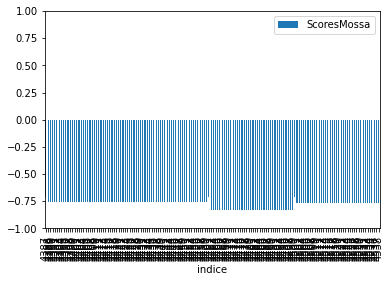

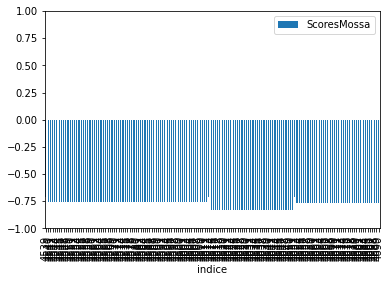

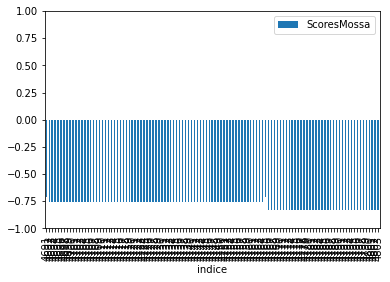

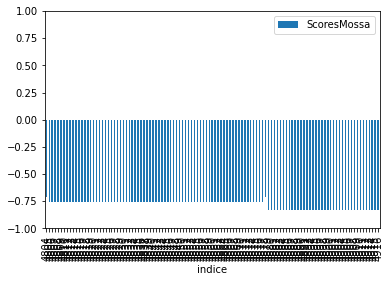

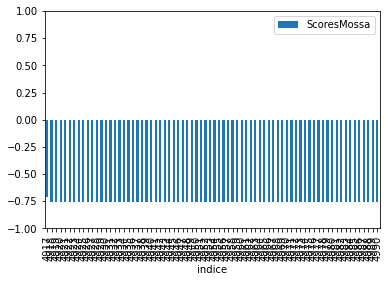

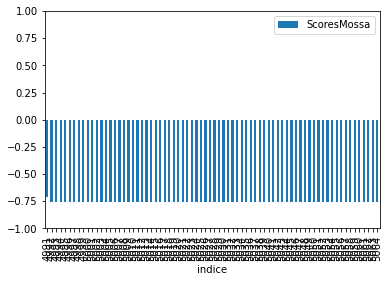

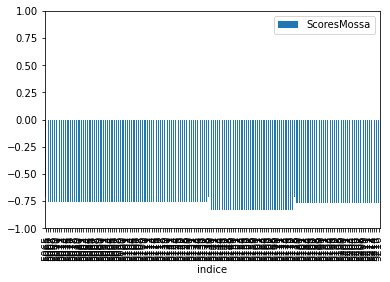

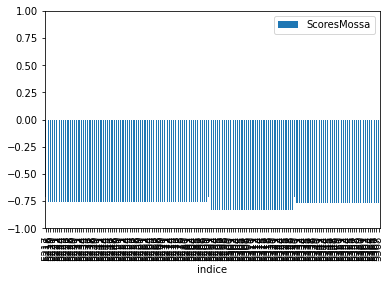

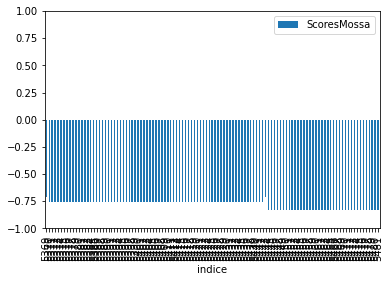

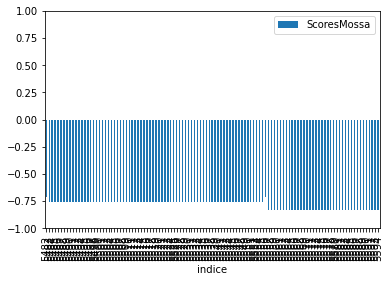

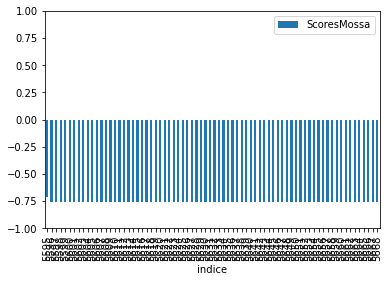

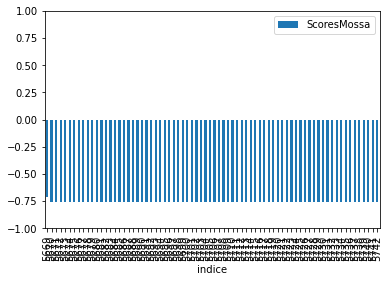

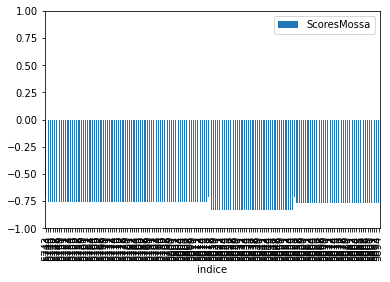

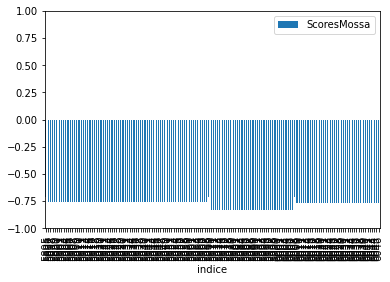

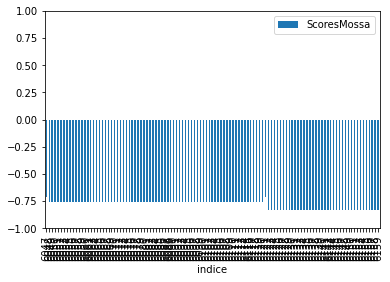

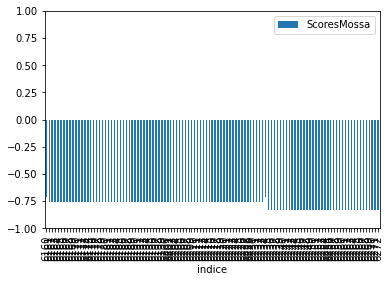

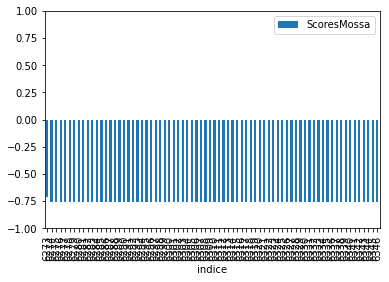

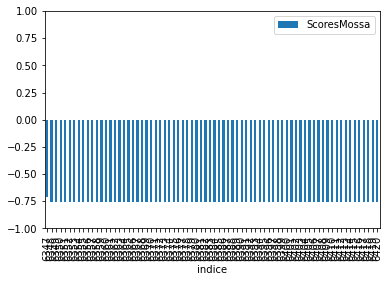

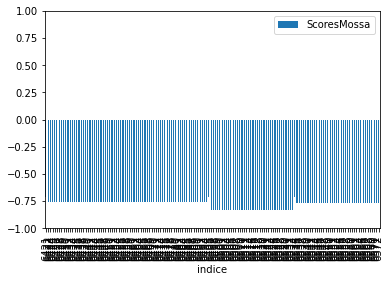

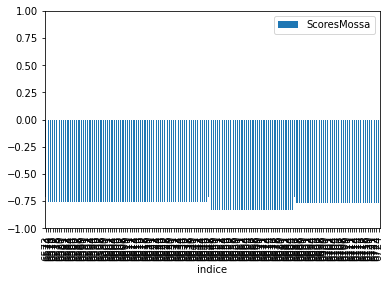

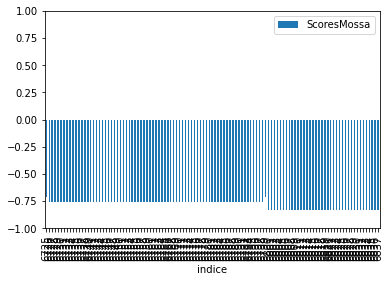

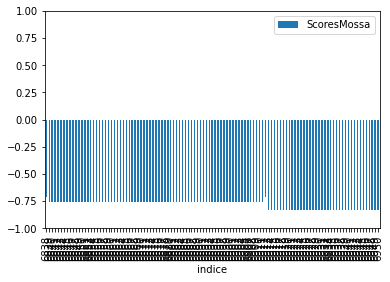

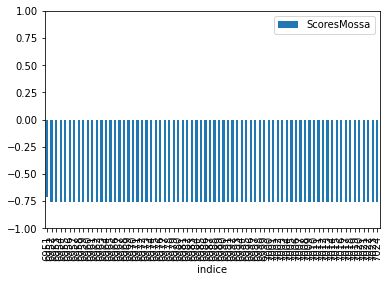

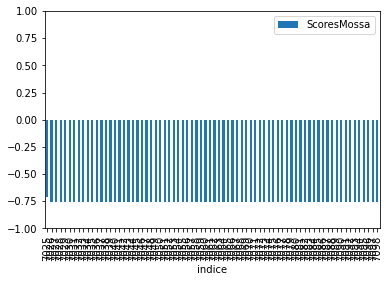

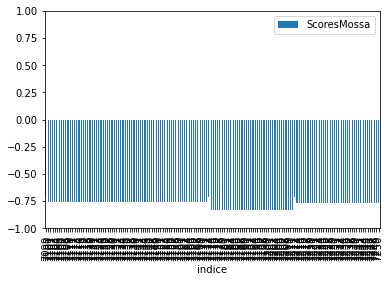

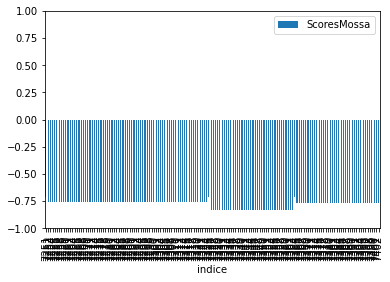

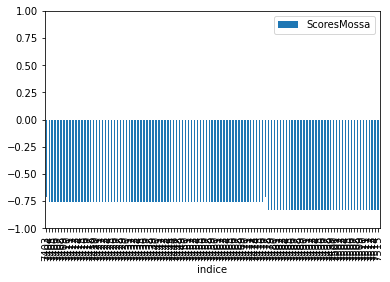

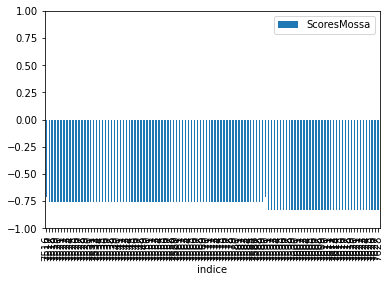

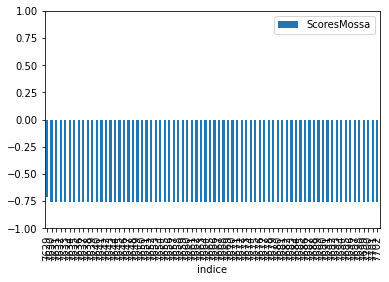

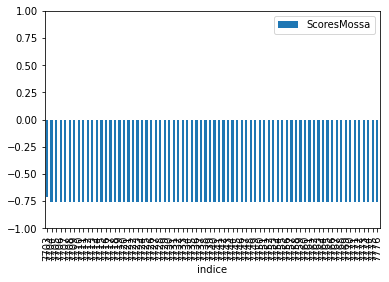

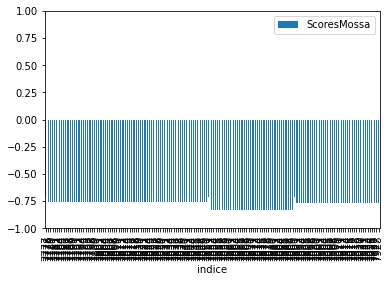

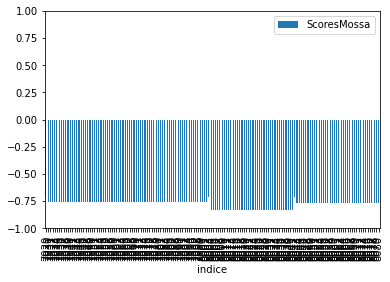

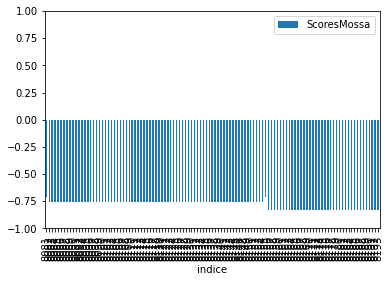

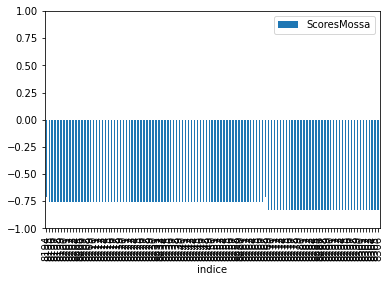

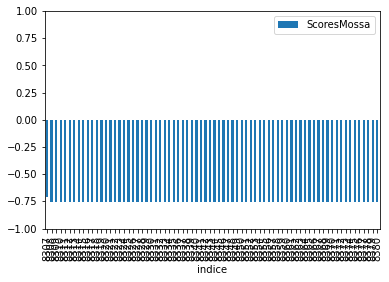

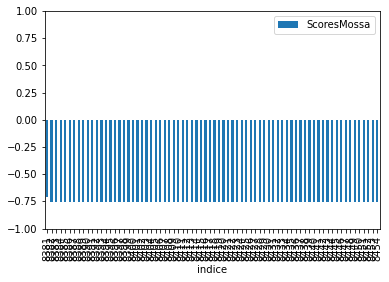

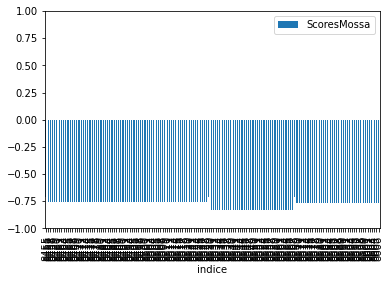

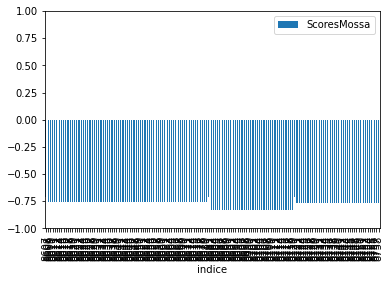

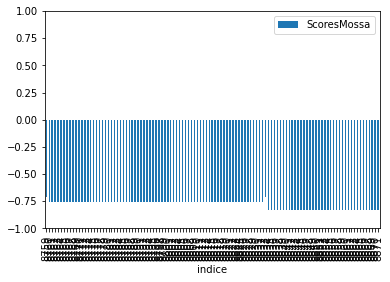

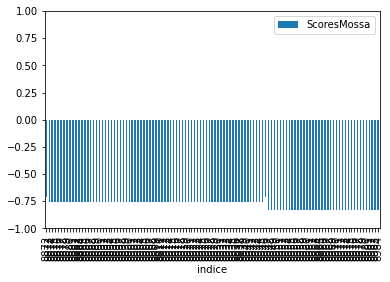

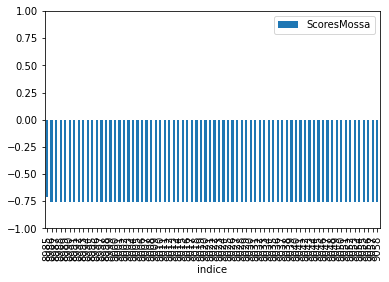

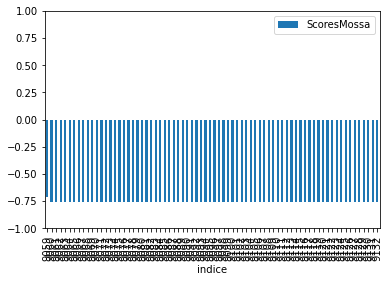

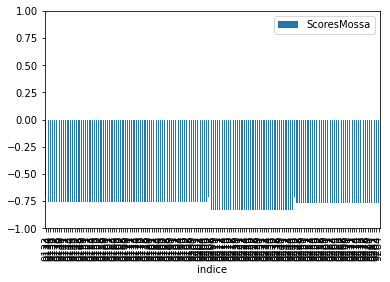

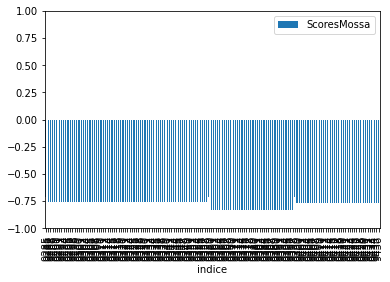

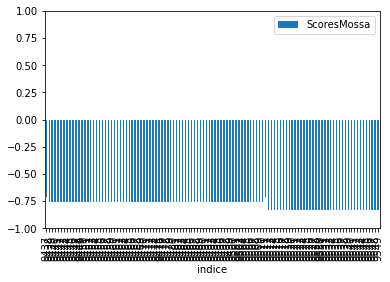

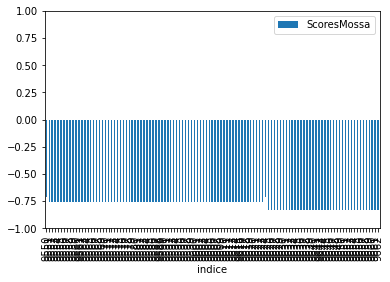

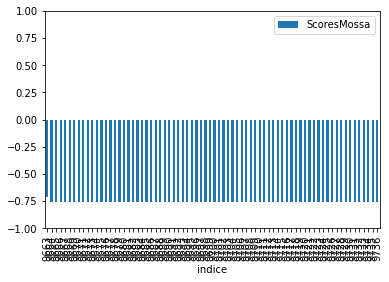

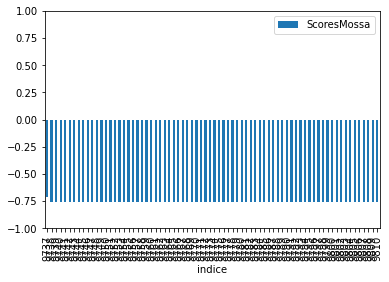

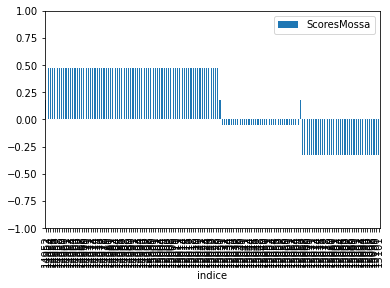

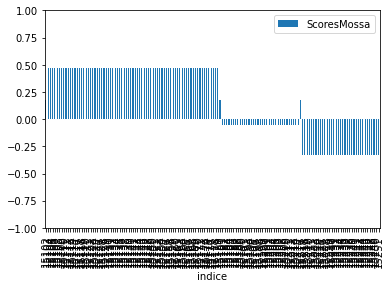

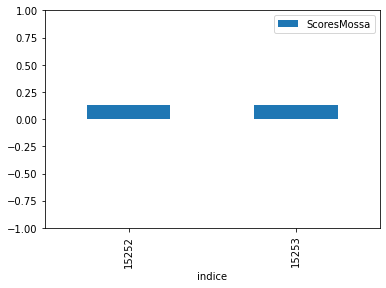

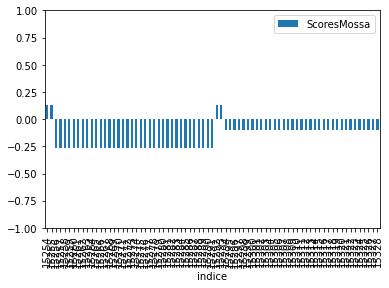

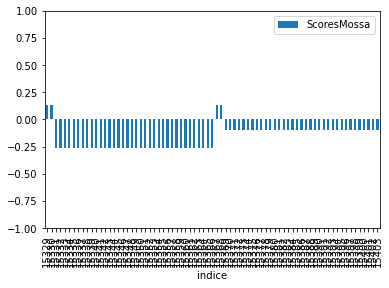

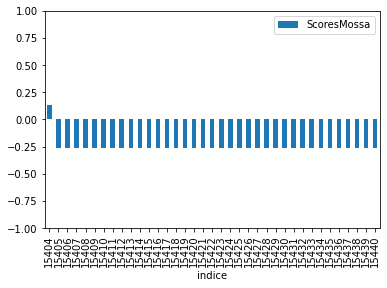

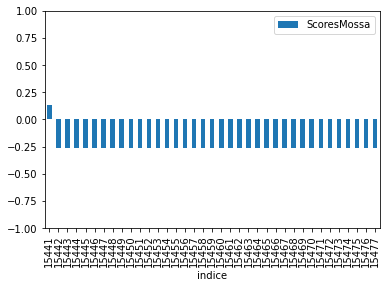

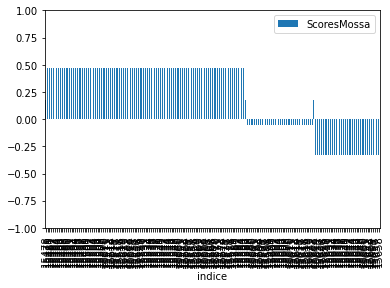

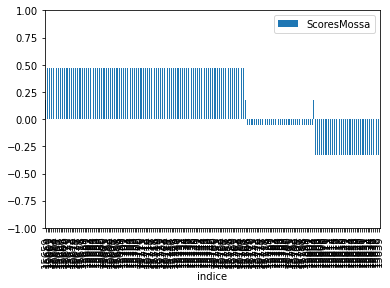

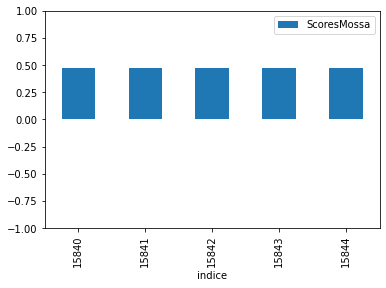

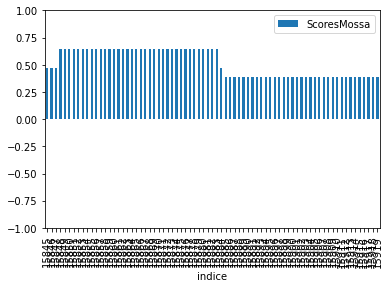

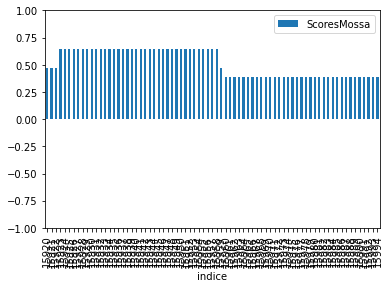

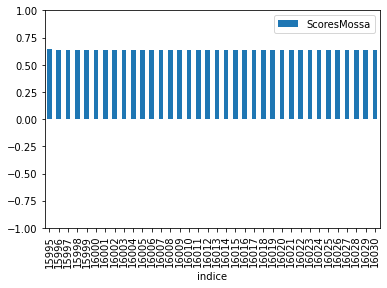

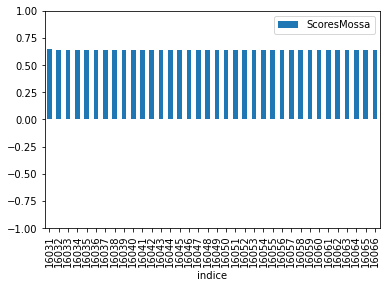

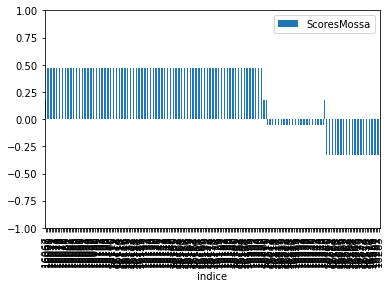

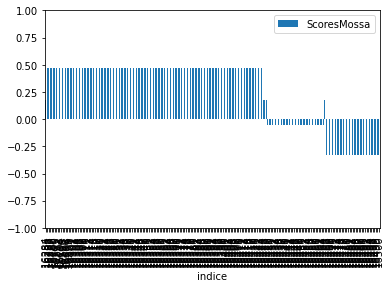

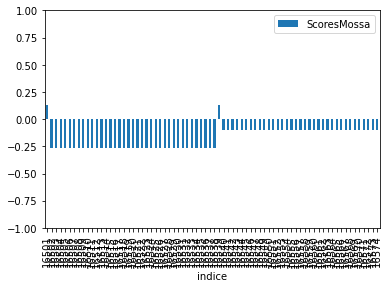

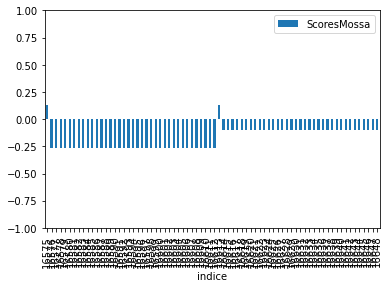

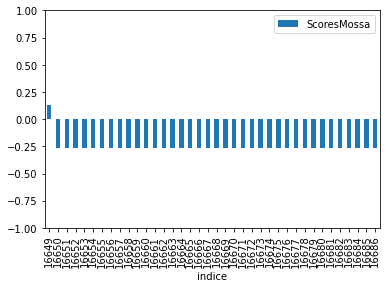

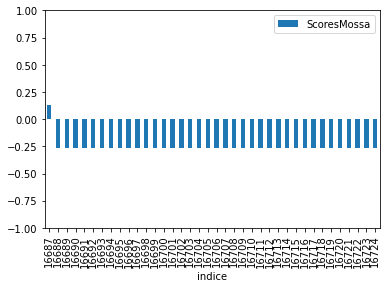

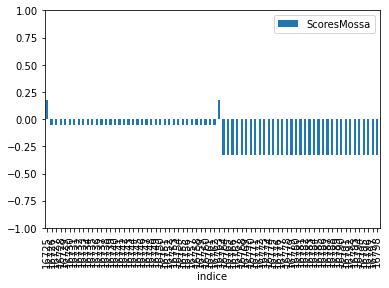

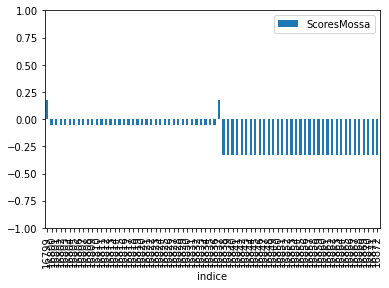

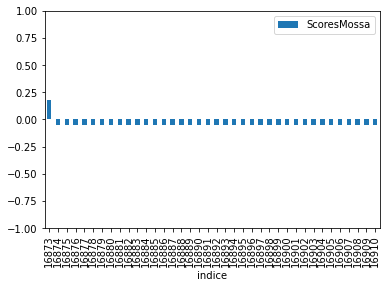

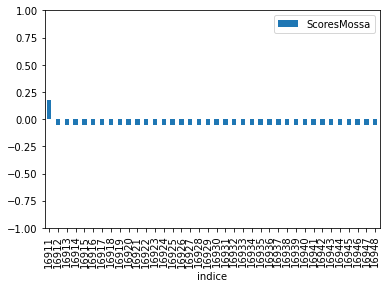

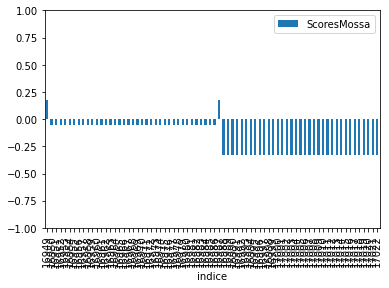

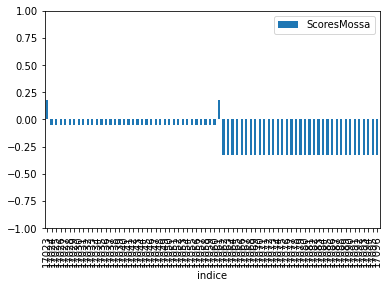

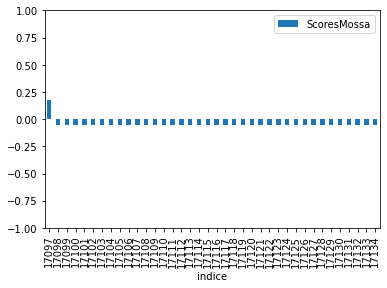

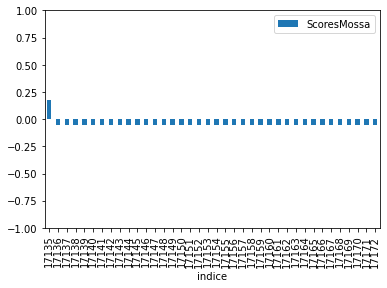

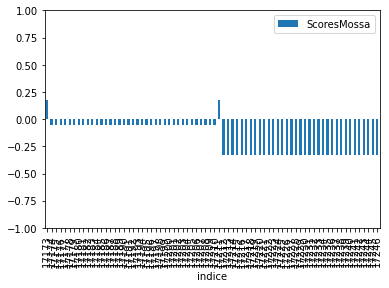

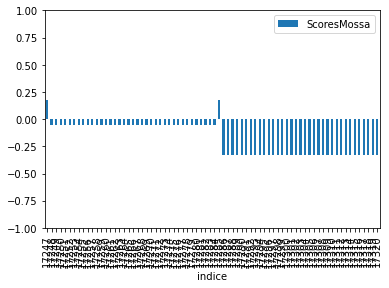

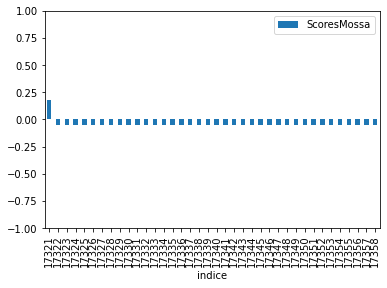

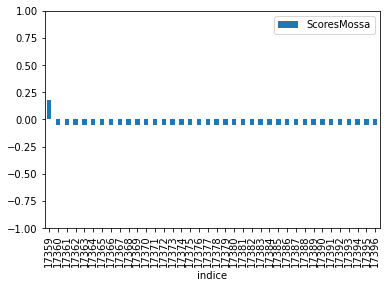

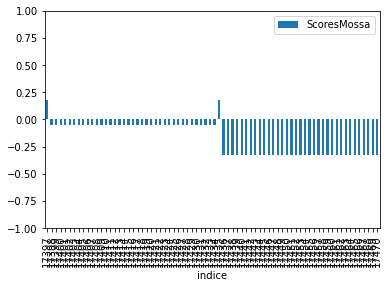

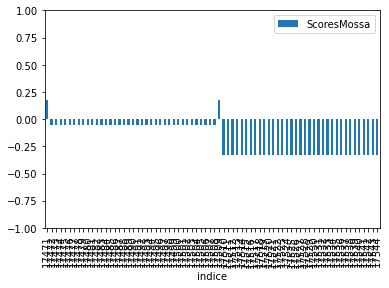

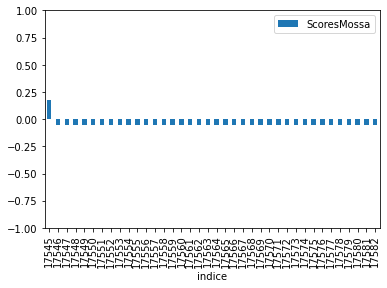

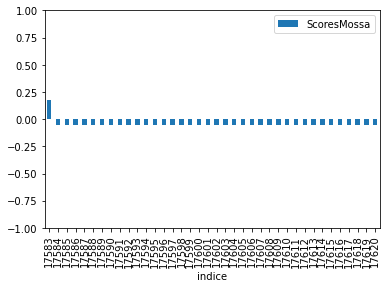

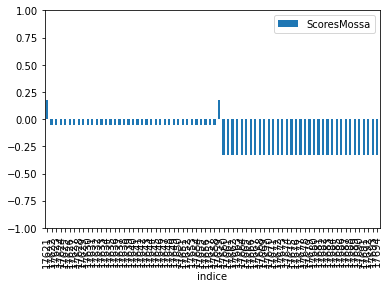

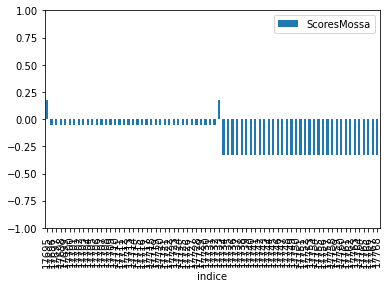

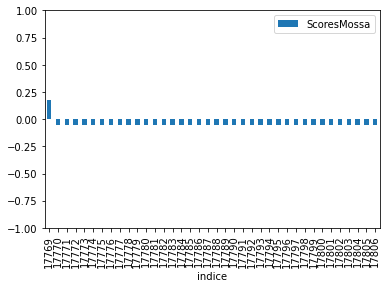

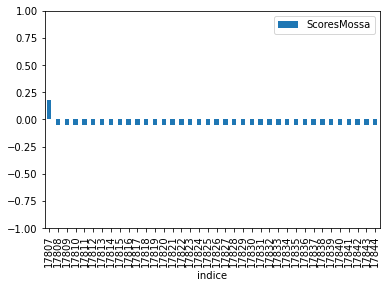

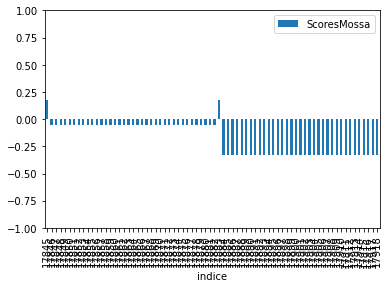

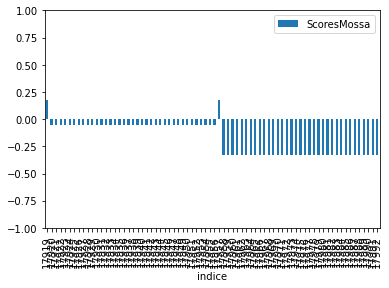

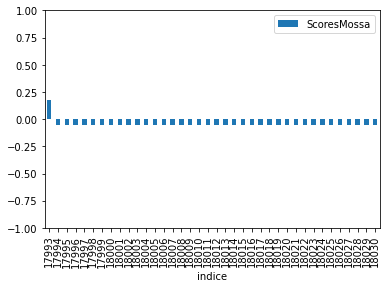

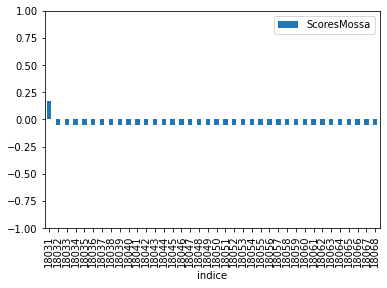

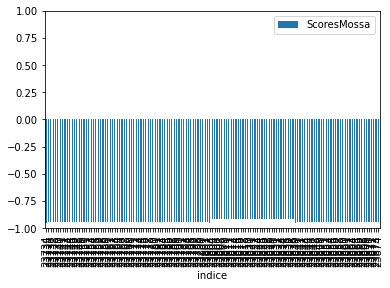

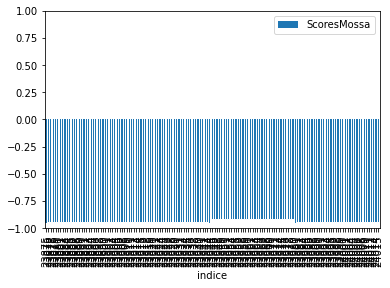

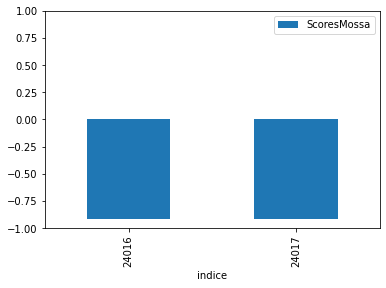

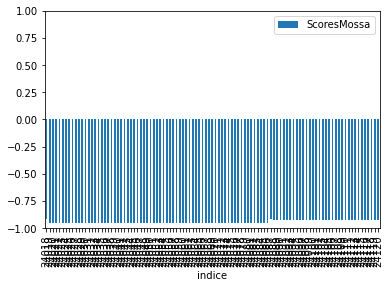

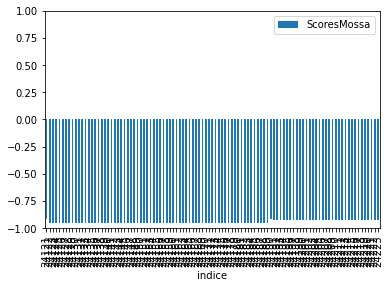

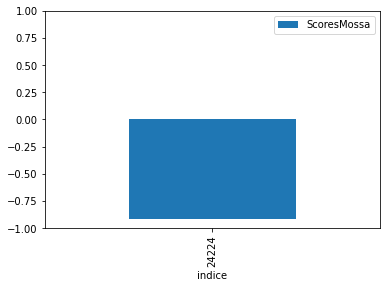

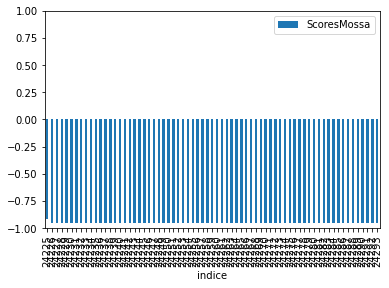

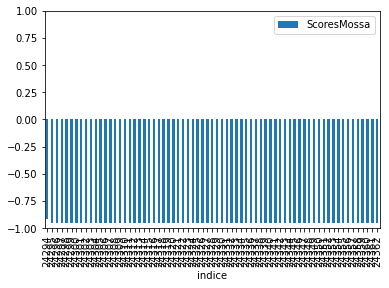

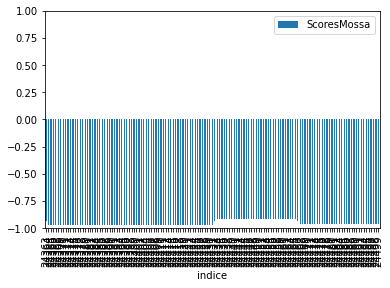

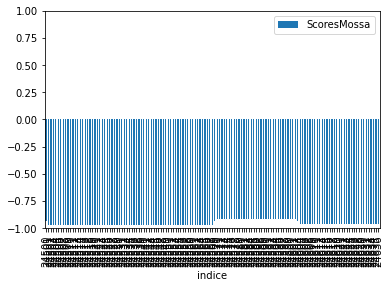

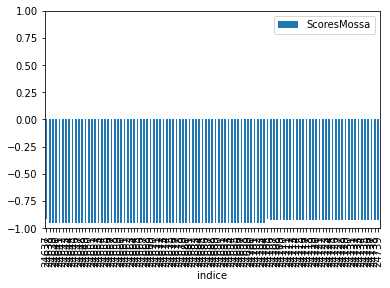

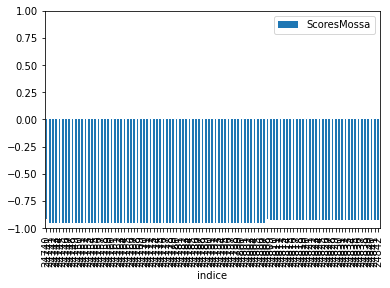

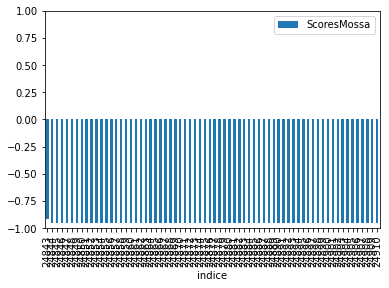

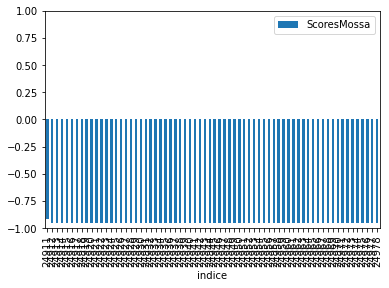

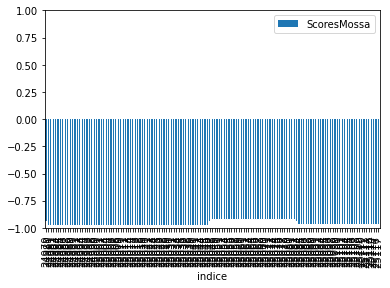

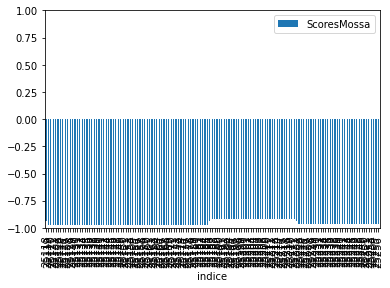

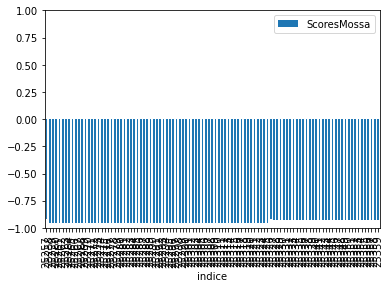

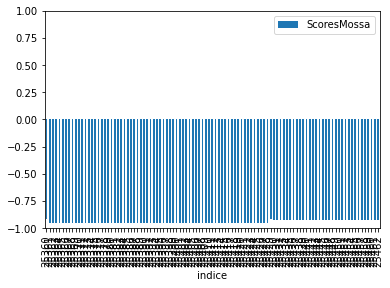

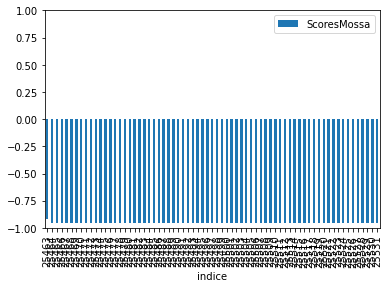

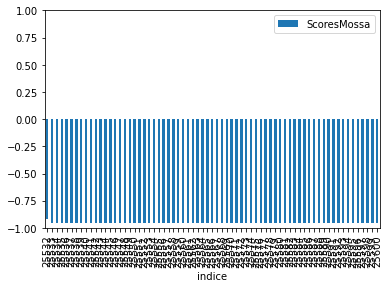

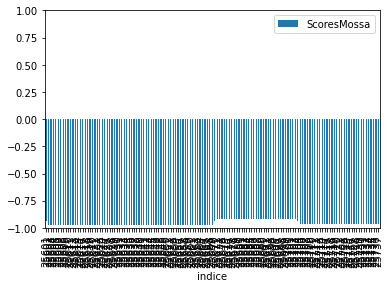

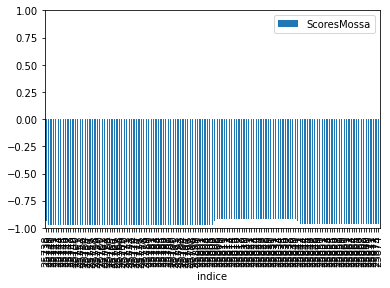

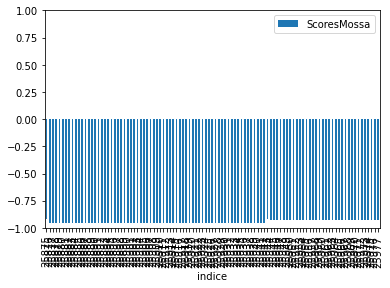

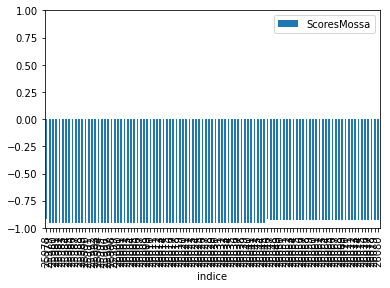

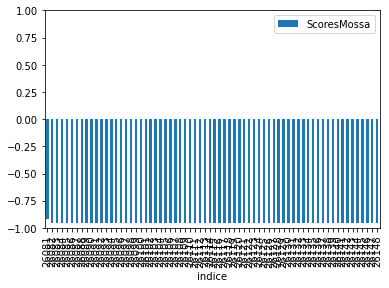

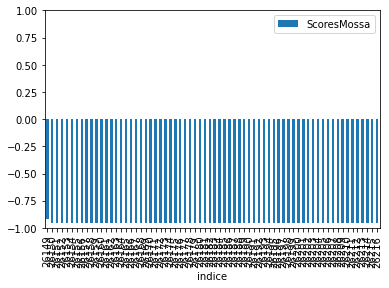

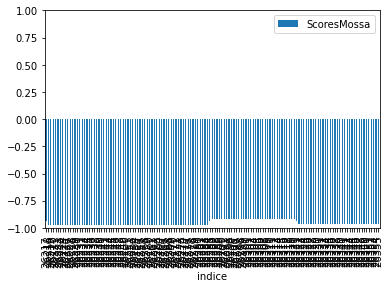

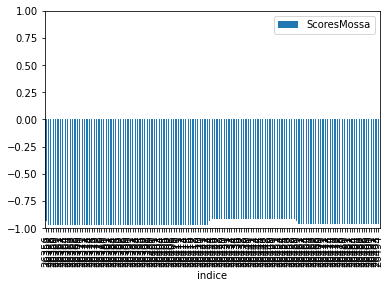

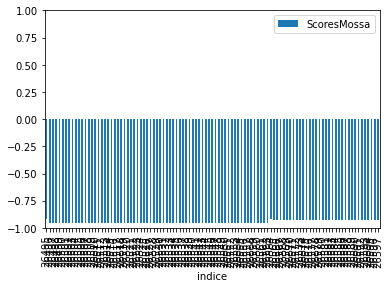

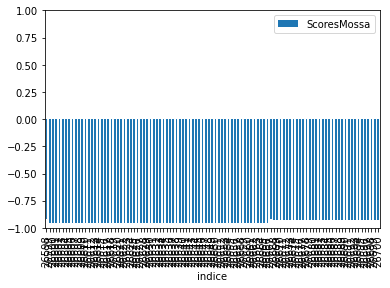

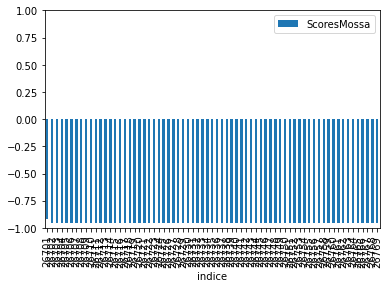

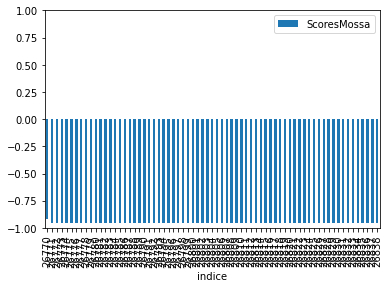

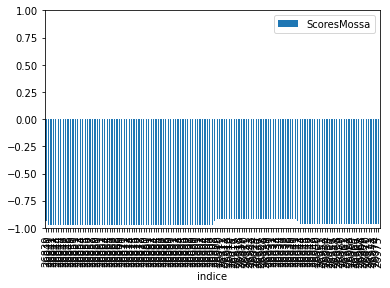

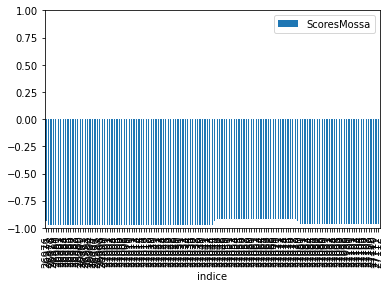

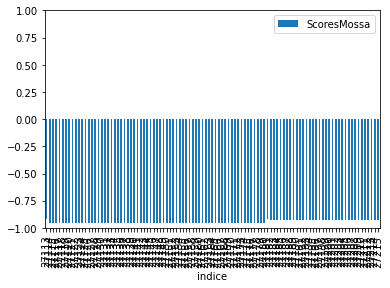

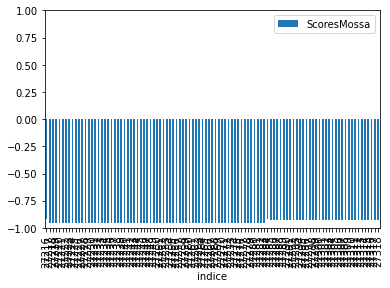

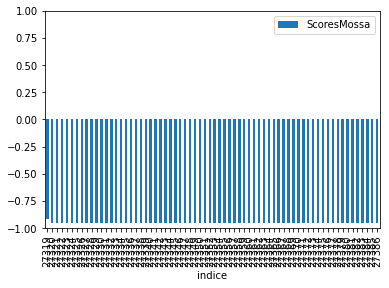

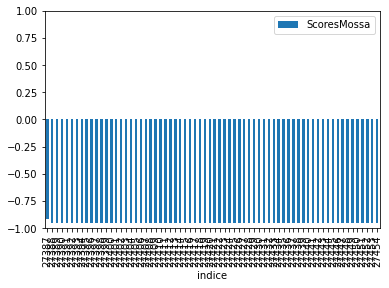

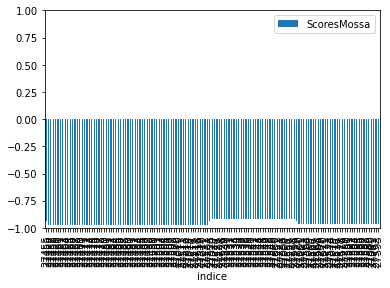

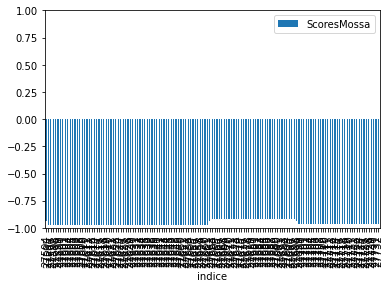

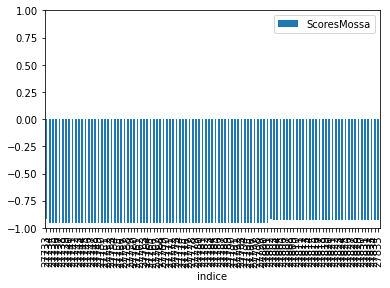

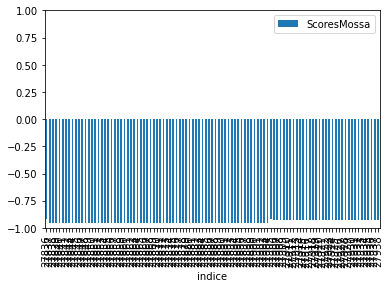

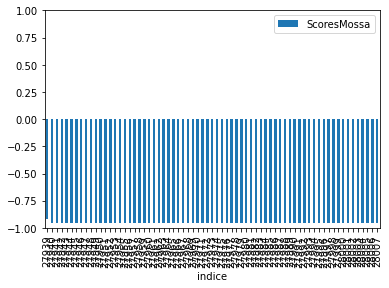

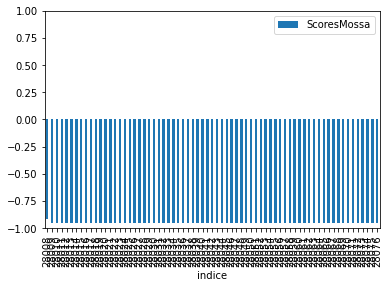

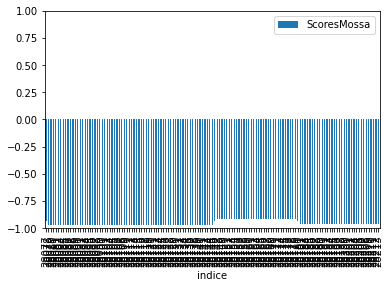

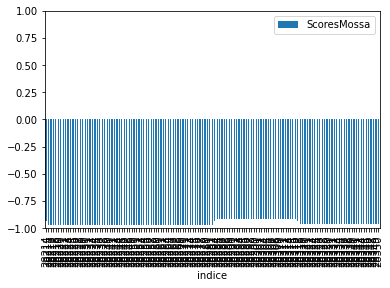

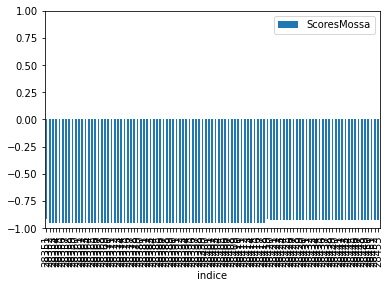

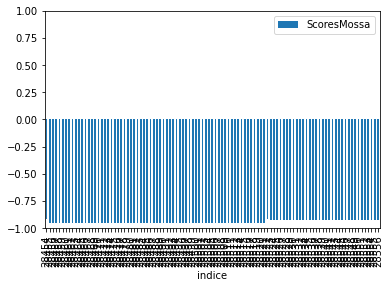

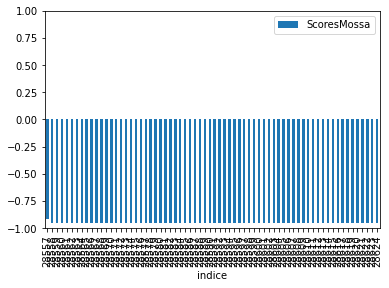

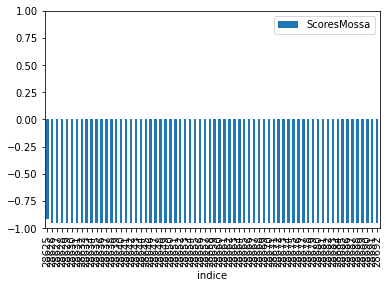

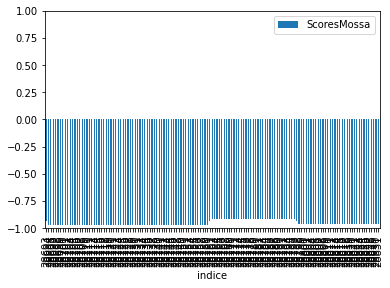

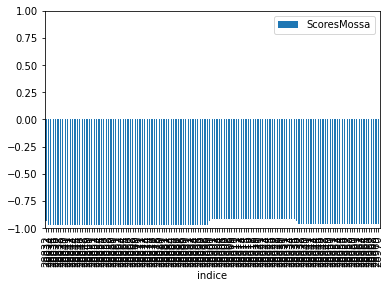

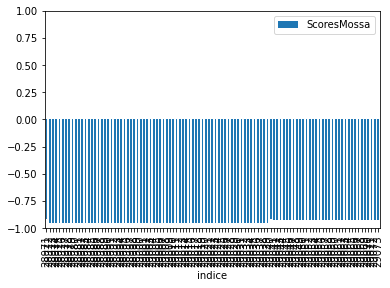

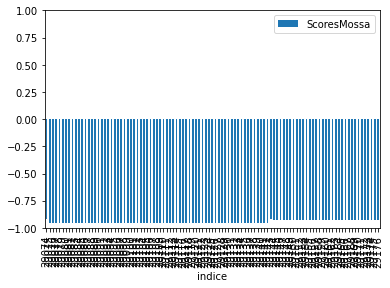

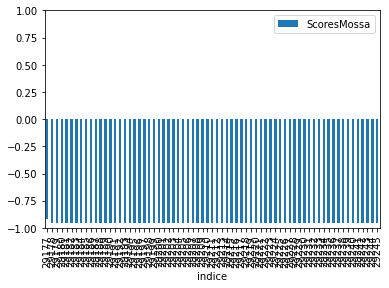

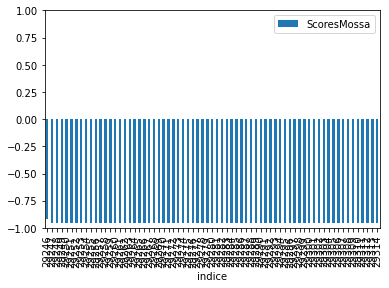

In [107]:
plot=df_long.groupby(['agente','partita','NumeroMossa']).plot.bar(x='indice',y='ScoresMossa',ylim=[-1,1])

In [112]:
df_long

indice agente  NumeroMossa  ScoresMossa  partita  ScoreScelto winner
0           0   blue            0    -0.147139        0     0.092901   blue
1           1   blue            0     0.092901        0     0.092901   blue
2           2   blue            0     0.092901        0     0.092901   blue
3           3   blue            0     0.092901        0     0.092901   blue
4           4   blue            0     0.092901        0     0.092901   blue
...       ...    ...          ...          ...      ...          ...    ...
29310   29310    red          313    -0.955419        2    -0.913466   blue
29311   29311    red          313    -0.955419        2    -0.913466   blue
29312   29312    red          313    -0.955419        2    -0.913466   blue
29313   29313    red          313    -0.955419        2    -0.913466   blue
29314   29314    red          313    -0.955419        2    -0.913466   blue

[29315 rows x 7 columns]

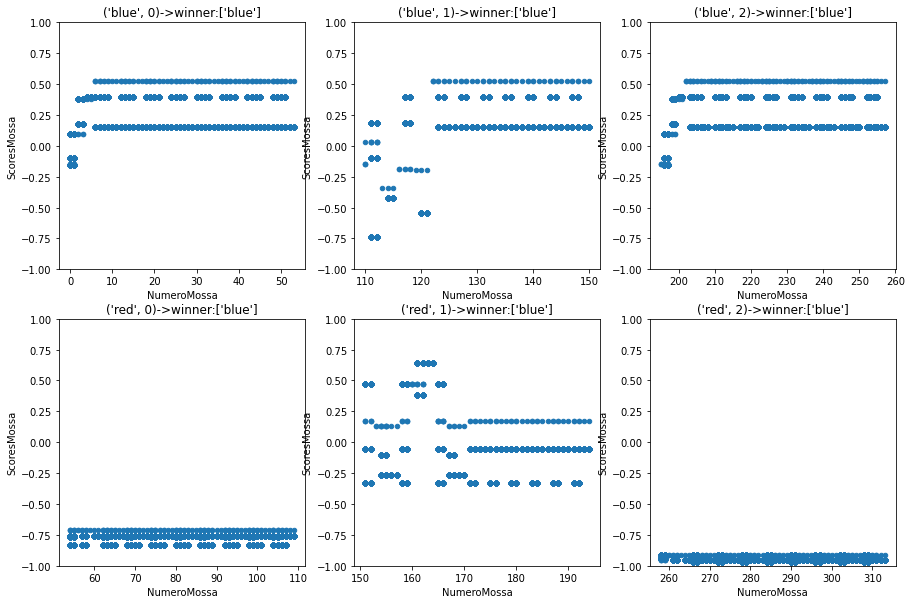

In [113]:
fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
for (joinGroup, group), ax in zip(df_long.groupby(['agente','partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}->winner:{win}'
    group.plot(x='NumeroMossa', y='ScoresMossa', kind='scatter',style='-o' ,ax=ax,title=title,ylim=[-1,1])

In [ ]:
for (joinGroup, group) in df_long.groupby(['partita','agente']):
    winner=group['winner'].unique()
    agente=group['agente'].unique()
    lastScore=group.loc[group['NumeroMossa'] ==group['NumeroMossa'].max() , 'ScoreScelto'].unique()
    bestScore=-2
    if(lastScore>bestScore):
        bestScore=lastScore
        if()

In [138]:
dd=df_long.groupby(['partita','agente'])

In [149]:
dd.get_group('0')

ValueError: must supply a tuple to get_group with multiple grouping keys

In [136]:
for (joinGroup, group) in df_long.groupby(['partita','agente']):
    print(joinGroup)
    print(group.loc[group['NumeroMossa'] ==group['NumeroMossa'].max() , 'ScoreScelto'].unique())


(0, 'blue')
[0.52238658]
(0, 'red')
[-0.71035037]
(1, 'blue')
[0.52238658]
(1, 'red')
[0.17320304]
(2, 'blue')
[0.52238658]
(2, 'red')
[-0.91346618]


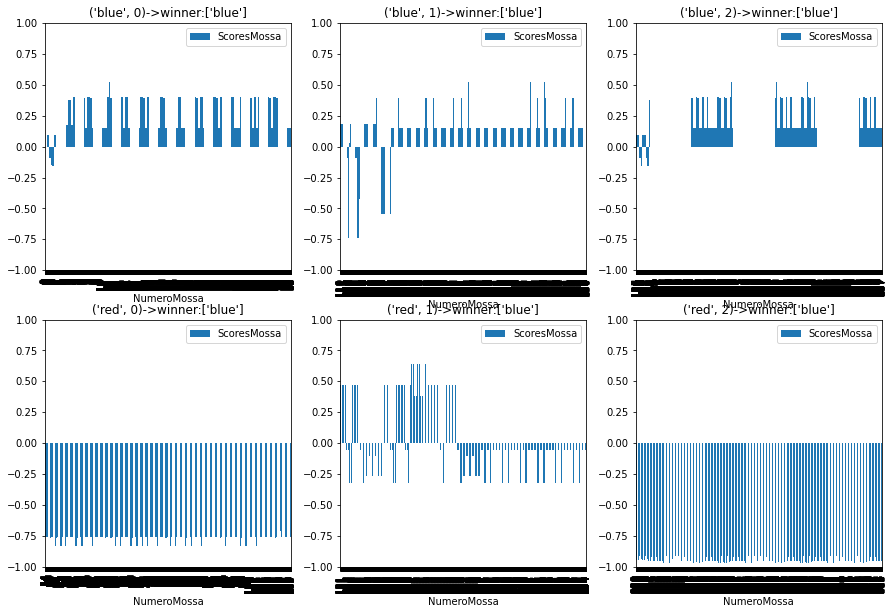

In [114]:
fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
for (joinGroup, group), ax in zip(df_long.groupby(['agente','partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}->winner:{win}'
    group.plot(x='NumeroMossa', y='ScoresMossa', kind='bar',style='-o' ,ax=ax,title=title,ylim=[-1,1])

In [ ]:
df_long